In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
from os import path

In [2]:
data_dir = path.join('..','data','5g_processed_data')
interim_dir = path.join('..','data','5g_interim')

In [3]:
ica_data = load_json_model(path.join(data_dir,'5g_raw.json.gz'))

In [4]:
DF_enrichments = pd.read_csv(path.join(data_dir,'5G_functional_enrichments.csv'),index_col=0)

# Add iModulon category

In [5]:
for i,row in ica_data.imodulon_table.iterrows():
    # if pd.notnull(row.regulator):
    #     ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    if pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [6]:
ica_data.imodulon_table.head(15)

single_gene  imodulon_size  explained_variance         category
0            NaN            111            0.010961  uncharacterized
1            NaN             23            0.006986  uncharacterized
2            NaN             44            0.020010  uncharacterized
SG_1        True              1            0.003638      single_gene
4            NaN              3            0.004384  uncharacterized
5            NaN             62            0.040222  uncharacterized
6            NaN             20            0.011649  uncharacterized
7            NaN              5            0.004450  uncharacterized
8            NaN              6            0.021518  uncharacterized
9            NaN             16            0.009330  uncharacterized
10           NaN             85            0.028817  uncharacterized
11           NaN             21            0.007132  uncharacterized
SG_2        True              1            0.006521      single_gene
13           NaN             10            0.004934  uncharacterized
14           NaN             50            0.044466  uncharacterized

# Inspect all iModulons without an automated annotation

In [7]:
unchar_imods = ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

In [8]:
unchar_imods

single_gene  imodulon_size  explained_variance         category
0          NaN            111            0.010961  uncharacterized
1          NaN             23            0.006986  uncharacterized
2          NaN             44            0.020010  uncharacterized
4          NaN              3            0.004384  uncharacterized
5          NaN             62            0.040222  uncharacterized
6          NaN             20            0.011649  uncharacterized
7          NaN              5            0.004450  uncharacterized
8          NaN              6            0.021518  uncharacterized
9          NaN             16            0.009330  uncharacterized
10         NaN             85            0.028817  uncharacterized
11         NaN             21            0.007132  uncharacterized
13         NaN             10            0.004934  uncharacterized
14         NaN             50            0.044466  uncharacterized
15         NaN             99            0.005426  uncharacterized
16         NaN             77            0.031248  uncharacterized
17         NaN             68            0.036859  uncharacterized
18         NaN             74            0.009664  uncharacterized
19         NaN            151            0.022518  uncharacterized
20         NaN             11            0.006886  uncharacterized
21         NaN             15            0.061652  uncharacterized
22         NaN             12            0.044637  uncharacterized
23         NaN            248            0.006660  uncharacterized
24         NaN             12            0.012456  uncharacterized
25         NaN             10            0.002377  uncharacterized
26         NaN              5            0.000565  uncharacterized
27         NaN              9            0.046064  uncharacterized
28         NaN             12            0.006138  uncharacterized
29         NaN            213            0.007783  uncharacterized
30         NaN             31            0.013435  uncharacterized
31         NaN             25            0.061955  uncharacterized
32         NaN             50            0.036584  uncharacterized
33         NaN            232            0.007360  uncharacterized
35         NaN             10            0.005344  uncharacterized
36         NaN             26            0.069003  uncharacterized
39         NaN            221            0.052555  uncharacterized
41         NaN            291            0.062863  uncharacterized
42         NaN             17            0.002914  uncharacterized
43         NaN             92            0.023813  uncharacterized
45         NaN             17            0.018736  uncharacterized
46         NaN              9            0.003774  uncharacterized
48         NaN              5            0.006577  uncharacterized
49         NaN             39            0.001538  uncharacterized
51         NaN            155            0.002219  uncharacterized
52         NaN             71            0.001277  uncharacterized

### iModulon 0: Unknown

In [9]:
ica_data.view_imodulon(0)

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00110     0.039180         NaN        25137      25554       1   
EQU24_RS00165     0.053646         NaN        36832      37129      -1   
EQU24_RS00390     0.047510         NaN        82907      83930       1   
EQU24_RS00450     0.040135         NaN        95639      95957       1   
EQU24_RS00455     0.041064        tatA        96158      96371       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20900     0.120391         NaN      4708570    4708813      -1   
EQU24_RS21260    -0.039489         NaN      4791094    4791280       1   
EQU24_RS21815     0.054058         NaN      4920552    4921551       1   
EQU24_RS22125     0.071297         NaN      4994218    4994407      -1   
EQU24_RS22130     0.050331         NaN      4994558    4994648      -1   

                                                         product COG  \
EQU24_RS00110                                OsmC family protein   O   
EQU24_RS00165                               hypothetical protein   X   
EQU24_RS00390               glycosyltransferase family 4 protein   M   
EQU24_RS00450                   phosphoribosyl-ATP diphosphatase   E   
EQU24_RS00455  twin-arginine translocase TatA/TatE family sub...   U   
...                                                          ...  ..   
EQU24_RS20900                               hypothetical protein   X   
EQU24_RS21260                               hypothetical protein   X   
EQU24_RS21815                               hypothetical protein   X   
EQU24_RS22125                  DUF4102 domain-containing protein   L   
EQU24_RS22130                                                NaN   X   

                                                        cog_name  \
EQU24_RS00110  Post-translational modification, protein turno...   
EQU24_RS00165                                  No COG annotation   
EQU24_RS00390             Cell wall/membrane/envelope biogenesis   
EQU24_RS00450                Amino acid transport and metabolism   
EQU24_RS00455  Intracellular trafficking, secretion, and vesi...   
...                                                          ...   
EQU24_RS20900                                  No COG annotation   
EQU24_RS21260                                  No COG annotation   
EQU24_RS21815                                  No COG annotation   
EQU24_RS22125              Replication, recombination and repair   
EQU24_RS22130                                  No COG annotation   

                     uniprot  tu_id  \
EQU24_RS00110     A0A4V1IJB6   2817   
EQU24_RS00165     A0A4V1IJB7   2810   
EQU24_RS00390  UPI000344E98D   2777   
EQU24_RS00450     A0A4P9UN41   2770   
EQU24_RS00455     A0A4P9UIV2   2769   
...                      ...    ...   
EQU24_RS20900     A0A4P9USB7    167   
EQU24_RS21260            NaN    120   
EQU24_RS21815     A0A4P9USR1     43   
EQU24_RS22125     A0A4P9UVG7      3   
EQU24_RS22130            NaN      2   

                                                         tu_name  \
EQU24_RS00110                              speD // EQU24_RS00110   
EQU24_RS00165                                      EQU24_RS00165   
EQU24_RS00390                                      EQU24_RS00390   
EQU24_RS00450  EQU24_RS00450 // hisI // hisF // hisA // hisH ...   
EQU24_RS00455                               tatC // tatB // tatA   
...                                                          ...   
EQU24_RS20900                     EQU24_RS20900 // EQU24_RS20895   
EQU24_RS21260                                      EQU24_RS21260   
EQU24_RS21815  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS22125                                      EQU24_RS22125   
EQU24_RS22130                                      EQU24_RS22130   

                 ncbi_protein gene_name_extra  \
EQU24_RS00110  WP_017841455.1          ||None   
EQU24_RS00165  WP_017841444.1          ||None   
EQU24_RS003

<AxesSubplot:ylabel='0 iModulon\nActivity'>

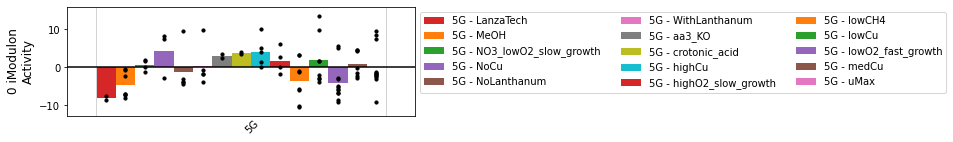

In [10]:
plot_activities(ica_data,0,highlight=['5G'])

# Erin's replotting attempt

In [11]:
def plot_activities_erin(
    ica_data, imodulon, assigned_colors=None, ax=None, legend_kwargs=None
):
    """
    Creates a barplot showing an iModulon's activity across the compendium
    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon: int or str
        `iModulon` name
    projects: list or str, optional
        Name(s) of `projects` to show (default: show all)
    highlight: str or list, optional
        Name(s) of projects to `highlight` (default: None)
    ax: ~matplotlib.axes.Axes, optional
        Axes object to plot on, otherwise use current Axes
    legend_kwargs: dict, optional
        Additional keyword arguments passed to :func:`matplotlib.pyplot.legend`
    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the barplot
    """

    # Check that iModulon exists
    if imodulon in ica_data.A.index:
        values = ica_data.A.loc[imodulon]
    else:
        raise ValueError(f"iModulon does not exist: {imodulon}")

    label = "{} iModulon\nActivity".format(imodulon)

    return barplot_erin(
        values=values,
        sample_table=ica_data.sample_table,
        ylabel=label,
        # projects=projects,
        # highlight=highlight,
        assigned_colors=assigned_colors,
        ax=ax,
        legend_kwargs=legend_kwargs,
    )


In [12]:
def barplot_erin(
    values,
    sample_table,
    ylabel="",
    #projects=None,
    #highlight=None,
    assigned_colors=None,
    ax=None,
    legend_kwargs=None,
):
    """
    Creates an overlaid scatter and barplot for a set of values (either gene
    expression levels or iModulon activities)
    Parameters
    ----------
    values: ~pandas.Series
        List of `values` to plot
    sample_table: ~pandas.DataFrame
        Sample table from :class:`~pymodulon.core.IcaData` object
    ylabel: str, optional
        Y-axis label
    projects: list or str, optional
        Name(s) of `projects` to show (default: show all)
    highlight: list or str, optional
        Project(s) to `highlight` (default: None)
    ax: ~matplotlib.axes.Axes, optional
        Axes object to plot on, otherwise use current Axes
    legend_kwargs: dict, optional
        Additional keyword arguments passed to :func:`matplotlib.pyplot.legend`
    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the barplot
    """

    # # Remove extra projects
    # if isinstance(projects, str):
    #     projects = [projects]

    # if projects is not None and len(projects) == 1:
    #     highlight = projects

    # if projects is not None and "project" in sample_table:
    #     sample_table = sample_table[sample_table.project.isin(projects)]
    #     values = values[sample_table.index]

    if ax is None:
        figsize = (len(values) / 15 + 0.5, 2)
        fig, ax = plt.subplots(figsize=figsize)

    # Get ymin and max
    ymin = values.min()
    ymax = values.max()
    yrange = ymax - ymin
    ymax = max(1, max(ymax * 1.1, ymax + yrange * 0.1))
    ymin = min(-1, min(ymin * 1.1, ymin - yrange * 0.1))
    yrange = ymax - ymin

    # Add project-specific information
    if "project" in sample_table.columns and "condition" in sample_table.columns:

        # Sort data by project/condition to ensure replicates are together
        metadata = sample_table.loc[:, ["project", "condition"]]
        metadata = metadata.sort_values(["project", "condition"])
        #metadata["name"] = metadata.project + " - " + metadata.condition.astype(str)
        metadata["name"] = metadata.condition.astype(str)

        # set xaxis order
        xorder = ['uMax','MeOH','NoCu','lowCu','medCu','highCu','lowCH4','WithLanthanum','NoLanthanum','highO2_slow_growth','NO3_lowO2_slow_growth','lowO2_fast_growth',]
        metadata['xorder'] = pd.Categorical(metadata['condition'],categories=xorder)
        metadata = metadata.sort_values('xorder')

        # Coerce highlight to iterable
        # if highlight is None:
        #     highlight = []
        # elif isinstance(highlight, str):
        #     highlight = [highlight]

        # Get X and Y values for scatter points
        metadata["y"] = values
        metadata["x"] = np.cumsum(~metadata[["name"]].duplicated())
        # ^^ looks for name duplications, increments when finds non-duplicated name

        # Get heights for barplot
        bar_vals = metadata.groupby("x").mean()

        # Add colors and names
        bar_vals["name"] = metadata.drop_duplicates("name").name.values
        bar_vals["project"] = metadata.drop_duplicates("name").project.values
        #bar_vals['xorder'] = pd.Categorical(bar_vals['name'],categories=xorder)
        #bar_vals = bar_vals.sort_values('xorder').reset_index()
        #return bar_vals


        # Plot bars for highlighted samples
        #color_vals = bar_vals[bar_vals.project.isin(highlight)]
        color_cycle = [
            "tab:red",
            "tab:orange",
            "tab:green",
            "tab:purple",
            "tab:brown",
            "tab:pink",
            "tab:gray",
            "tab:olive",
            "tab:cyan",
        ]


        i = 0
        #for name, group in bar_vals.groupby("name"):
        for j,row in bar_vals.iterrows():
            cond = row['name']
            if cond in assigned_colors:
                c = assigned_colors[cond]
            else:
                c = color_cycle[i]
                i = (i + 1) % len(color_cycle)
            ax.bar(
                #row.index,
                j,
                row.y,
                color=c,
                width=1,
                linewidth=0,
                align="edge",
                zorder=1,
                label=cond,
            )
            

        # # Plot bars for non-highlighted samples
        # other_vals = bar_vals[~bar_vals.project.isin(highlight)]
        # ax.bar(
        #     other_vals.index,
        #     other_vals.y,
        #     color="tab:blue",
        #     width=1,
        #     linewidth=0,
        #     align="edge",
        #     zorder=1,
        #     label=None,
        # )
        ax.scatter(metadata.x + 0.5, metadata.y, color="k", zorder=2, s=10)

        # Get project names and sizes
        projects = metadata.project.drop_duplicates()
        md_cond = metadata.drop_duplicates(["name"])
        project_sizes = [len(md_cond[md_cond.project == proj]) for proj in projects]
        nbars = len(md_cond)

        # Draw lines to discriminate between projects
        proj_lines = np.cumsum([1] + project_sizes)
        ax.vlines(proj_lines, ymin, ymax, colors="lightgray", linewidth=1)

        # # Add project names
        # texts = []
        # start = 2
        # for proj, size in zip(projects, project_sizes):
        #     x = start + size / 2
        #     texts.append(
        #         ax.text(
        #             x, ymin - yrange * 0.02, proj, ha="right", va="top", rotation=45
        #         )
        #     )
        #     start += size

        # Add cond names
        texts = []
        start = 1
        size=1
        for pos,cond in enumerate(bar_vals['name'].values):
            x = start + size / 2
            #x=x+2
            texts.append(
                ax.text(
                    x, ymin - yrange * 0.02, cond, ha="center", va="top", rotation=90
                )
            )
            start += size

        # Add legend
        #if not color_vals.empty:
        if not bar_vals.empty:
            kwargs = {
                "bbox_to_anchor": (1, 1),
                "ncol": len(bar_vals.name.unique()) // 8+1#6 + 1,
            }

            if legend_kwargs is not None:
                kwargs.update(legend_kwargs)

            ax.legend(**kwargs)

    else:
        logging.warning("Missing `project` and `condition` columns in `sample_table.`")
        ax.bar(range(len(values)), values, width=1, align="edge")
        nbars = len(values)

    # Set axis limits
    xmin = -0.5
    xmax = nbars + 2.5
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Axis labels
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks([])

    # X-axis
    ax.hlines(0, xmin, xmax, color="k")

    return ax

In [13]:
# specific colors to use for plots
color_spec = {
    'uMax':'#d9d9d9', # gray
    'NoCu':'#bdd7e7', # blues
    'lowCu':'#6baed6', # blues
    'medCu':'#3182bd', # blues
    'highCu':'#08519c', # blues
    'lowCH4':'#b3de69', # green
    'WithLanthanum':'#e6550d', #orange
    'NoLanthanum':'#fdbe85', #orange
    'MeOH':'#fb8072', #red
    'highO2_slow_growth':'#6a3d9a',
    'NO3_lowO2_slow_growth':'#bc80bd', # purple
    'lowO2_fast_growth':'#fccde5', # pink
    'LanzaTech':'#33a02c', #green
    'aa3_KO':'#e6f598', # light green
    'crotonic_acid':'#fee08b', #yellow
}

In [14]:
def imod_scatter(ica_data, mod_id):
    mod_row = ica_data.imodulon_table[ica_data.imodulon_table.index==mod_id]
    size = mod_row['imodulon_size'].values[0]
    fig = plt.figure(figsize=(3,3))
    sns.scatterplot(data=ica_data.imodulon_table, x='imodulon_size',y='explained_variance')
    sns.scatterplot(data=mod_row, x='imodulon_size',y='explained_variance',color='r',s=200)
    plt.title(f'iModulon {mod_id} ({size} genes)')
    plt.show()

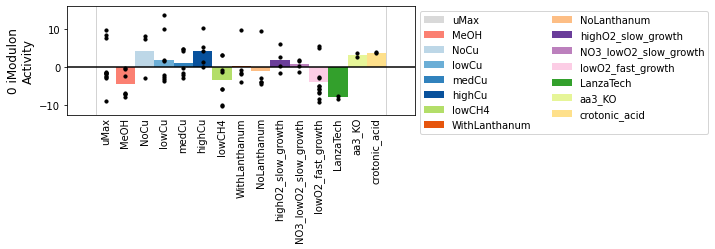

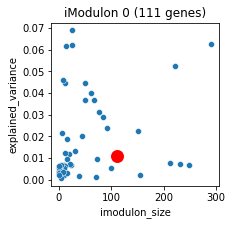

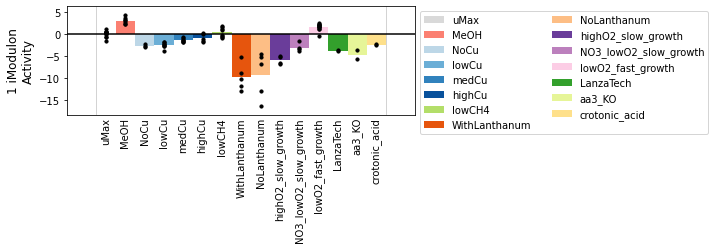

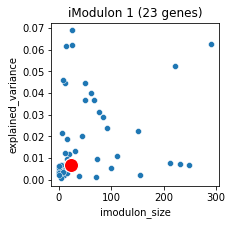

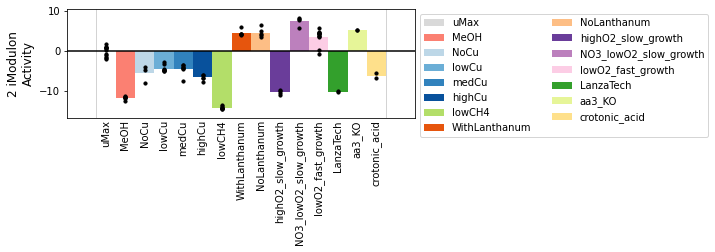

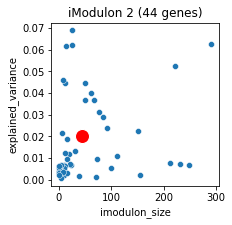

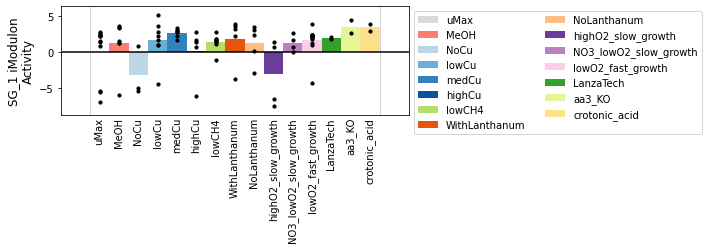

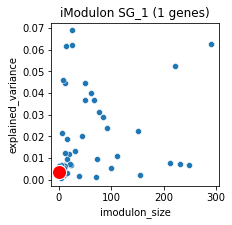

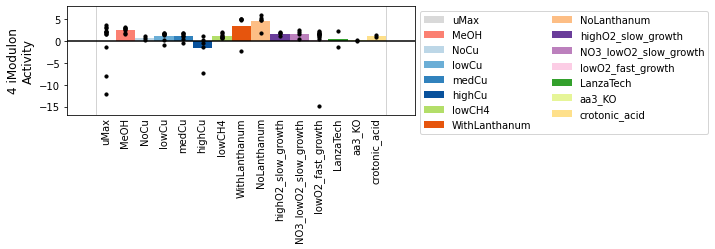

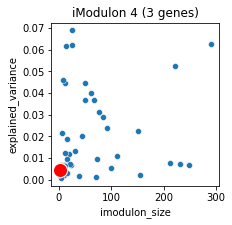

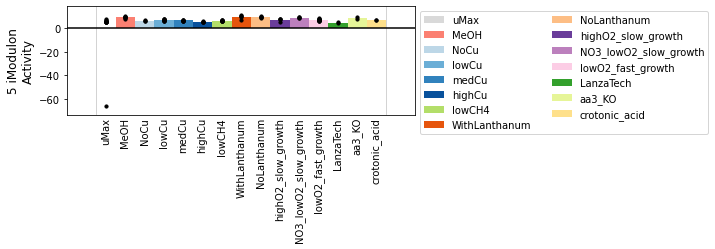

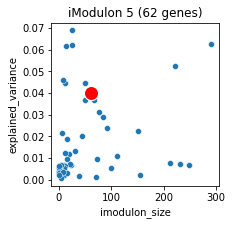

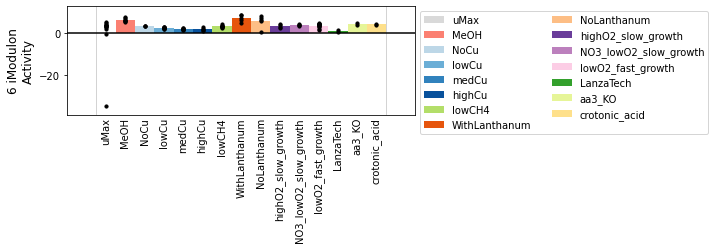

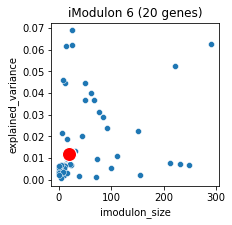

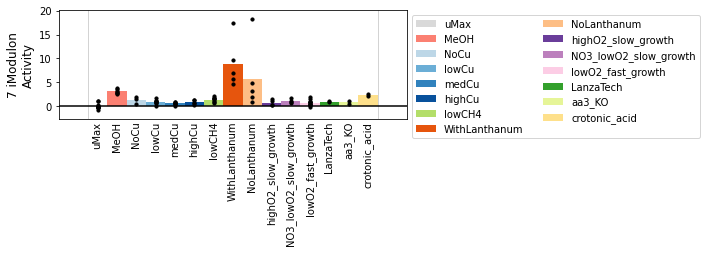

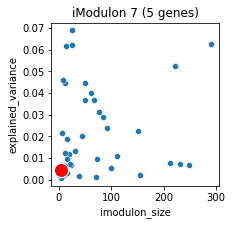

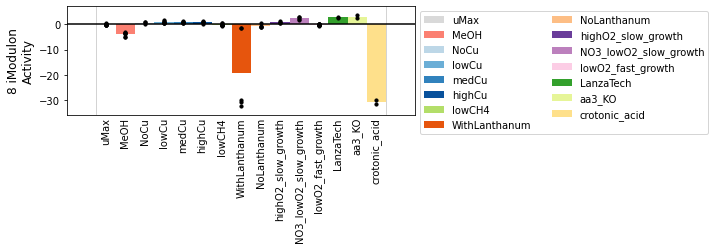

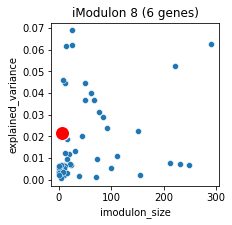

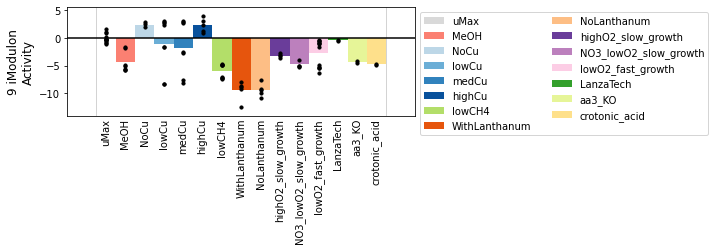

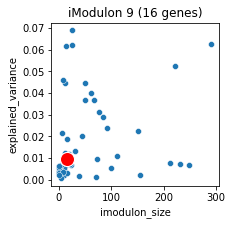

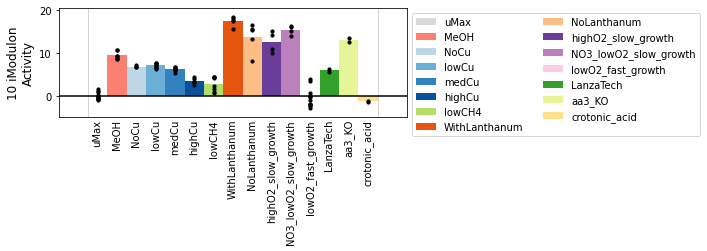

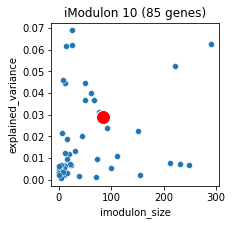

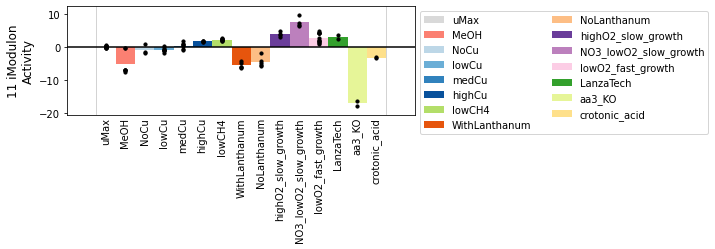

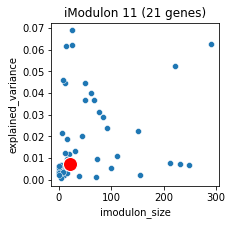

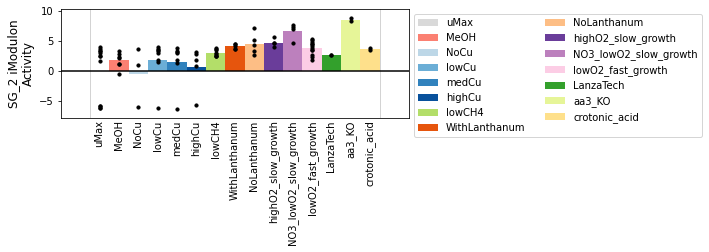

KeyboardInterrupt: 

In [15]:
for mod in ica_data.imodulon_table.index:
    plot_activities_erin(ica_data,mod,assigned_colors=color_spec)
    imod_scatter(ica_data,mod)
    #ica_data.view_imodulon(mod)

# Look one at a time

In [15]:
def imod_info(mod):
    print(f"iModulon {mod}")
    plot_activities_erin(ica_data,mod,assigned_colors=color_spec)
    imod_scatter(ica_data,mod)
    display(DF_enrichments[DF_enrichments.imodulon==mod].sort_values('f1score',ascending=False))
    display(ica_data.view_imodulon(mod))

## iMod 0

iModulon 0


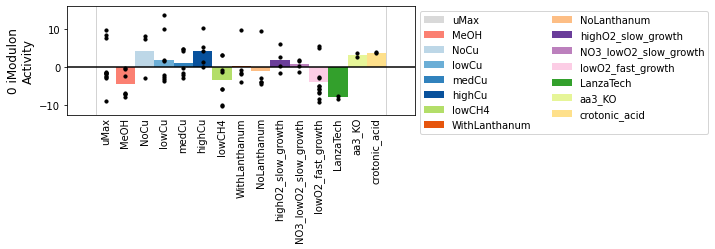

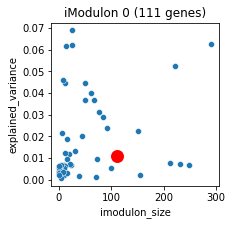

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00110     0.039180         NaN        25137      25554       1   
EQU24_RS00165     0.053646         NaN        36832      37129      -1   
EQU24_RS00390     0.047510         NaN        82907      83930       1   
EQU24_RS00450     0.040135         NaN        95639      95957       1   
EQU24_RS00455     0.041064        tatA        96158      96371       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20900     0.120391         NaN      4708570    4708813      -1   
EQU24_RS21260    -0.039489         NaN      4791094    4791280       1   
EQU24_RS21815     0.054058         NaN      4920552    4921551       1   
EQU24_RS22125     0.071297         NaN      4994218    4994407      -1   
EQU24_RS22130     0.050331         NaN      4994558    4994648      -1   

                                                         product COG  \
EQU24_RS00110                                OsmC family protein   O   
EQU24_RS00165                               hypothetical protein   X   
EQU24_RS00390               glycosyltransferase family 4 protein   M   
EQU24_RS00450                   phosphoribosyl-ATP diphosphatase   E   
EQU24_RS00455  twin-arginine translocase TatA/TatE family sub...   U   
...                                                          ...  ..   
EQU24_RS20900                               hypothetical protein   X   
EQU24_RS21260                               hypothetical protein   X   
EQU24_RS21815                               hypothetical protein   X   
EQU24_RS22125                  DUF4102 domain-containing protein   L   
EQU24_RS22130                                                NaN   X   

                                                        cog_name  \
EQU24_RS00110  Post-translational modification, protein turno...   
EQU24_RS00165                                  No COG annotation   
EQU24_RS00390             Cell wall/membrane/envelope biogenesis   
EQU24_RS00450                Amino acid transport and metabolism   
EQU24_RS00455  Intracellular trafficking, secretion, and vesi...   
...                                                          ...   
EQU24_RS20900                                  No COG annotation   
EQU24_RS21260                                  No COG annotation   
EQU24_RS21815                                  No COG annotation   
EQU24_RS22125              Replication, recombination and repair   
EQU24_RS22130                                  No COG annotation   

                     uniprot  tu_id  \
EQU24_RS00110     A0A4V1IJB6   2817   
EQU24_RS00165     A0A4V1IJB7   2810   
EQU24_RS00390  UPI000344E98D   2777   
EQU24_RS00450     A0A4P9UN41   2770   
EQU24_RS00455     A0A4P9UIV2   2769   
...                      ...    ...   
EQU24_RS20900     A0A4P9USB7    167   
EQU24_RS21260            NaN    120   
EQU24_RS21815     A0A4P9USR1     43   
EQU24_RS22125     A0A4P9UVG7      3   
EQU24_RS22130            NaN      2   

                                                         tu_name  \
EQU24_RS00110                              speD // EQU24_RS00110   
EQU24_RS00165                                      EQU24_RS00165   
EQU24_RS00390                                      EQU24_RS00390   
EQU24_RS00450  EQU24_RS00450 // hisI // hisF // hisA // hisH ...   
EQU24_RS00455                               tatC // tatB // tatA   
...                                                          ...   
EQU24_RS20900                     EQU24_RS20900 // EQU24_RS20895   
EQU24_RS21260                                      EQU24_RS21260   
EQU24_RS21815  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS22125                                      EQU24_RS22125   
EQU24_RS22130                                      EQU24_RS22130   

                 ncbi_protein gene_name_extra  \
EQU24_RS00110  WP_017841455.1          ||None   
EQU24_RS00165  WP_017841444.1          ||None   
EQU24_RS003

In [16]:
imod = 0
imod_info(imod)

In [19]:
# Update the ica_data object
#ica_data.rename_imodulons({0:'0-uncharacterized_EW'})
ica_data.imodulon_table.loc[0,'category'] = 'uncharacterized'

# seems like a mix of a lot of things... expression pattern not clear...

In [32]:
ica_data.imodulon_table.loc[0,'function'] = 'unclear_EW'
ica_data.imodulon_table.head()

single_gene  imodulon_size  explained_variance         category  \
0            NaN            111            0.010961  uncharacterized   
1            NaN             23            0.006986  uncharacterized   
2            NaN             44            0.020010       functional   
SG_1        True              1            0.003638      single_gene   
4            NaN              3            0.004384  uncharacterized   

                             function  
0                          unclear_EW  
1                          unclear_EW  
2     metal-binding-and-transport?_EW  
SG_1                          cas2_EW  
4                    small_unclear_EW

## iMod 1

iModulon 1


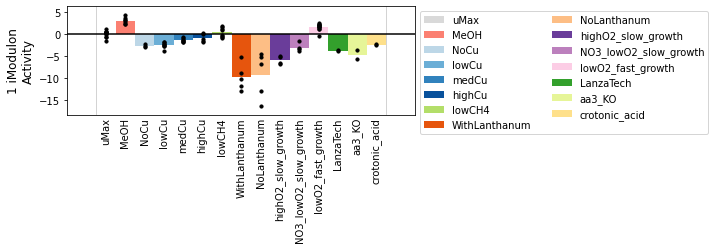

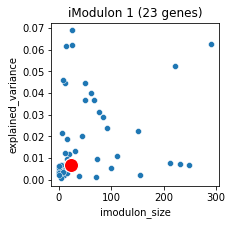

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00625     0.107857         NaN       129668     131204       1   
EQU24_RS00645    -0.113464         NaN       134999     135115       1   
EQU24_RS03550     0.077104        ltrA       760444     761623      -1   
EQU24_RS05645     0.100904         NaN      1220955    1221031       1   
EQU24_RS05725     0.064302         NaN      1239471    1239672      -1   
EQU24_RS08845     0.073584         NaN      1961613    1962006      -1   
EQU24_RS09050    -0.063040         NaN      2000662    2002213       1   
EQU24_RS09300    -0.069593        ltrA      2056366    2057545      -1   
EQU24_RS09560    -0.100120         NaN      2125956    2126157       1   
EQU24_RS09835     0.256997         NaN      2185369    2185443       1   
EQU24_RS10945     0.085939         NaN      2443373    2443643      -1   
EQU24_RS12090    -0.206654         NaN      2705890    2706091      -1   
EQU24_RS12825     0.073358         NaN      2877647    2878040       1   
EQU24_RS13885     0.075046         NaN      3097802    3098000       1   
EQU24_RS15095     0.082831         NaN      3372785    3372861      -1   
EQU24_RS15570     0.068340         NaN      3496146    3496338      -1   
EQU24_RS17080    -0.066168        nifT      3841334    3841547       1   
EQU24_RS18555     0.113387         NaN      4143018    4143095      -1   
EQU24_RS19665     0.092543         NaN      4420900    4421098       1   
EQU24_RS19925     0.069987         NaN      4476091    4476274      -1   
EQU24_RS20040     0.081414         NaN      4499078    4499480       1   
EQU24_RS20615     0.155107         NaN      4647272    4648358      -1   
EQU24_RS20700     0.061723         NaN      4666898    4667144       1   

                                                         product COG  \
EQU24_RS00625                                                NaN   X   
EQU24_RS00645                                                NaN   X   
EQU24_RS03550     group II intron reverse transcriptase/maturase   L   
EQU24_RS05645                                                NaN   X   
EQU24_RS05725                               hypothetical protein   X   
EQU24_RS08845  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS09050                            IS66 family transposase   L   
EQU24_RS09300     group II intron reverse transcriptase/maturase   L   
EQU24_RS09560                               hypothetical protein   X   
EQU24_RS09835                                                NaN   X   
EQU24_RS10945                                   membrane protein   T   
EQU24_RS12090                               hypothetical protein   X   
EQU24_RS12825  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS13885                           (2Fe-2S)-binding protein   P   
EQU24_RS15095                                                NaN   X   
EQU24_RS15570                               hypothetical protein   X   
EQU24_RS17080            putative nitrogen fixation protein NifT   Q   
EQU24_RS18555                                                NaN   X   
EQU24_RS19665                               hypothetical protein   X   
EQU24_RS19925                               hypothetical protein   X   
EQU24_RS20040                           TIGR03790 family protein   S   
EQU24_RS20615                  DUF4338 domain-containing protein   L   
EQU24_RS20700                               hypothetical protein   X   

                                                        cog_name  \
EQU24_RS00625                                  No COG annotation   
EQU24_RS00645                                  No COG annotation   
EQU24_RS03550              Replication, recombination and repair   
EQU24_RS05645                                  No COG annotation   
EQU24_RS05725                                  No COG annotation   
EQU24_RS08845                                   Function unknown   
EQU24_RS09050              Replic

In [22]:
imod_info(1)

In [31]:
# Update the ICA data object
#ica_data.rename_imodulons({1:'1-uncharacterized_EW'})
ica_data.imodulon_table.loc[1,'function'] = 'unclear_EW'
ica_data.imodulon_table.head()


single_gene  imodulon_size  explained_variance         category  \
0            NaN            111            0.010961  uncharacterized   
1            NaN             23            0.006986  uncharacterized   
2            NaN             44            0.020010       functional   
SG_1        True              1            0.003638      single_gene   
4            NaN              3            0.004384  uncharacterized   

                             function  
0                  uncharacterized_EW  
1                          unclear_EW  
2     metal-binding-and-transport?_EW  
SG_1                          cas2_EW  
4                    small_unclear_EW

## iMod 2

iModulon 2


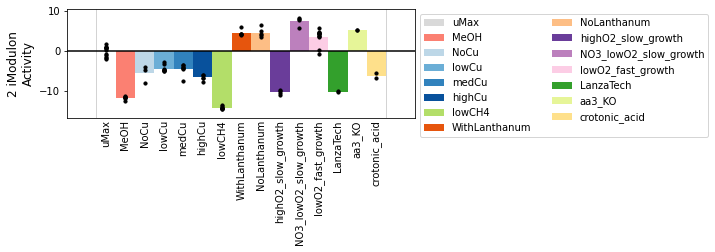

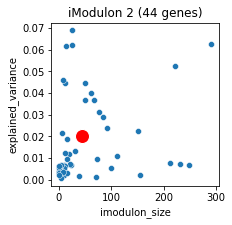

imodulon                          go_name   pvalue    qvalue  precision  \
0         2  metallo-sulfur cluster assembly  0.00001  0.042997   0.068182   

   recall   f1score   TP  target_set_size  imodulon_size source annotation  \
0     0.6  0.122449  3.0              5.0           44.0     GO        NaN   

  pathway_name module_name  
0          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00305     0.111427         NaN        67787      68192       1   
EQU24_RS00310     0.081599         NaN        68188      70348       1   
EQU24_RS01305    -0.074729         NaN       265994     267545       1   
EQU24_RS03035     0.105966        yidD       652568     652808       1   
EQU24_RS03040     0.197513         NaN       653037     653427      -1   
EQU24_RS04025    -0.059313        sodB       845349     845931       1   
EQU24_RS06295     0.068112         NaN      1377360    1377993       1   
EQU24_RS06305     0.063336         NaN      1379493    1380189       1   
EQU24_RS06665     0.072975         NaN      1465422    1466163       1   
EQU24_RS06670     0.086245         NaN      1466143    1467403       1   
EQU24_RS06675     0.096439         NaN      1467389    1467926       1   
EQU24_RS06680     0.090327         NaN      1467927    1468572       1   
EQU24_RS06685     0.082000         NaN      1468953    1469316       1   
EQU24_RS06690     0.074663         NaN      1469344    1469836       1   
EQU24_RS06695     0.066501         NaN      1469832    1470579       1   
EQU24_RS08505     0.062859         NaN      1875265    1875631       1   
EQU24_RS08705    -0.135491         NaN      1928777    1931024       1   
EQU24_RS08710    -0.068743         NaN      1931194    1931374       1   
EQU24_RS09450    -0.141203        grxD      2097874    2098198       1   
EQU24_RS09455    -0.064586         NaN      2098271    2098934      -1   
EQU24_RS10145    -0.106247         NaN      2261066    2261450      -1   
EQU24_RS10230    -0.101903         NaN      2278855    2279305       1   
EQU24_RS10235    -0.097192        sufB      2279319    2280768       1   
EQU24_RS10240    -0.090975        sufC      2280832    2281585       1   
EQU24_RS10245    -0.085559        sufD      2281586    2282909       1   
EQU24_RS10255    -0.059289         NaN      2283982    2285206       1   
EQU24_RS11875     0.063341         NaN      2654284    2655238      -1   
EQU24_RS13070    -0.060304         NaN      2923147    2923474       1   
EQU24_RS13075    -0.074089         NaN      2923532    2924117       1   
EQU24_RS13080    -0.071806         NaN      2924160    2925051       1   
EQU24_RS13145    -0.069552         NaN      2934571    2935321       1   
EQU24_RS13150    -0.058044        sufT      2935313    2935862       1   
EQU24_RS14140     0.344776         NaN      3159266    3159662      -1   
EQU24_RS14240    -0.091964         NaN      3179331    3179655      -1   
EQU24_RS14245    -0.071694         NaN      3179908    3181015      -1   
EQU24_RS14250    -0.084495         NaN      3181027    3181507      -1   
EQU24_RS17065     0.078190        nifH      3837050    3837932       1   
EQU24_RS17270     0.092191        nifL      3872605    3874195       1   
EQU24_RS20750    -0.082920         NaN      4672557    4674354       1   
EQU24_RS20755    -0.069933        cysI      4674367    4676074       1   
EQU24_RS20950    -0.067599         NaN      4717305    4718589      -1   
EQU24_RS21685    -0.078901         NaN      4893404    4893677      -1   
EQU24_RS21945    -0.067158         NaN      4950844    4951759      -1   
EQU24_RS21950    -0.058490         NaN      4951896    4953342       1   

                                                         product COG  \
EQU24_RS00305                                 response regulator   T   
EQU24_RS00310         GGDEF domain-containing response regulator   T   
EQU24_RS01305                            IS66 family transposase   L   
EQU24_RS03035  membrane protein insertion efficiency factor YidD   S   
EQU24_RS03040                               hypothetical protein   X   
EQU24_RS04025                          superoxide dismutase [Fe]   C   
EQU24_RS06295                      HTH domain-containing protein   K   
EQU24_RS06305                               hypothetical protein   S   
EQU24_RS06665                       

In [24]:
imod_info(2)

In [34]:
#ica_data.rename_imodulons({2:'2-metal-binding-and-transport?_EW'})
ica_data.imodulon_table.loc[2,'category'] = 'functional'
ica_data.imodulon_table.loc[2,'function'] = 'iron-sulfur-binding-and-transport?_EW'

# enriched go term: metallo-sulfur cluster assembly

In [26]:
ica_data.imodulon_table.head()

single_gene  imodulon_size  explained_variance         category  \
0            NaN            111            0.010961  uncharacterized   
1            NaN             23            0.006986  uncharacterized   
2            NaN             44            0.020010       functional   
SG_1        True              1            0.003638      single_gene   
4            NaN              3            0.004384  uncharacterized   

                             function  
0                  uncharacterized_EW  
1                  uncharacterized_EW  
2     metal-binding-and-transport?_EW  
SG_1                              NaN  
4                                 NaN

### iModulon 3


iModulon SG_1


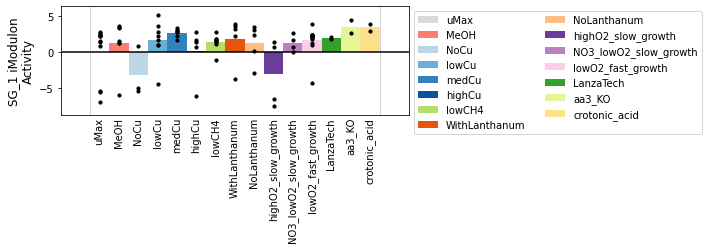

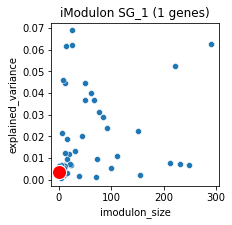

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS12140     0.712914        cas2      2713901    2714186      -1   

                                           product COG  \
EQU24_RS12140  CRISPR-associated endonuclease Cas2   L   

                                            cog_name     uniprot  tu_id  \
EQU24_RS12140  Replication, recombination and repair  A0A4P9UNK1   1307   

                                             tu_name    ncbi_protein  \
EQU24_RS12140  cas2 // cas1 // EQU24_RS12130 // cas2  WP_017839245.1   

              gene_name_extra  \
EQU24_RS12140      cas2||cas2   

                                                  specific_gos_n  \
EQU24_RS12140  RNA phosphodiester bond hydrolysis, endonucleo...   

                                                    specific_gos  
EQU24_RS12140  ['RNA phosphodiester bond hydrolysis, endonucl...

In [27]:
#imod_info(3)
imod_info('SG_1')

In [28]:
ica_data.imodulon_table.loc['SG_1','function'] = 'cas2_EW'
ica_data.imodulon_table.head()


single_gene  imodulon_size  explained_variance         category  \
0            NaN            111            0.010961  uncharacterized   
1            NaN             23            0.006986  uncharacterized   
2            NaN             44            0.020010       functional   
SG_1        True              1            0.003638      single_gene   
4            NaN              3            0.004384  uncharacterized   

                             function  
0                  uncharacterized_EW  
1                  uncharacterized_EW  
2     metal-binding-and-transport?_EW  
SG_1                          cas2_EW  
4                                 NaN

## iMod 4

iModulon 4


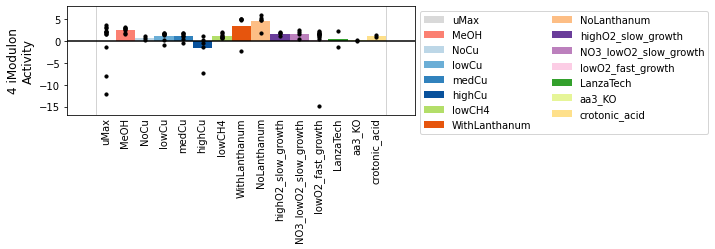

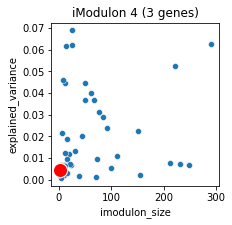

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS18585     0.289296         NaN      4149200    4149536       1   
EQU24_RS20510     0.509493         NaN      4626446    4626638      -1   
EQU24_RS20765     0.311459         NaN      4677500    4678028      -1   

                                       product COG  \
EQU24_RS18585             hypothetical protein   L   
EQU24_RS20510             hypothetical protein   X   
EQU24_RS20765  phosphatase PAP2 family protein   I   

                                            cog_name     uniprot  tu_id  \
EQU24_RS18585  Replication, recombination and repair         NaN    484   
EQU24_RS20510                      No COG annotation         NaN    227   
EQU24_RS20765         Lipid transport and metabolism  A0A4P9US91    191   

                                      tu_name    ncbi_protein gene_name_extra  \
EQU24_RS18585  EQU24_RS18590 // EQU24_RS18585             NaN              ||   
EQU24_RS20510  EQU24_RS20510 // EQU24_RS20505             NaN              ||   
EQU24_RS20765  EQU24_RS20765 // EQU24_RS20760  WP_017841722.1          ||None   

                                                  specific_gos_n  \
EQU24_RS18585  DNA binding\ntransposase activity\ntranspositi...   
EQU24_RS20510                     integral component of membrane   
EQU24_RS20765                     integral component of membrane   

                                                    specific_gos  
EQU24_RS18585  ['DNA binding' 'transposase activity' 'transpo...  
EQU24_RS20510                 ['integral component of membrane']  
EQU24_RS20765                 ['integral component of membrane']

In [29]:
imod_info(4)

In [30]:
ica_data.imodulon_table.loc[4,'function'] = 'small_unclear_EW'


## iMod 5

iModulon 5


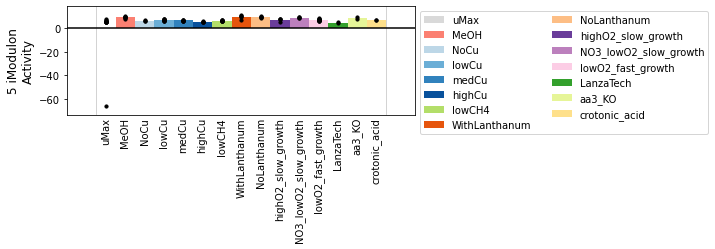

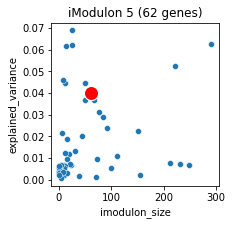

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00075     0.163730        tatB        19487      19799       1   
EQU24_RS00180     0.090058         NaN        40588      41767       1   
EQU24_RS00190     0.152318         NaN        42656      42884      -1   
EQU24_RS01120     0.150378         NaN       229638     229887      -1   
EQU24_RS01165     0.149304         NaN       235384     235645      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS19100     0.146372         NaN      4273940    4274030      -1   
EQU24_RS19665     0.113909         NaN      4420900    4421098       1   
EQU24_RS19915     0.144770         NaN      4474858    4475002       1   
EQU24_RS21260     0.079839         NaN      4791094    4791280       1   
EQU24_RS21835     0.076280         NaN      4924469    4925954      -1   

                                              product COG  \
EQU24_RS00075  twin-arginine translocase subunit TatB   U   
EQU24_RS00180              ISAzo13 family transposase   L   
EQU24_RS00190                    hypothetical protein   X   
EQU24_RS01120                    hypothetical protein   X   
EQU24_RS01165                    hypothetical protein   C   
...                                               ...  ..   
EQU24_RS19100                    hypothetical protein   X   
EQU24_RS19665                    hypothetical protein   X   
EQU24_RS19915                    hypothetical protein   X   
EQU24_RS21260                    hypothetical protein   X   
EQU24_RS21835                  IS4 family transposase   L   

                                                        cog_name  \
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00180              Replication, recombination and repair   
EQU24_RS00190                                  No COG annotation   
EQU24_RS01120                                  No COG annotation   
EQU24_RS01165                   Energy production and conversion   
...                                                          ...   
EQU24_RS19100                                  No COG annotation   
EQU24_RS19665                                  No COG annotation   
EQU24_RS19915                                  No COG annotation   
EQU24_RS21260                                  No COG annotation   
EQU24_RS21835              Replication, recombination and repair   

                     uniprot  tu_id                         tu_name  \
EQU24_RS00075     A0A4P9UII1   2822                    tatB // tatA   
EQU24_RS00180  UPI00110C954A   2807                   EQU24_RS00180   
EQU24_RS00190  UPI00110D139D   2805  EQU24_RS00195 // EQU24_RS00190   
EQU24_RS01120     A0A4P9UIY2   2674                   EQU24_RS01120   
EQU24_RS01165            NaN   2669  EQU24_RS01165 // EQU24_RS01160   
...                      ...    ...                             ...   
EQU24_RS19100            NaN    414                   EQU24_RS19100   
EQU24_RS19665            NaN    334                   EQU24_RS19665   
EQU24_RS19915            NaN    304                   EQU24_RS19915   
EQU24_RS21260            NaN    120                   EQU24_RS21260   
EQU24_RS21835  UPI00034C438D     42                   EQU24_RS21835   

                 ncbi_protein gene_name_extra  \
EQU24_RS00075  WP_017841462.1      tatB||tatB   
EQU24_RS00180  WP_138767046.1          ||None   
EQU24_RS00190  WP_138767047.1          ||None   
EQU24_RS01120  WP_017841274.1          ||None   
EQU24_RS01165             NaN              ||   
...                       ...             ...   
EQU24_RS19100             NaN              ||   
EQU24_RS19665             NaN              ||   
EQU24_RS19915             NaN              ||   
EQU24_RS21260             NaN              ||   
EQU24_RS21835  WP_017841535.1          ||None   

                                                  specific_gos_n  \
EQU24_RS00075  peptide transport\namide transport\norganic su...  

In [33]:
imod_info(5)

In [152]:
ica_data.imodulon_table.loc[5,'function'] = 'FM20_TR1_QC-outlier-response_EW'


## iMod 6

iModulon 6


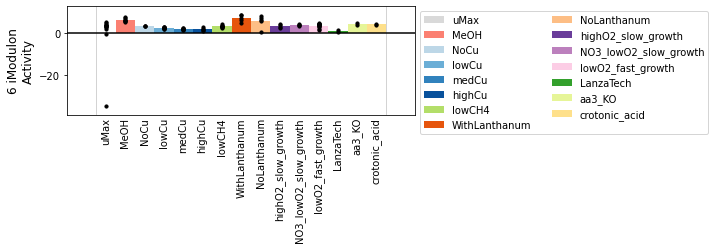

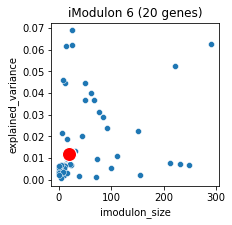

imodulon                      go_name    pvalue    qvalue  precision  \
1         6         transposase activity  0.000005  0.012283       0.25   
2         6  transposition, DNA-mediated  0.000006  0.012283       0.25   

     recall   f1score   TP  target_set_size  imodulon_size source annotation  \
1  0.087719  0.129870  5.0             57.0           20.0     GO        NaN   
2  0.084746  0.126582  5.0             59.0           20.0     GO        NaN   

  pathway_name module_name  
1          NaN         NaN  
2          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00145     0.200061         NaN        34142      34445      -1   
EQU24_RS00250     0.249150         NaN        50778      51069       1   
EQU24_RS03455    -0.108123         NaN       734828     735008      -1   
EQU24_RS04120     0.170696         NaN       864711     865458       1   
EQU24_RS06205     0.148312         NaN      1352804    1353026      -1   
EQU24_RS08030     0.144965         NaN      1772272    1773559      -1   
EQU24_RS08840     0.219171         NaN      1960369    1961011      -1   
EQU24_RS08855     0.119670         NaN      1962417    1963410       1   
EQU24_RS09155     0.149698         NaN      2027636    2027831      -1   
EQU24_RS10680     0.114705         NaN      2374756    2375617      -1   
EQU24_RS10685     0.156053         NaN      2375624    2376014      -1   
EQU24_RS10985     0.183390         NaN      2450472    2451114      -1   
EQU24_RS11915    -0.124226         NaN      2664641    2665580       1   
EQU24_RS12210     0.208689         NaN      2733027    2733327       1   
EQU24_RS14560     0.183409         NaN      3252902    3253085      -1   
EQU24_RS15740     0.200645         NaN      3541355    3541565       1   
EQU24_RS16380     0.156978         NaN      3678261    3678483      -1   
EQU24_RS17325     0.118449         NaN      3883622    3884123      -1   
EQU24_RS17430     0.236214         NaN      3898554    3898644       1   
EQU24_RS20980     0.162475         NaN      4722789    4723914      -1   

                                         product COG  \
EQU24_RS00145               hypothetical protein   J   
EQU24_RS00250               hypothetical protein   X   
EQU24_RS03455               hypothetical protein   X   
EQU24_RS04120                  AAA family ATPase   L   
EQU24_RS06205               hypothetical protein   X   
EQU24_RS08030             IS4 family transposase   L   
EQU24_RS08840                        transposase   X   
EQU24_RS08855               hypothetical protein   S   
EQU24_RS09155               hypothetical protein   X   
EQU24_RS10680             IS4 family transposase   L   
EQU24_RS10685               hypothetical protein   X   
EQU24_RS10985  DUF4255 domain-containing protein   S   
EQU24_RS11915            IS66 family transposase   L   
EQU24_RS12210               hypothetical protein   C   
EQU24_RS14560                CsbD family protein   X   
EQU24_RS15740               hypothetical protein   X   
EQU24_RS16380               hypothetical protein   X   
EQU24_RS17325               hypothetical protein   S   
EQU24_RS17430                          integrase   X   
EQU24_RS20980           ISAs1 family transposase   L   

                                                      cog_name        uniprot  \
EQU24_RS00145  Translation, ribosomal structure and biogenesis     A0A4P9UL47   
EQU24_RS00250                                No COG annotation     A0A4P9UIB5   
EQU24_RS03455                                No COG annotation            NaN   
EQU24_RS04120            Replication, recombination and repair     A0A4P9UK85   
EQU24_RS06205                                No COG annotation            NaN   
EQU24_RS08030            Replication, recombination and repair            NaN   
EQU24_RS08840                                No COG annotation  UPI00110D0B97   
EQU24_RS08855                                 Function unknown     A0A4P9UM20   
EQU24_RS09155                                No COG annotation            NaN   
EQU24_RS10680            Replication, recombination and repair  UPI0015862106   
EQU24_RS10685                                No COG annotation     A0A4P9UQ25   
EQU24_RS10985                                 Function unknown     A0A4P9UMX6   
EQU24_RS11915            Replication, recombination and repair            NaN   
EQU24_RS12210                 Energy production and conversion     A0A4P9UQU4   
EQU24_RS14560                                No COG annotation     A

In [35]:
imod_info(6)

In [36]:
ica_data.imodulon_table.loc[6,'function'] = 'transposase/FM03_TR1_QC-outlier-response_EW'


## iMod 7

iModulon 7


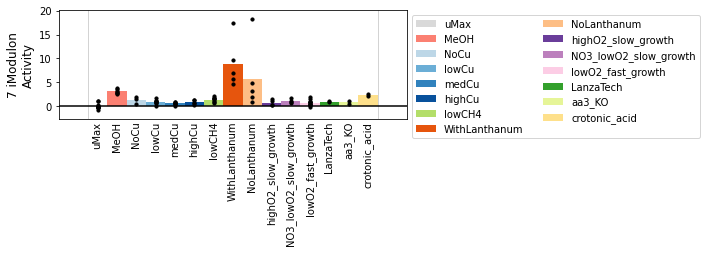

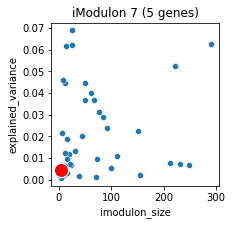

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00625     0.191481         NaN       129668     131204       1   
EQU24_RS00640     0.245683         NaN       131804     134725       1   
EQU24_RS02055    -0.333334         NaN       432512     434726       1   
EQU24_RS18840     0.254045         NaN      4208298    4211219      -1   
EQU24_RS18855     0.315433         NaN      4211819    4213355      -1   

                               product COG  \
EQU24_RS00625                      NaN   X   
EQU24_RS00640                      NaN   X   
EQU24_RS02055  TonB-dependent receptor   P   
EQU24_RS18840                      NaN   X   
EQU24_RS18855                      NaN   X   

                                             cog_name uniprot  tu_id  \
EQU24_RS00625                       No COG annotation     NaN   2744   
EQU24_RS00640                       No COG annotation     NaN   2742   
EQU24_RS02055  Inorganic ion transport and metabolism     NaN   2549   
EQU24_RS18840                       No COG annotation     NaN    447   
EQU24_RS18855                       No COG annotation     NaN    446   

                                                       tu_name  \
EQU24_RS00625                                    EQU24_RS00625   
EQU24_RS00640                                    EQU24_RS00640   
EQU24_RS02055                                    EQU24_RS02055   
EQU24_RS18840                                    EQU24_RS18840   
EQU24_RS18855  EQU24_RS18855 // EQU24_RS18850 // EQU24_RS18845   

                 ncbi_protein gene_name_extra  \
EQU24_RS00625             NaN              ||   
EQU24_RS00640             NaN              ||   
EQU24_RS02055  WP_235726409.1          ||None   
EQU24_RS18840             NaN              ||   
EQU24_RS18855             NaN              ||   

                                                  specific_gos_n  \
EQU24_RS00625                                                NaN   
EQU24_RS00640                                                NaN   
EQU24_RS02055  cell outer membrane\nintegral component of mem...   
EQU24_RS18840                                                NaN   
EQU24_RS18855                                                NaN   

                                                    specific_gos  
EQU24_RS00625                                                 []  
EQU24_RS00640                                                 []  
EQU24_RS02055  ['cell outer membrane' 'integral component of ...  
EQU24_RS18840                                                 []  
EQU24_RS18855                                                 []

In [37]:
imod_info(7)

In [38]:
ica_data.imodulon_table.loc[7,'function'] = 'TonB-receptor/up-in-both-La-vials_EW'


## iMod 8

iModulon 8


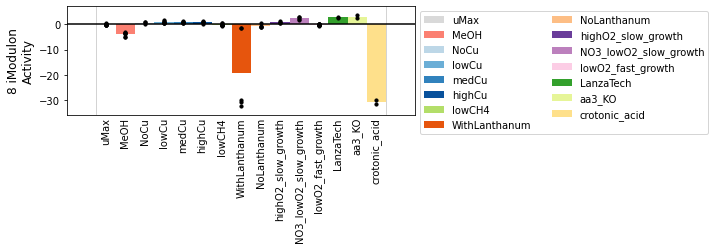

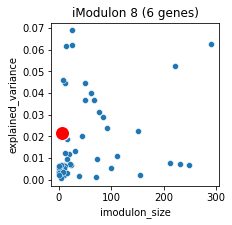

imodulon                                           go_name    pvalue  \
3         8  alcohol dehydrogenase (cytochrome c(L)) activity  0.000002   
1         8                                               NaN  0.000047   
0         8                                               NaN  0.000153   
4         8                                 periplasmic space  0.000043   
0         8                                               NaN  0.000002   
3         8                                               NaN  0.001042   
2         8                                               NaN  0.000284   

     qvalue  precision    recall   f1score   TP  target_set_size  \
3  0.006937   0.333333  1.000000  0.500000  2.0              6.0   
1  0.005965   0.333333  0.250000  0.285714  2.0              8.0   
0  0.051911   0.333333  0.142857  0.200000  2.0             14.0   
4  0.088762   0.500000  0.053571  0.096774  3.0             56.0   
0  0.000381   0.666667  0.051948  0.096386  4.0             77.0   
3  0.065929   0.333333  0.055556  0.095238  2.0             36.0   
2  0.023921   0.666667  0.013937  0.027304  4.0            287.0   

   imodulon_size         source annotation  \
3            6.0             GO        NaN   
1            6.0  KEGG pathways   map00625   
0            6.0   KEGG modules     M00174   
4            6.0             GO        NaN   
0            6.0  KEGG pathways   map00680   
3            6.0  KEGG pathways   map00010   
2            6.0  KEGG pathways   map01120   

                                   pathway_name  \
3                                           NaN   
1     Chloroalkane and chloroalkene degradation   
0                                           NaN   
4                                           NaN   
0                            Methane metabolism   
3                  Glycolysis / Gluconeogenesis   
2  Microbial metabolism in diverse environments   

                                         module_name  
3                                                NaN  
1                                                NaN  
0  Methane oxidation, methanotroph, methane => fo...  
4                                                NaN  
0                                                NaN  
3                                                NaN  
2                                                NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS18110     0.251437        mxaS      4038027    4038882      -1   
EQU24_RS18120     0.253628        moxR      4040146    4041163      -1   
EQU24_RS18125     0.307085        moxI      4041358    4041643      -1   
EQU24_RS18130     0.334695        moxG      4041660    4042134      -1   
EQU24_RS18135     0.338053        moxJ      4042150    4042996      -1   
EQU24_RS18140     0.342458        moxF      4043061    4044870      -1   

                                                         product COG  \
EQU24_RS18110                                       MxaS protein   S   
EQU24_RS18120                                 MoxR family ATPase   S   
EQU24_RS18125                             methanol dehydrogenase   M   
EQU24_RS18130                       cytochrome c(L), periplasmic   C   
EQU24_RS18135             methanol oxidation system protein MoxJ   E   
EQU24_RS18140  PQQ-dependent dehydrogenase, methanol/ethanol ...   G   

                                             cog_name     uniprot  tu_id  \
EQU24_RS18110                        Function unknown  A0A4P9UU55    545   
EQU24_RS18120                        Function unknown  A0A4P9UTL4    544   
EQU24_RS18125  Cell wall/membrane/envelope biogenesis  A0A4P9UR50    543   
EQU24_RS18130        Energy production and conversion  A0A4V1IK77    543   
EQU24_RS18135     Amino acid transport and metabolism  A0A4P9UW33    543   
EQU24_RS18140   Carbohydrate transport and metabolism  A0A4P9URC6    542   

                                      tu_name    ncbi_protein gene_name_extra  \
EQU24_RS18110  EQU24_RS18115 // EQU24_RS18110  WP_017842211.1          ||None   
EQU24_RS18120                   EQU24_RS18120  WP_017842209.1          ||None   
EQU24_RS18125   moxJ // moxG // EQU24_RS18125  WP_017842208.1          ||None   
EQU24_RS18130   moxJ // moxG // EQU24_RS18125  WP_017842207.1      moxG||moxG   
EQU24_RS18135   moxJ // moxG // EQU24_RS18125  WP_017842206.1      moxJ||moxJ   
EQU24_RS18140                   EQU24_RS18140  WP_017842205.1          ||None   

                                                  specific_gos_n  \
EQU24_RS18110                                                NaN   
EQU24_RS18120  ATP hydrolysis activity\nATP binding\ncytoplas...   
EQU24_RS18125  alcohol dehydrogenase (NAD+) activity\nmethano...   
EQU24_RS18130  iron ion binding\nheme binding\nelectron trans...   
EQU24_RS18135      methanol catabolic process\nperiplasmic space   
EQU24_RS18140  calcium ion binding\nalcohol dehydrogenase (cy...   

                                                    specific_gos  
EQU24_RS18110                                                 []  
EQU24_RS18120  ['ATP hydrolysis activity' 'ATP binding' 'cyto...  
EQU24_RS18125  ['alcohol dehydrogenase (NAD+) activity' 'meth...  
EQU24_RS18130  ['iron ion binding' 'heme binding' 'electron t...  
EQU24_RS18135  ['methanol catabolic process' 'periplasmic spa...  
EQU24_RS18140  ['calcium ion binding' 'alcohol dehydrogenase ...

In [39]:
imod_info(8)

In [42]:
ica_data.imodulon_table.loc[8,'category'] = 'functional'
ica_data.imodulon_table.loc[8,'function'] = 'mxa-gene-cluster_EW'
ica_data.change_threshold(8, 0.14)


In [43]:
ica_data.imodulon_table.head(10)

single_gene  imodulon_size  explained_variance         category  \
0            NaN            111            0.010961  uncharacterized   
1            NaN             23            0.006986  uncharacterized   
2            NaN             44            0.020010       functional   
SG_1        True              1            0.003638      single_gene   
4            NaN              3            0.004384  uncharacterized   
5            NaN             62            0.040222  uncharacterized   
6            NaN             20            0.011649  uncharacterized   
7            NaN              5            0.004450  uncharacterized   
8            NaN              6            0.021518       functional   
9            NaN             16            0.009330  uncharacterized   

                                         function  
0                                      unclear_EW  
1                                      unclear_EW  
2           iron-sulfur-binding-and-transport?_EW  
SG_1                                      cas2_EW  
4                                small_unclear_EW  
5                                             NaN  
6     transposase/FM03_TR1_QC-outlier-response_EW  
7            TonB-receptor/up-in-both-La-vials_EW  
8                             mxa-gene-cluster_EW  
9                                             NaN

## iMod 9

iModulon 9


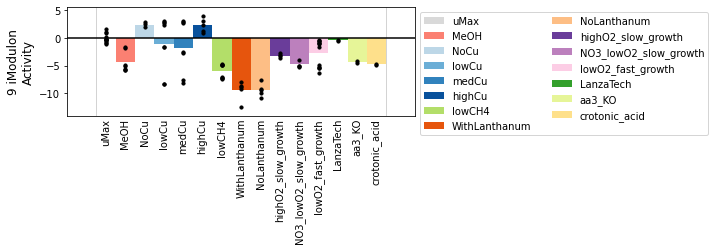

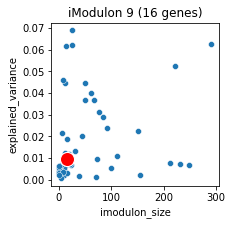

imodulon                                         go_name        pvalue  \
8           9    'de novo' post-translational protein folding  7.228814e-15   
9           9  chaperone cofactor-dependent protein refolding  7.228814e-15   
11          9                       'de novo' protein folding  8.639256e-14   
5           9                        unfolded protein binding  2.264415e-16   
13          9                                   viral process  8.276806e-12   
..        ...                                             ...           ...   
88          9                              cellular_component  8.652295e-05   
72          9                              biological_process  3.369911e-05   
101         9                                cellular process  3.332986e-04   
94          9                              molecular_function  1.424609e-04   
91          9                                             NaN  1.140299e-04   

           qvalue  precision    recall   f1score    TP  target_set_size  \
8    6.897545e-12     0.3750  0.857143  0.521739   6.0              7.0   
9    6.897545e-12     0.3750  0.857143  0.521739   6.0              7.0   
11   5.063838e-11     0.3750  0.666667  0.480000   6.0              9.0   
5    9.290893e-13     0.5000  0.444444  0.470588   8.0             18.0   
13   3.773304e-09     0.3125  0.714286  0.434783   5.0              7.0   
..            ...        ...       ...       ...   ...              ...   
88   4.226234e-03     0.6875  0.011777  0.023158  11.0            934.0   
72   2.033345e-03     0.7500  0.011483  0.022620  12.0           1045.0   
101  1.409819e-02     0.6250  0.011429  0.022447  10.0            875.0   
94   6.494633e-03     0.6875  0.011190  0.022022  11.0            983.0   
91   5.377756e-03     0.7500  0.010256  0.020236  12.0           4717.0   

     imodulon_size source annotation pathway_name module_name  
8             16.0     GO        NaN          NaN         NaN  
9             16.0     GO        NaN          NaN         NaN  
11            16.0     GO        NaN          NaN         NaN  
5             16.0     GO        NaN          NaN         NaN  
13            16.0     GO        NaN          NaN         NaN  
..             ...    ...        ...          ...         ...  
88            16.0     GO        NaN          NaN         NaN  
72            16.0     GO        NaN          NaN         NaN  
101           16.0     GO        NaN          NaN         NaN  
94            16.0     GO        NaN          NaN         NaN  
91            16.0     GO        NaN          NaN         NaN  

[118 rows x 14 columns]

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01215    -0.099586         NaN       244910     246461      -1   
EQU24_RS06210     0.102813         NaN      1353125    1353620      -1   
EQU24_RS08645     0.144326        moeB      1914913    1915657      -1   
EQU24_RS08650     0.264743        groS      1915795    1916083       1   
EQU24_RS08655     0.261296        groL      1916139    1917798       1   
EQU24_RS08660     0.183396         NaN      1917885    1918140       1   
EQU24_RS11535     0.140113        dapB      2577532    2578339      -1   
EQU24_RS11540     0.146958        dnaJ      2578344    2579490      -1   
EQU24_RS11545     0.156558        dnaK      2579645    2581580      -1   
EQU24_RS11550     0.143848        grpE      2581650    2582298      -1   
EQU24_RS11555     0.113224        hrcA      2582366    2583410      -1   
EQU24_RS12235     0.113237         NaN      2737260    2737698      -1   
EQU24_RS15660     0.128757        clpB      3516860    3519440      -1   
EQU24_RS17820     0.164796        groL      3981192    3982815      -1   
EQU24_RS17825     0.176544        groS      3982853    3983144      -1   
EQU24_RS17880     0.191130        htpG      3997666    3999586       1   

                                                       product COG  \
EQU24_RS01215                          IS66 family transposase   L   
EQU24_RS06210                             hypothetical protein   L   
EQU24_RS08645  molybdopterin-synthase adenylyltransferase MoeB   H   
EQU24_RS08650                               co-chaperone GroES   O   
EQU24_RS08655                                 chaperonin GroEL   O   
EQU24_RS08660                        transcriptional regulator   K   
EQU24_RS11535       4-hydroxy-tetrahydrodipicolinate reductase   E   
EQU24_RS11540                         molecular chaperone DnaJ   O   
EQU24_RS11545                         molecular chaperone DnaK   O   
EQU24_RS11550                  nucleotide exchange factor GrpE   O   
EQU24_RS11555    heat-inducible transcriptional repressor HrcA   K   
EQU24_RS12235            Hsp20/alpha crystallin family protein   O   
EQU24_RS15660                     ATP-dependent chaperone ClpB   O   
EQU24_RS17820                                 chaperonin GroEL   O   
EQU24_RS17825                               co-chaperone GroES   O   
EQU24_RS17880                         molecular chaperone HtpG   O   

                                                        cog_name     uniprot  \
EQU24_RS01215              Replication, recombination and repair         NaN   
EQU24_RS06210              Replication, recombination and repair         NaN   
EQU24_RS08645                  Coenzyme transport and metabolism  A0A4P9ULY6   
EQU24_RS08650  Post-translational modification, protein turno...  A0A4P9UP67   
EQU24_RS08655  Post-translational modification, protein turno...  A0A4P9UPY3   
EQU24_RS08660                                      Transcription  A0A4P9UM01   
EQU24_RS11535                Amino acid transport and metabolism  A0A4P9UTC8   
EQU24_RS11540  Post-translational modification, protein turno...  A0A4P9UQG4   
EQU24_RS11545  Post-translational modification, protein turno...  A0A4P9UN97   
EQU24_RS11550  Post-translational modification, protein turno...  A0A4V1IJW3   
EQU24_RS11555                                      Transcription  A0A4P9USU0   
EQU24_RS12235  Post-translational modification, protein turno...  A0A4P9UNJ9   
EQU24_RS15660  Post-translational modification, protein turno...  A0A4P9UQ48   
EQU24_RS17820  Post-translational modification, protein turno...  A0A4P9UR04   
EQU24_RS17825  Post-translational modification, protein turno...  A0A4P9UTH7   
EQU24_RS17880  Post-translational modification, protein turno...  A0A4P9UU16   

               tu_id                tu_name    ncbi_protein gene_name_extra  \
EQU24_RS01215   2664          EQU24_RS01215  WP_040575330.1          ||None   
EQU24_RS06210   2049          EQU24_RS06210  W

In [44]:
imod_info(9)

In [45]:
ica_data.imodulon_table.loc[9,'category'] = 'functional'
ica_data.imodulon_table.loc[9,'function'] = 'groEL/ES-post-translation-mod_EW'


## iMod 10

iModulon 10


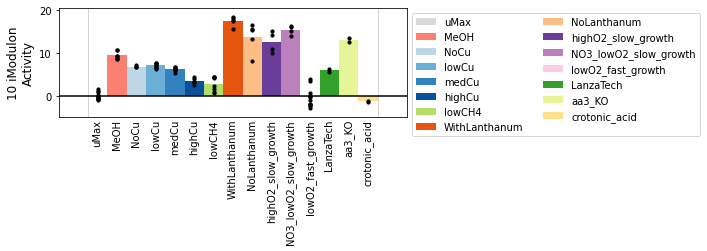

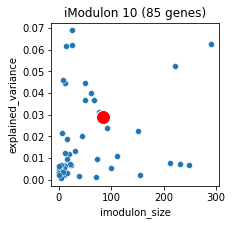

imodulon                         go_name        pvalue        qvalue  \
110        10  cobalamin biosynthetic process  2.501132e-13  1.026214e-09   
17         10                             NaN  6.962008e-12  1.761388e-09   
9          10                             NaN  8.555724e-04  3.232163e-02   
1          10                             NaN  7.930695e-06  1.348218e-03   
2          10                             NaN  7.930695e-06  1.348218e-03   
3          10                             NaN  3.125937e-05  3.542729e-03   
4          10                             NaN  4.023633e-04  1.710044e-02   
5          10                             NaN  4.023633e-04  1.710044e-02   
6          10                             NaN  4.023633e-04  1.710044e-02   
7          10                             NaN  4.023633e-04  1.710044e-02   
8          10                             NaN  4.023633e-04  1.710044e-02   

     precision    recall   f1score    TP  target_set_size  imodulon_size  \
110   0.117647  0.555556  0.194175  10.0             18.0           85.0   
17    0.152941  0.260000  0.192593  13.0             50.0           85.0   
9     0.047059  0.181818  0.074766   4.0             22.0           85.0   
1     0.035294  1.000000  0.068182   3.0              3.0           85.0   
2     0.035294  1.000000  0.068182   3.0              3.0           85.0   
3     0.035294  0.750000  0.067416   3.0              4.0           85.0   
4     0.023529  1.000000  0.045977   2.0              2.0           85.0   
5     0.023529  1.000000  0.045977   2.0              2.0           85.0   
6     0.023529  1.000000  0.045977   2.0              2.0           85.0   
7     0.023529  1.000000  0.045977   2.0              2.0           85.0   
8     0.023529  1.000000  0.045977   2.0              2.0           85.0   

            source annotation          pathway_name  \
110             GO        NaN                   NaN   
17   KEGG pathways   map00860  Porphyrin metabolism   
9     KEGG modules     M00121                   NaN   
1     KEGG modules     M00641                   NaN   
2     KEGG modules     M00642                   NaN   
3     KEGG modules     M00769                   NaN   
4     KEGG modules     M00245                   NaN   
5     KEGG modules     M00246                   NaN   
6     KEGG modules     M00698                   NaN   
7     KEGG modules     M00767                   NaN   
8     KEGG modules     M00768                   NaN   

                                           module_name  
110                                                NaN  
17                                                 NaN  
9    Heme biosynthesis, plants and bacteria, glutam...  
1         Multidrug resistance, efflux pump MexEF-OprN  
2         Multidrug resistance, efflux pump MexJK-OprM  
3         Multidrug resistance, efflux pump MexPQ-OpmE  
4                                                  NaN  
5                                                  NaN  
6         Multidrug resistance, efflux pump BpeEF-OprC  
7                                                  NaN  
8                                                  NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00075     0.063746        tatB        19487      19799       1   
EQU24_RS00670    -0.055578         NaN       139733     140330       1   
EQU24_RS01375    -0.054295         NaN       286650     287097      -1   
EQU24_RS01455     0.046367         NaN       302485     302698      -1   
EQU24_RS01670     0.048319         NaN       352356     352530      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21445     0.041489         NaN      4828409    4828703       1   
EQU24_RS21645     0.046942         NaN      4886529    4886943      -1   
EQU24_RS21950    -0.055511         NaN      4951896    4953342       1   
EQU24_RS21955    -0.057109        hflK      4953432    4954593       1   
EQU24_RS21960    -0.044177        hflC      4954589    4955456       1   

                                                   product COG  \
EQU24_RS00075       twin-arginine translocase subunit TatB   U   
EQU24_RS00670                         hypothetical protein   X   
EQU24_RS01375                         hypothetical protein   X   
EQU24_RS01455          formate dehydrogenase subunit delta   C   
EQU24_RS01670            DUF2292 domain-containing protein   X   
...                                                    ...  ..   
EQU24_RS21445               STAS domain-containing protein   T   
EQU24_RS21645                         hypothetical protein   X   
EQU24_RS21950  sigma-70 family RNA polymerase sigma factor   K   
EQU24_RS21955        FtsH protease activity modulator HflK   O   
EQU24_RS21960                      protease modulator HflC   O   

                                                        cog_name  \
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00670                                  No COG annotation   
EQU24_RS01375                                  No COG annotation   
EQU24_RS01455                   Energy production and conversion   
EQU24_RS01670                                  No COG annotation   
...                                                          ...   
EQU24_RS21445                     Signal transduction mechanisms   
EQU24_RS21645                                  No COG annotation   
EQU24_RS21950                                      Transcription   
EQU24_RS21955  Post-translational modification, protein turno...   
EQU24_RS21960  Post-translational modification, protein turno...   

                     uniprot  tu_id                         tu_name  \
EQU24_RS00075     A0A4P9UII1   2822                    tatB // tatA   
EQU24_RS00670     A0A4P9ULC6   2740                   EQU24_RS00670   
EQU24_RS01375     A0A4P9ULN4   2643                   EQU24_RS01375   
EQU24_RS01455     A0A4P9UIZ0   2630                   EQU24_RS01455   
EQU24_RS01670     A0A4P9UJ24   2600                   EQU24_RS01670   
...                      ...    ...                             ...   
EQU24_RS21445     A0A4P9USJ5     91  EQU24_RS21450 // EQU24_RS21445   
EQU24_RS21645  UPI00034CBEF0     65                   EQU24_RS21645   
EQU24_RS21950  UPI00034C420F     26                   EQU24_RS21950   
EQU24_RS21955     A0A4P9USU2     25            hflB // hflC // hflK   
EQU24_RS21960     A0A4V1IKE3     25            hflB // hflC // hflK   

                 ncbi_protein gene_name_extra  \
EQU24_RS00075  WP_017841462.1      tatB||tatB   
EQU24_RS00670  WP_017841358.1          ||None   
EQU24_RS01375  WP_017841222.1          ||None   
EQU24_RS01455  WP_014146724.1          ||None   
EQU24_RS01670  WP_014146765.1          ||None   
...                       ...             ...   
EQU24_RS21445  WP_017841598.1          ||None   
EQU24_RS21645  WP_138767255.1          ||None   
EQU24_RS21950  WP_175421718.1          ||None   
EQU24_RS21955  WP_017841512.1      hflK||hflK   
EQU24_RS21960  WP_017841511.1      hflC||hflC   

                                                  specific_gos_n  \
EQU24_

In [46]:
imod_info(10)

In [47]:
ica_data.imodulon_table.loc[10,'function'] = 'multi-drug-resistance/efflux-pump_EW'


## iMod 11

iModulon 11


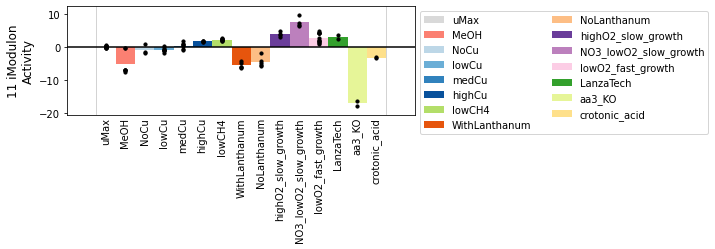

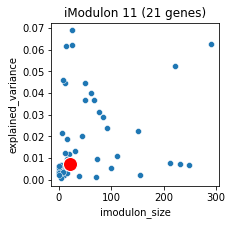

imodulon go_name        pvalue    qvalue  precision    recall   f1score  \
10        11     NaN  1.067918e-07  0.000036   0.142857  1.000000  0.250000   
11        11     NaN  4.257973e-07  0.000072   0.142857  0.750000  0.240000   
12        11     NaN  2.366843e-05  0.001609   0.095238  1.000000  0.173913   
13        11     NaN  2.366843e-05  0.001609   0.095238  1.000000  0.173913   
14        11     NaN  2.366843e-05  0.001609   0.095238  1.000000  0.173913   
18        11     NaN  1.411576e-04  0.035713   0.095238  0.500000  0.160000   
15        11     NaN  4.896094e-04  0.027745   0.095238  0.285714  0.142857   
16        11     NaN  1.786023e-03  0.086750   0.095238  0.153846  0.117647   

     TP  target_set_size  imodulon_size         source annotation  \
10  3.0              3.0           21.0   KEGG modules     M00641   
11  3.0              4.0           21.0   KEGG modules     M00769   
12  2.0              2.0           21.0   KEGG modules     M00698   
13  2.0              2.0           21.0   KEGG modules     M00767   
14  2.0              2.0           21.0   KEGG modules     M00768   
18  2.0              4.0           21.0  KEGG pathways   map00909   
15  2.0              7.0           21.0   KEGG modules     M00155   
16  2.0             13.0           21.0   KEGG modules     M00096   

                                     pathway_name  \
10                                            NaN   
11                                            NaN   
12                                            NaN   
13                                            NaN   
14                                            NaN   
18  Sesquiterpenoid and triterpenoid biosynthesis   
15                                            NaN   
16                                            NaN   

                                          module_name  
10       Multidrug resistance, efflux pump MexEF-OprN  
11       Multidrug resistance, efflux pump MexPQ-OpmE  
12       Multidrug resistance, efflux pump BpeEF-OprC  
13                                                NaN  
14                                                NaN  
18                                                NaN  
15                  Cytochrome c oxidase, prokaryotes  
16  C5 isoprenoid biosynthesis, non-mevalonate pat...

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01635    -0.090892         NaN       344368     345238       1   
EQU24_RS01670    -0.127505         NaN       352356     352530      -1   
EQU24_RS08770     0.110909         NaN      1943066    1944929      -1   
EQU24_RS08775     0.132613         NaN      1944983    1946624      -1   
EQU24_RS08780     0.132006         NaN      1946634    1946991      -1   
EQU24_RS08785     0.125050         NaN      1947024    1949652      -1   
EQU24_RS10820     0.115269         NaN      2404406    2405621       1   
EQU24_RS10825     0.115890         NaN      2405627    2408813       1   
EQU24_RS10830     0.089986         NaN      2408812    2410279       1   
EQU24_RS10985    -0.083312         NaN      2450472    2451114      -1   
EQU24_RS14125     0.372413        ctaD      3155695    3157312      -1   
EQU24_RS14130     0.250735        coxB      3157364    3158534      -1   
EQU24_RS15345     0.088667         NaN      3429453    3430269      -1   
EQU24_RS15350     0.114351         NaN      3430275    3430890      -1   
EQU24_RS15355     0.127893        hpnH      3431505    3432618      -1   
EQU24_RS15360     0.118773         NaN      3433090    3434191       1   
EQU24_RS15365     0.127019         shc      3434201    3436160       1   
EQU24_RS15370     0.108001         NaN      3436156    3436861       1   
EQU24_RS17660     0.078951        fliS      3937926    3938310      -1   
EQU24_RS17690     0.082525         NaN      3946386    3948090      -1   
EQU24_RS18390     0.131754         NaN      4104697    4105996       1   

                                                         product COG  \
EQU24_RS01635                      EAL domain-containing protein   T   
EQU24_RS01670                  DUF2292 domain-containing protein   X   
EQU24_RS08770            1-deoxy-D-xylulose-5-phosphate synthase   H   
EQU24_RS08775                          copper resistance protein   P   
EQU24_RS08780                     copper resistance protein CopC   S   
EQU24_RS08785                            MMPL family transporter   S   
EQU24_RS10820  efflux RND transporter periplasmic adaptor sub...   M   
EQU24_RS10825  multidrug efflux RND transporter permease subunit   V   
EQU24_RS10830          efflux transporter outer membrane subunit   M   
EQU24_RS10985                  DUF4255 domain-containing protein   S   
EQU24_RS14125                     cytochrome c oxidase subunit I   C   
EQU24_RS14130                    cytochrome c oxidase subunit II   C   
EQU24_RS15345                            VacJ family lipoprotein   M   
EQU24_RS15350  hopanoid biosynthesis associated membrane prot...   Q   
EQU24_RS15355                   adenosyl-hopene transferase HpnH   S   
EQU24_RS15360          phytoene/squalene synthase family protein   I   
EQU24_RS15365                           squalene--hopene cyclase   I   
EQU24_RS15370                                      phosphorylase   F   
EQU24_RS17660                    flagellar export chaperone FliS   N   
EQU24_RS17690                                          flagellin   N   
EQU24_RS18390                                        transposase   L   

                                                        cog_name  \
EQU24_RS01635                     Signal transduction mechanisms   
EQU24_RS01670                                  No COG annotation   
EQU24_RS08770                  Coenzyme transport and metabolism   
EQU24_RS08775             Inorganic ion transport and metabolism   
EQU24_RS08780                                   Function unknown   
EQU24_RS08785                                   Function unknown   
EQU24_RS10820             Cell wall/membrane/envelope biogenesis   
EQU24_RS10825                                 Defense mechanisms   
EQU24_RS10830             Cell wall/membrane/envelope biogenesis   
EQU24_RS10985                                   Function unknown   
EQU24_RS14125                   Energy production and

In [48]:
imod_info(11)

In [49]:
ica_data.imodulon_table.loc[11,'function'] = 'multi-drug-resistance/efflux-pump/low-activity-aa3KO_EW'


## iMod 12

iModulon SG_2


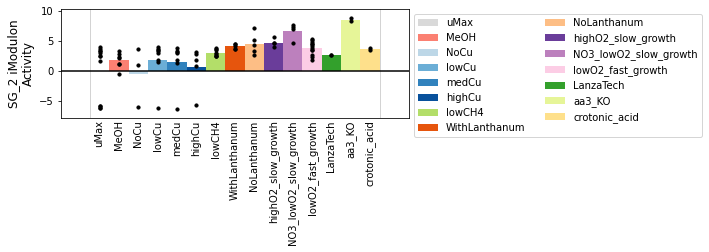

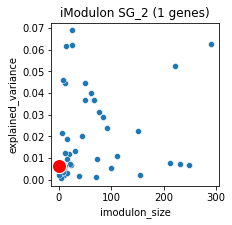

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS17330     0.743204         NaN      3884125    3884449      -1   

                                                     product COG  \
EQU24_RS17330  (2Fe-2S) ferredoxin domain-containing protein   C   

                                       cog_name     uniprot  tu_id  \
EQU24_RS17330  Energy production and conversion  A0A4P9UTU3    638   

                                                         tu_name  \
EQU24_RS17330  EQU24_RS17330 // EQU24_RS17325 // EQU24_RS1732...   

                 ncbi_protein gene_name_extra specific_gos_n specific_gos  
EQU24_RS17330  WP_017842361.1          ||None            NaN           []

In [51]:
imod_info('SG_2')

In [52]:
ica_data.imodulon_table.loc["SG_2",'function'] = 'ferrdoxin_domain_EW'


## iMod 13

iModulon 13


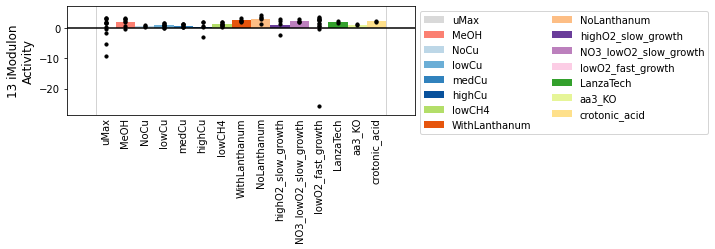

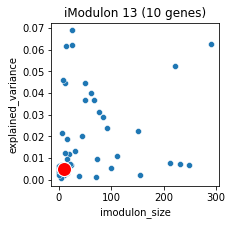

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01175     0.168744        umuD       237101     237485      -1   
EQU24_RS01555     0.194751         NaN       328948     329197       1   
EQU24_RS03435     0.253236         NaN       731708     731891      -1   
EQU24_RS03455     0.302955         NaN       734828     735008      -1   
EQU24_RS08710     0.177812         NaN      1931194    1931374       1   
EQU24_RS10685     0.270555         NaN      2375624    2376014      -1   
EQU24_RS11990     0.203715         NaN      2680903    2681857      -1   
EQU24_RS14930     0.130317         NaN      3328929    3329181      -1   
EQU24_RS16380     0.281520         NaN      3678261    3678483      -1   
EQU24_RS21260     0.230291         NaN      4791094    4791280       1   

                                                         product COG  \
EQU24_RS01175  translesion error-prone DNA polymerase V autop...   K   
EQU24_RS01555                               hypothetical protein   X   
EQU24_RS03435                               hypothetical protein   X   
EQU24_RS03455                               hypothetical protein   X   
EQU24_RS08710                               hypothetical protein   X   
EQU24_RS10685                               hypothetical protein   X   
EQU24_RS11990                          IS1595 family transposase   L   
EQU24_RS14930                               hypothetical protein   X   
EQU24_RS16380                               hypothetical protein   X   
EQU24_RS21260                               hypothetical protein   X   

                                            cog_name        uniprot  tu_id  \
EQU24_RS01175                          Transcription  UPI00191C1247   2668   
EQU24_RS01555                      No COG annotation            NaN   2616   
EQU24_RS03435                      No COG annotation            NaN   2379   
EQU24_RS03455                      No COG annotation            NaN   2375   
EQU24_RS08710                      No COG annotation            NaN   1728   
EQU24_RS10685                      No COG annotation     A0A4P9UQ25   1488   
EQU24_RS11990  Replication, recombination and repair     A0A4P9UQQ5   1320   
EQU24_RS14930                      No COG annotation            NaN    947   
EQU24_RS16380                      No COG annotation     A0A4P9UQD6    753   
EQU24_RS21260                      No COG annotation            NaN    120   

                                                       tu_name  \
EQU24_RS01175                            umuD // EQU24_RS01170   
EQU24_RS01555                                    EQU24_RS01555   
EQU24_RS03435                                    EQU24_RS03435   
EQU24_RS03455                                    EQU24_RS03455   
EQU24_RS08710  EQU24_RS08720 // EQU24_RS08715 // EQU24_RS08710   
EQU24_RS10685                   EQU24_RS10685 // EQU24_RS10680   
EQU24_RS11990                   EQU24_RS11990 // EQU24_RS11985   
EQU24_RS14930                                    EQU24_RS14930   
EQU24_RS16380                                    EQU24_RS16380   
EQU24_RS21260                                    EQU24_RS21260   

                 ncbi_protein gene_name_extra  \
EQU24_RS01175  WP_201764864.1      umuD||umuD   
EQU24_RS01555             NaN              ||   
EQU24_RS03435             NaN              ||   
EQU24_RS03455             NaN              ||   
EQU24_RS08710             NaN              ||   
EQU24_RS10685  WP_040575281.1          ||None   
EQU24_RS11990  WP_017839276.1          ||None   
EQU24_RS14930             NaN              ||   
EQU24_RS16380  WP_017842548.1          ||None   
EQU24_RS21260             NaN              ||   

                                                  specific_gos_n  \
EQU24_RS01175  regulation of transcription, DNA-templated\nDN...   
EQU24_RS01555                     integral component of membrane   
EQU24_RS03435                                                NaN   
EQU24_RS0

In [53]:
imod_info(13)

In [54]:
ica_data.imodulon_table.loc[13,'function'] = 'transposase/FM11_TR1_QC-outlier-response_EW'


## iMod 14

iModulon 14


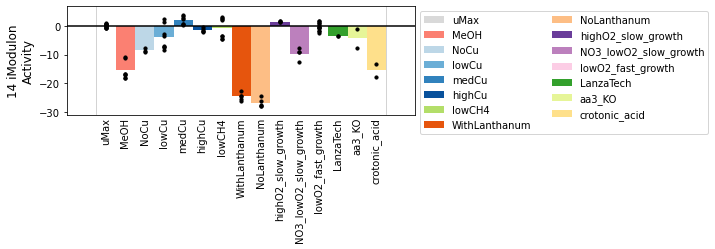

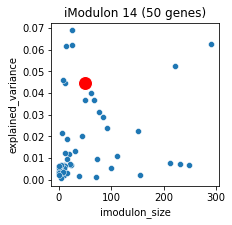

imodulon go_name        pvalue        qvalue  precision    recall  \
19        14     NaN  1.830457e-11  4.631057e-09       0.20  0.243902   
17        14     NaN  1.573774e-06  5.350830e-04       0.06  1.000000   
18        14     NaN  3.069174e-05  5.217596e-03       0.06  0.500000   
21        14     NaN  6.365072e-04  5.367877e-02       0.12  0.065934   
20        14     NaN  4.110500e-04  5.199782e-02       0.04  0.666667   
19        14     NaN  8.158576e-04  9.246386e-02       0.04  0.500000   
22        14     NaN  1.349446e-03  8.535245e-02       0.04  0.400000   

     f1score    TP  target_set_size  imodulon_size         source annotation  \
19  0.219780  10.0             41.0           50.0  KEGG pathways   map00910   
17  0.113208   3.0              3.0           50.0   KEGG modules     M00438   
18  0.107143   3.0              6.0           50.0   KEGG modules     M00530   
21  0.085106   6.0             91.0           50.0  KEGG pathways   map02010   
20  0.075472   2.0              3.0           50.0  KEGG pathways   map00791   
19  0.074074   2.0              4.0           50.0   KEGG modules     M00497   
22  0.072727   2.0              5.0           50.0  KEGG pathways   map05120   

                                         pathway_name  \
19                                Nitrogen metabolism   
17                                                NaN   
18                                                NaN   
21                                   ABC transporters   
20                               Atrazine degradation   
19                                                NaN   
22  Epithelial cell signaling in Helicobacter pylo...   

                                          module_name  
19                                                NaN  
17                                                NaN  
18  Dissimilatory nitrate reduction, nitrate => am...  
21                                                NaN  
20                                                NaN  
19                                                NaN  
22                                                NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00940    -0.059804         NaN       193739     193970       1   
EQU24_RS02555     0.133846         NaN       543573     545553       1   
EQU24_RS03415     0.062606         NaN       722818     723742      -1   
EQU24_RS03420     0.076805         NaN       723738     726303      -1   
EQU24_RS03425     0.097372         NaN       726715     730099      -1   
EQU24_RS03580     0.059997         NaN       767300     768908       1   
EQU24_RS03640     0.121274         NaN       780870     782136       1   
EQU24_RS04700     0.088959         NaN       989861     992348       1   
EQU24_RS05720     0.067366         NaN      1237807    1239430       1   
EQU24_RS07165     0.076077         NaN      1570316    1571609      -1   
EQU24_RS07170     0.065752         NaN      1571891    1572230      -1   
EQU24_RS07175     0.127725         NaN      1572406    1573663      -1   
EQU24_RS07180     0.132874        glnK      1573686    1574025      -1   
EQU24_RS07190     0.104608         NaN      1576594    1577644       1   
EQU24_RS07195     0.095945        ntrC      1577636    1579046       1   
EQU24_RS07240     0.070090         NaN      1596574    1597597       1   
EQU24_RS07870     0.057484         NaN      1735946    1737599      -1   
EQU24_RS08410     0.105145         NaN      1852127    1855529      -1   
EQU24_RS08415     0.087378         NaN      1855868    1856636      -1   
EQU24_RS08970     0.104293         NaN      1982690    1983269      -1   
EQU24_RS08975     0.120530         NaN      1983270    1984749      -1   
EQU24_RS08980     0.059180         NaN      1984850    1985066       1   
EQU24_RS08985     0.069357        nirB      1985450    1988006       1   
EQU24_RS08990     0.065382        nirD      1988008    1988335       1   
EQU24_RS08995     0.062234         NaN      1988343    1989261       1   
EQU24_RS09000     0.100755        cynS      1989572    1990052      -1   
EQU24_RS09005     0.118581         NaN      1990053    1991793      -1   
EQU24_RS09010     0.155442         NaN      1991857    1992667      -1   
EQU24_RS10735    -0.074838         NaN      2384435    2384720      -1   
EQU24_RS12620     0.136861         NaN      2831096    2832494       1   
EQU24_RS12625     0.143883         NaN      2832638    2833655       1   
EQU24_RS12630     0.131101         NaN      2833668    2835429       1   
EQU24_RS12635     0.121304         NaN      2835543    2836815       1   
EQU24_RS12640     0.114396         NaN      2836893    2838117       1   
EQU24_RS12645     0.086932         NaN      2838125    2840795       1   
EQU24_RS12805     0.069236         NaN      2872306    2873593       1   
EQU24_RS14875     0.057401        ureE      3319624    3320056      -1   
EQU24_RS14885     0.082566         NaN      3321756    3322077      -1   
EQU24_RS14890     0.071763        ureA      3322085    3322388      -1   
EQU24_RS14895     0.081658         NaN      3322416    3323265      -1   
EQU24_RS14900     0.072822         NaN      3323269    3323839      -1   
EQU24_RS14910     0.087235         NaN      3324520    3325303      -1   
EQU24_RS14915     0.087880        urtD      3325302    3326121      -1   
EQU24_RS16200     0.059163         NaN      3638794    3639967       1   
EQU24_RS16225     0.088428         NaN      3646206    3647658       1   
EQU24_RS16230     0.089522         NaN      3647657    3648629       1   
EQU24_RS17155     0.060089         NaN      3851756    3852230      -1   
EQU24_RS17160     0.056523         NaN      3852329    3852761      -1   
EQU24_RS17270     0.079971        nifL      3872605    3874195       1   
EQU24_RS19170     0.098271         NaN      4287016    4288225      -1   

                                                         product COG  \
EQU24_RS00940                               hypothetical protein   X   
EQU24_RS02555                               hypothetical protein   N   
EQU24_RS03415           

In [55]:
imod_info(14)

In [56]:
ica_data.imodulon_table.loc[14,'category'] = 'functional'
ica_data.imodulon_table.loc[14,'function'] = 'nitrogen-related-transport_EW'


## iMod 15

iModulon 15


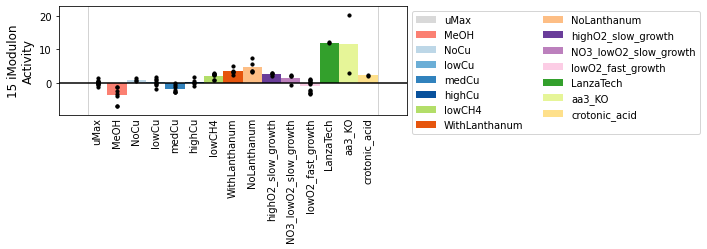

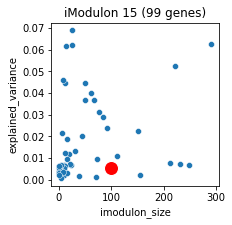

imodulon                      go_name    pvalue    qvalue  precision  \
111        15         transposase activity  0.000005  0.014764   0.090909   
112        15  transposition, DNA-mediated  0.000007  0.014764   0.090909   
113        15            nitrogen fixation  0.000058  0.079286   0.050505   

       recall   f1score   TP  target_set_size  imodulon_size source  \
111  0.157895  0.115385  9.0             57.0           99.0     GO   
112  0.152542  0.113924  9.0             59.0           99.0     GO   
113  0.263158  0.084746  5.0             19.0           99.0     GO   

    annotation pathway_name module_name  
111        NaN          NaN         NaN  
112        NaN          NaN         NaN  
113        NaN          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00180    -0.041682         NaN        40588      41767       1   
EQU24_RS00185    -0.084967         NaN        42145      42478      -1   
EQU24_RS00200    -0.041169         NaN        44158      44386       1   
EQU24_RS00295    -0.052027         NaN        62264      62591      -1   
EQU24_RS01135     0.041073         NaN       231558     231840       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20980    -0.064165         NaN      4722789    4723914      -1   
EQU24_RS21615     0.039951         NaN      4878614    4879973      -1   
EQU24_RS21680    -0.048317         NaN      4893012    4893216      -1   
EQU24_RS21805     0.053774         NaN      4919710    4919809       1   
EQU24_RS22045    -0.041965         NaN      4978984    4979710       1   

                                                         product COG  \
EQU24_RS00180                         ISAzo13 family transposase   L   
EQU24_RS00185                               hypothetical protein   L   
EQU24_RS00200                               hypothetical protein   X   
EQU24_RS00295                               hypothetical protein   X   
EQU24_RS01135                               hypothetical protein   X   
...                                                          ...  ..   
EQU24_RS20980                           ISAs1 family transposase   L   
EQU24_RS21615                               hypothetical protein   X   
EQU24_RS21680                               hypothetical protein   X   
EQU24_RS21805                               hypothetical protein   X   
EQU24_RS22045  cyclic nucleotide-binding domain-containing pr...   K   

                                            cog_name        uniprot  tu_id  \
EQU24_RS00180  Replication, recombination and repair  UPI00110C954A   2807   
EQU24_RS00185  Replication, recombination and repair     A0A4P9UIJ4   2806   
EQU24_RS00200                      No COG annotation            NaN   2804   
EQU24_RS00295                      No COG annotation            NaN   2788   
EQU24_RS01135                      No COG annotation     A0A4P9ULJ3   2673   
...                                              ...            ...    ...   
EQU24_RS20980  Replication, recombination and repair     A0A4P9USK5    155   
EQU24_RS21615                      No COG annotation     A0A4P9USM4     71   
EQU24_RS21680                      No COG annotation            NaN     58   
EQU24_RS21805                      No COG annotation            NaN     44   
EQU24_RS22045                          Transcription            NaN     13   

                                                         tu_name  \
EQU24_RS00180                                      EQU24_RS00180   
EQU24_RS00185                                      EQU24_RS00185   
EQU24_RS00200                                      EQU24_RS00200   
EQU24_RS00295                                      EQU24_RS00295   
EQU24_RS01135  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
...                                                          ...   
EQU24_RS20980                                      EQU24_RS20980   
EQU24_RS21615                                      EQU24_RS21615   
EQU24_RS21680                                      EQU24_RS21680   
EQU24_RS21805                     EQU24_RS21810 // EQU24_RS21805   
EQU24_RS22045                                      EQU24_RS22045   

                 ncbi_protein gene_name_extra  \
EQU24_RS00180  WP_138767046.1          ||None   
EQU24_RS00185  WP_017841440.1          ||None   
EQU24_RS00200             NaN              ||   
EQU24_RS00295             NaN              ||   
EQU24_RS01135  WP_017841271.1          ||None   
...                       ...             ...   
EQU24_RS20980  WP_014149870.1          ||None   
EQU24_RS21615  WP_017841574.1          ||None   
EQU24_RS21680             NaN              ||   
EQU24_RS21805    

In [57]:
imod_info(15)

In [58]:
ica_data.imodulon_table.loc[15,'function'] = 'tranposase/some-nif/up-in-LanzaTech_EW'


## iMod 16

iModulon 16


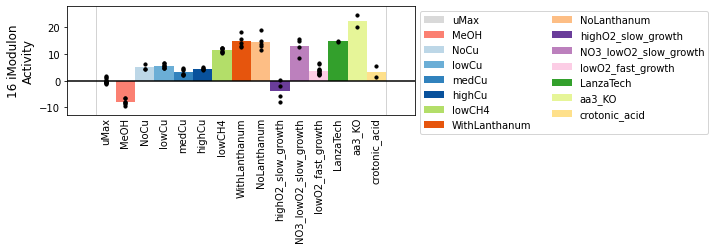

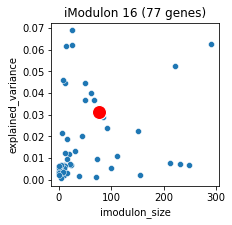

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
23        16     NaN  0.000007  0.001786   0.090909  0.170732  0.118644  7.0   
21        16     NaN  0.000006  0.001971   0.038961  1.000000  0.075000  3.0   
20        16     NaN  0.000023  0.001971   0.038961  0.750000  0.074074  3.0   
22        16     NaN  0.000023  0.001971   0.038961  0.750000  0.074074  3.0   
23        16     NaN  0.000023  0.001971   0.038961  0.750000  0.074074  3.0   
28        16     NaN  0.001849  0.069834   0.038961  0.214286  0.065934  3.0   
24        16     NaN  0.000330  0.016018   0.025974  1.000000  0.050633  2.0   
25        16     NaN  0.000330  0.016018   0.025974  1.000000  0.050633  2.0   
26        16     NaN  0.000330  0.016018   0.025974  1.000000  0.050633  2.0   
27        16     NaN  0.000978  0.041548   0.025974  0.666667  0.050000  2.0   

    target_set_size  imodulon_size         source annotation  \
23             41.0           77.0  KEGG pathways   map00910   
21              3.0           77.0   KEGG modules     M00641   
20              4.0           77.0   KEGG modules     M00528   
22              4.0           77.0   KEGG modules     M00769   
23              4.0           77.0   KEGG modules     M00804   
28             14.0           77.0   KEGG modules     M00174   
24              2.0           77.0   KEGG modules     M00698   
25              2.0           77.0   KEGG modules     M00767   
26              2.0           77.0   KEGG modules     M00768   
27              3.0           77.0   KEGG modules     M00642   

           pathway_name                                        module_name  
23  Nitrogen metabolism                                                NaN  
21                  NaN       Multidrug resistance, efflux pump MexEF-OprN  
20                  NaN                  Nitrification, ammonia => nitrite  
22                  NaN       Multidrug resistance, efflux pump MexPQ-OpmE  
23                  NaN  Complete nitrification, comammox, ammonia => n...  
28                  NaN  Methane oxidation, methanotroph, methane => fo...  
24                  NaN       Multidrug resistance, efflux pump BpeEF-OprC  
25                  NaN                                                NaN  
26                  NaN                                                NaN  
27                  NaN       Multidrug resistance, efflux pump MexJK-OprM

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00125     0.044160         NaN        29783      31106       1   
EQU24_RS00160     0.068972         NaN        36419      36716      -1   
EQU24_RS00590     0.063867         NaN       122491     123085       1   
EQU24_RS00990     0.058695        aqpZ       203431     204151       1   
EQU24_RS01600     0.080537         NaN       335836     336223      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS19310     0.096931        pmoA      4323492    4324236      -1   
EQU24_RS19315     0.064749        pmoC      4324344    4325097      -1   
EQU24_RS19970     0.103401         NaN      4489396    4490098       1   
EQU24_RS20335    -0.045501         NaN      4587226    4587418      -1   
EQU24_RS20990     0.079655         NaN      4725051    4725498       1   

                                                         product COG  \
EQU24_RS00125  autotransporter outer membrane beta-barrel dom...   S   
EQU24_RS00160                               hypothetical protein   X   
EQU24_RS00590                               hypothetical protein   X   
EQU24_RS00990                                        aquaporin Z   G   
EQU24_RS01600                               hypothetical protein   X   
...                                                          ...  ..   
EQU24_RS19310  methane monooxygenase/ammonia monooxygenase su...   C   
EQU24_RS19315  methane monooxygenase/ammonia monooxygenase su...   C   
EQU24_RS19970         transcription antitermination protein NusG   S   
EQU24_RS20335                               hypothetical protein   X   
EQU24_RS20990                  Rsd/AlgQ family anti-sigma factor   K   

                                            cog_name        uniprot  tu_id  \
EQU24_RS00125                       Function unknown  UPI000A00FB62   2815   
EQU24_RS00160                      No COG annotation     A0A4P9UIE4   2811   
EQU24_RS00590                      No COG annotation     A0A4P9UIF8   2751   
EQU24_RS00990  Carbohydrate transport and metabolism            NaN   2695   
EQU24_RS01600                      No COG annotation     A0A4P9UKS7   2609   
...                                              ...            ...    ...   
EQU24_RS19310       Energy production and conversion     A0A4P9UU51    383   
EQU24_RS19315       Energy production and conversion     A0A4P9URM3    383   
EQU24_RS19970                       Function unknown     A0A4P9UV12    298   
EQU24_RS20335                      No COG annotation            NaN    249   
EQU24_RS20990                          Transcription  UPI000347E4E3    153   

                                                       tu_name  \
EQU24_RS00125                                    EQU24_RS00125   
EQU24_RS00160                                    EQU24_RS00160   
EQU24_RS00590                                    EQU24_RS00590   
EQU24_RS00990                                             aqpZ   
EQU24_RS01600                                    EQU24_RS01600   
...                                                        ...   
EQU24_RS19310  EQU24_RS19315 // EQU24_RS19310 // EQU24_RS19305   
EQU24_RS19315  EQU24_RS19315 // EQU24_RS19310 // EQU24_RS19305   
EQU24_RS19970                                    EQU24_RS19970   
EQU24_RS20335                                    EQU24_RS20335   
EQU24_RS20990                                    EQU24_RS20990   

                 ncbi_protein gene_name_extra  \
EQU24_RS00125  WP_083877750.1          ||None   
EQU24_RS00160  WP_017841445.1          ||None   
EQU24_RS00590  WP_026130247.1          ||None   
EQU24_RS00990  WP_235726467.1      aqpZ||aqpZ   
EQU24_RS01600  WP_014146750.1          ||None   
...                       ...             ...   
EQU24_RS19310  WP_017841993.1          ||None   
EQU24_RS19315  WP_017841992.1          ||None   
EQU24_RS19970  WP_017841866.1          ||None   
EQU24_RS20335             NaN            

In [59]:
imod_info(16)

In [60]:
ica_data.imodulon_table.loc[16,'function'] = 'methane-oxidation/nitrification/multi-drug-restistance_EW'


## iMod 17

iModulon 17


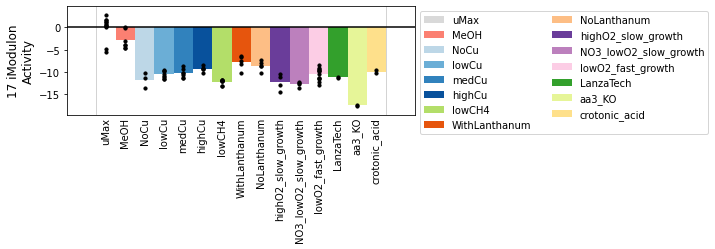

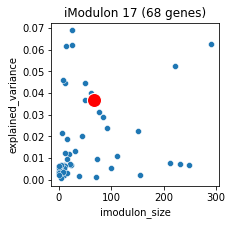

imodulon       go_name        pvalue    qvalue  precision    recall  \
114        17  SOS response  5.806188e-08  0.000238   0.102941  0.291667   
29         17           NaN  1.934685e-08  0.000007   0.073529  0.714286   
115        17    DNA repair  1.507697e-06  0.003093   0.117647  0.150943   

      f1score   TP  target_set_size  imodulon_size        source annotation  \
114  0.152174  7.0             24.0           68.0            GO        NaN   
29   0.133333  5.0              7.0           68.0  KEGG modules     M00729   
115  0.132231  8.0             53.0           68.0            GO        NaN   

    pathway_name module_name  
114          NaN         NaN  
29           NaN         NaN  
115          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00780     0.043733         NaN       161810     161999       1   
EQU24_RS01130     0.060991         NaN       230606     231530       1   
EQU24_RS01170     0.058433         NaN       235812     237102      -1   
EQU24_RS01175     0.166001        umuD       237101     237485      -1   
EQU24_RS01340     0.081903         NaN       280094     280748       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20935     0.048928         NaN      4712832    4713129       1   
EQU24_RS20950     0.079183         NaN      4717305    4718589      -1   
EQU24_RS21765     0.045797         NaN      4907793    4909071       1   
EQU24_RS21860     0.046846         NaN      4931084    4931348       1   
EQU24_RS21870     0.059238         NaN      4931798    4932107       1   

                                                         product COG  \
EQU24_RS00780                               hypothetical protein   X   
EQU24_RS01130                                ATP-binding protein   U   
EQU24_RS01170                            Y-family DNA polymerase   L   
EQU24_RS01175  translesion error-prone DNA polymerase V autop...   K   
EQU24_RS01340                               hypothetical protein   S   
...                                                          ...  ..   
EQU24_RS20935  type II toxin-antitoxin system PemK/MazF famil...   T   
EQU24_RS20950                          ISKra4 family transposase   L   
EQU24_RS21765          aspartate aminotransferase family protein   E   
EQU24_RS21860   type II toxin-antitoxin system HicA family toxin   S   
EQU24_RS21870                               hypothetical protein   X   

                                                        cog_name  \
EQU24_RS00780                                  No COG annotation   
EQU24_RS01130  Intracellular trafficking, secretion, and vesi...   
EQU24_RS01170              Replication, recombination and repair   
EQU24_RS01175                                      Transcription   
EQU24_RS01340                                   Function unknown   
...                                                          ...   
EQU24_RS20935                     Signal transduction mechanisms   
EQU24_RS20950              Replication, recombination and repair   
EQU24_RS21765                Amino acid transport and metabolism   
EQU24_RS21860                                   Function unknown   
EQU24_RS21870                                  No COG annotation   

                     uniprot  tu_id  \
EQU24_RS00780            NaN   2724   
EQU24_RS01130  UPI000344DE75   2673   
EQU24_RS01170     A0A4P9UIZ1   2668   
EQU24_RS01175  UPI00191C1247   2668   
EQU24_RS01340     A0A4V1IJD7   2649   
...                      ...    ...   
EQU24_RS20935     A0A4P9UVF2    163   
EQU24_RS20950     A0A4V1IKC4    161   
EQU24_RS21765     A0A4P9USP8     47   
EQU24_RS21860     A0A4P9UXL9     39   
EQU24_RS21870     A0A4P9USS0     39   

                                                         tu_name  \
EQU24_RS00780                                      EQU24_RS00780   
EQU24_RS01130  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01170                              umuD // EQU24_RS01170   
EQU24_RS01175                              umuD // EQU24_RS01170   
EQU24_RS01340                                      EQU24_RS01340   
...                                                          ...   
EQU24_RS20935                     EQU24_RS20935 // EQU24_RS20930   
EQU24_RS20950                                      EQU24_RS20950   
EQU24_RS21765                     EQU24_RS21770 // EQU24_RS21765   
EQU24_RS21860    EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860   
EQU24_RS21870    EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860   

                 ncbi_protein gene_name_extra  \
EQU24_RS00780             NaN              ||   
EQU24_RS01130  WP_017841272.1          ||None   
EQU24_RS011

In [61]:
imod_info(17)

In [62]:
ica_data.imodulon_table.loc[17,'function'] = 'SOS-response_EW'


## iMod 18

iModulon 18


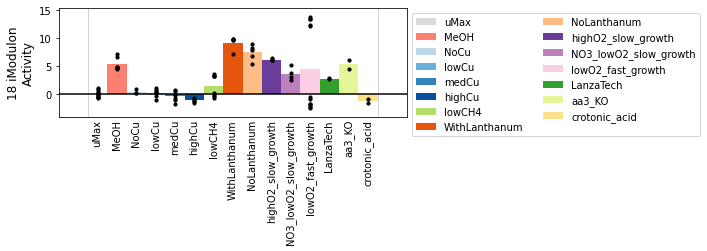

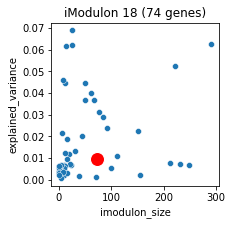

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00470    -0.049488         NaN        97499      98117      -1   
EQU24_RS00940    -0.091433         NaN       193739     193970       1   
EQU24_RS01475     0.051914         NaN       308160     308637      -1   
EQU24_RS01635     0.080004         NaN       344368     345238       1   
EQU24_RS01640     0.069244         NaN       345234     345870       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20860     0.092332         NaN      4701216    4704489       1   
EQU24_RS20865     0.065182         NaN      4704581    4704830       1   
EQU24_RS20870     0.044096         NaN      4704985    4705669       1   
EQU24_RS21100     0.057086         NaN      4752022    4753195      -1   
EQU24_RS21750    -0.049150         NaN      4904690    4905464      -1   

                                           product COG  \
EQU24_RS00470                   GDSL family lipase   E   
EQU24_RS00940                 hypothetical protein   X   
EQU24_RS01475  formate dehydrogenase subunit gamma   C   
EQU24_RS01635        EAL domain-containing protein   T   
EQU24_RS01640                 alpha/beta hydrolase   S   
...                                            ...  ..   
EQU24_RS20860             ribonucleotide reductase   F   
EQU24_RS20865    DUF2442 domain-containing protein   S   
EQU24_RS20870                                NrdJb   F   
EQU24_RS21100                  AMP-binding protein   X   
EQU24_RS21750    DUF3450 domain-containing protein   D   

                                                        cog_name     uniprot  \
EQU24_RS00470                Amino acid transport and metabolism  A0A4P9UK91   
EQU24_RS00940                                  No COG annotation  A0A4P9UIM7   
EQU24_RS01475                   Energy production and conversion  A0A4P9UJ36   
EQU24_RS01635                     Signal transduction mechanisms  A0A4P9UJC3   
EQU24_RS01640                                   Function unknown  A0A4P9UJ64   
...                                                          ...         ...   
EQU24_RS20860                Nucleotide transport and metabolism  A0A4P9UX63   
EQU24_RS20865                                   Function unknown  A0A4P9USI7   
EQU24_RS20870                Nucleotide transport and metabolism  A0A4P9USB1   
EQU24_RS21100                                  No COG annotation  A0A4P9USE2   
EQU24_RS21750  Cell cycle control, cell division, chromosome ...  A0A4P9UXK0   

               tu_id                                            tu_name  \
EQU24_RS00470   2768                                      EQU24_RS00470   
EQU24_RS00940   2704                                      EQU24_RS00940   
EQU24_RS01475   2629  EQU24_RS01475 // EQU24_RS01470 // EQU24_RS0146...   
EQU24_RS01635   2604                     EQU24_RS01640 // EQU24_RS01635   
EQU24_RS01640   2604                     EQU24_RS01640 // EQU24_RS01635   
...              ...                                                ...   
EQU24_RS20860    173                                      EQU24_RS20860   
EQU24_RS20865    172                                      EQU24_RS20865   
EQU24_RS20870    171                                      EQU24_RS20870   
EQU24_RS21100    140                               pyp // EQU24_RS21100   
EQU24_RS21750     50  EQU24_RS21750 // EQU24_RS21745 // EQU24_RS2174...   

                 ncbi_protein gene_name_extra  \
EQU24_RS00470  WP_017841393.1          ||None   
EQU24_RS00940  WP_017841310.1          ||None   
EQU24_RS01475  WP_017841204.1          ||None   
EQU24_RS01635  WP_017841179.1          ||None   
EQU24_RS01640  WP_017841178.1          ||None   
...                       ...             ...   
EQU24_RS20860  WP_017841702.1          ||None   
EQU24_RS20865  WP_017841701.1          ||None   
EQU24_RS20870  WP_017841700.1          ||None   
EQU24_RS21100  WP_017841658.1          ||None   
EQU24_RS21750  WP_017841551.

In [63]:
imod_info(18)

In [64]:
ica_data.imodulon_table.loc[18,'function'] = 'metal-ion-binding/lowO2-fast-growth-split_EW'


## iMod 19

iModulon 19


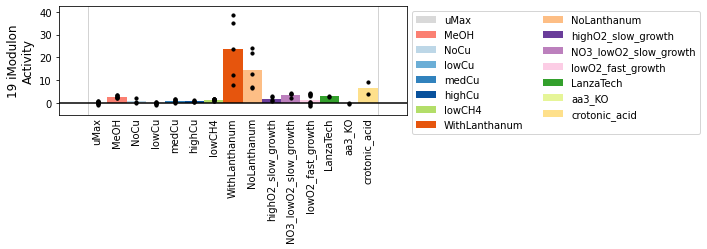

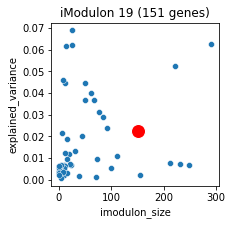

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
31        19     NaN  0.000430  0.073089   0.026490  0.363636  0.049383  4.0   
32        19     NaN  0.000881  0.099800   0.026490  0.307692  0.048780  4.0   
30        19     NaN  0.000045  0.015356   0.019868  1.000000  0.038961  3.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
31             11.0          151.0  KEGG modules     M00742          NaN   
32             13.0          151.0  KEGG modules     M00258          NaN   
30              3.0          151.0  KEGG modules     M00087          NaN   

       module_name  
31             NaN  
32             NaN  
30  beta-Oxidation

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00090     0.039406        thyA        22412      23246       1   
EQU24_RS00095     0.065469         NaN        23251      23782      -1   
EQU24_RS00160     0.041920         NaN        36419      36716      -1   
EQU24_RS00455     0.039042        tatA        96158      96371       1   
EQU24_RS00625     0.039606         NaN       129668     131204       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22065     0.046063         NaN      4983178    4984960      -1   
EQU24_RS22070     0.045171         NaN      4984959    4985940      -1   
EQU24_RS22075     0.056155         NaN      4985936    4986413      -1   
EQU24_RS22080     0.046180         NaN      4986412    4987321      -1   
EQU24_RS22085     0.040916         NaN      4987320    4988301      -1   

                                                         product COG  \
EQU24_RS00090                               thymidylate synthase   F   
EQU24_RS00095                               hypothetical protein   X   
EQU24_RS00160                               hypothetical protein   X   
EQU24_RS00455  twin-arginine translocase TatA/TatE family sub...   U   
EQU24_RS00625                                                NaN   X   
...                                                          ...  ..   
EQU24_RS22065                      VWA domain-containing protein   S   
EQU24_RS22070                      VWA domain-containing protein   S   
EQU24_RS22075                  DUF4381 domain-containing protein   S   
EQU24_RS22080                    DUF58 domain-containing protein   S   
EQU24_RS22085                                 MoxR family ATPase   S   

                                                        cog_name     uniprot  \
EQU24_RS00090                Nucleotide transport and metabolism  A0A4P9UL39   
EQU24_RS00095                                  No COG annotation  A0A4P9UI81   
EQU24_RS00160                                  No COG annotation  A0A4P9UIE4   
EQU24_RS00455  Intracellular trafficking, secretion, and vesi...  A0A4P9UIV2   
EQU24_RS00625                                  No COG annotation         NaN   
...                                                          ...         ...   
EQU24_RS22065                                   Function unknown         NaN   
EQU24_RS22070                                   Function unknown  A0A4P9UVF8   
EQU24_RS22075                                   Function unknown  A0A4P9USW0   
EQU24_RS22080                                   Function unknown  A0A4V1IKE5   
EQU24_RS22085                                   Function unknown  A0A4P9UXQ5   

               tu_id                                            tu_name  \
EQU24_RS00090   2820                              thyA // EQU24_RS00085   
EQU24_RS00095   2819                                      EQU24_RS00095   
EQU24_RS00160   2811                                      EQU24_RS00160   
EQU24_RS00455   2769                               tatC // tatB // tatA   
EQU24_RS00625   2744                                      EQU24_RS00625   
...              ...                                                ...   
EQU24_RS22065      9  EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...   
EQU24_RS22070      9  EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...   
EQU24_RS22075      9  EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...   
EQU24_RS22080      9  EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...   
EQU24_RS22085      9  EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...   

                 ncbi_protein gene_name_extra  \
EQU24_RS00090  WP_017841458.1      thyA||thyA   
EQU24_RS00095  WP_017841457.1          ||None   
EQU24_RS00160  WP_017841445.1          ||None   
EQU24_RS00455  WP_017841396.1      tatA||tatA   
EQU24_RS00625             NaN              ||   
...                       ...             ...   
EQU24_RS22065  WP_017841489.1          ||None   
EQU24_R

In [65]:
imod_info(19)

In [66]:
ica_data.imodulon_table.loc[19,'function'] = 'fatty-acid-beta-oxidation/membrane?_EW'


## iMod 20

iModulon 20


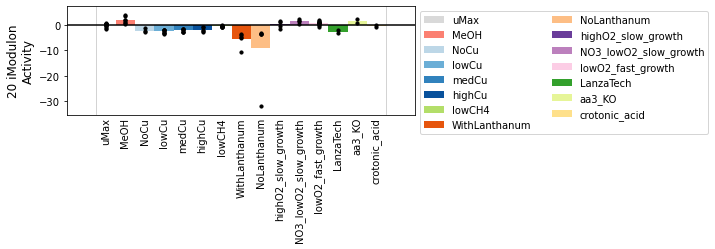

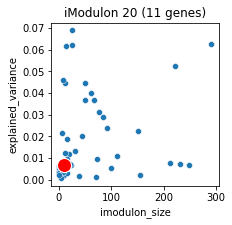

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00185     0.177116         NaN        42145      42478      -1   
EQU24_RS01150     0.164147         NaN       234038     234461       1   
EQU24_RS01765     0.211193         NaN       371879     372134      -1   
EQU24_RS05320     0.205633        cobS      1131915    1132662      -1   
EQU24_RS06205     0.103195         NaN      1352804    1353026      -1   
EQU24_RS08455     0.203140        urtB      1866865    1867792       1   
EQU24_RS08830     0.111397         NaN      1958454    1959186      -1   
EQU24_RS11970     0.185784         NaN      2677956    2678349      -1   
EQU24_RS14755     0.161133         NaN      3300040    3300526      -1   
EQU24_RS15150     0.092793         NaN      3384817    3385819       1   
EQU24_RS20980     0.104415         NaN      4722789    4723914      -1   

                                                  product COG  \
EQU24_RS00185                        hypothetical protein   L   
EQU24_RS01150                        hypothetical protein   X   
EQU24_RS01765            DUF504 domain-containing protein   A   
EQU24_RS05320  adenosylcobinamide-GDP ribazoletransferase   H   
EQU24_RS06205                        hypothetical protein   X   
EQU24_RS08455  urea ABC transporter permease subunit UrtB   E   
EQU24_RS08830                                 transposase   L   
EQU24_RS11970                        hypothetical protein   Q   
EQU24_RS14755       hemerythrin domain-containing protein   S   
EQU24_RS15150                        hypothetical protein   X   
EQU24_RS20980                    ISAs1 family transposase   L   

                                                        cog_name  \
EQU24_RS00185              Replication, recombination and repair   
EQU24_RS01150                                  No COG annotation   
EQU24_RS01765                    RNA processing and modification   
EQU24_RS05320                  Coenzyme transport and metabolism   
EQU24_RS06205                                  No COG annotation   
EQU24_RS08455                Amino acid transport and metabolism   
EQU24_RS08830              Replication, recombination and repair   
EQU24_RS11970  Secondary metabolites biosynthesis, transport,...   
EQU24_RS14755                                   Function unknown   
EQU24_RS15150                                  No COG annotation   
EQU24_RS20980              Replication, recombination and repair   

                     uniprot  tu_id  \
EQU24_RS00185     A0A4P9UIJ4   2806   
EQU24_RS01150     A0A4P9UIU6   2671   
EQU24_RS01765     A0A4P9ULU4   2590   
EQU24_RS05320     A0A4P9UMQ7   2166   
EQU24_RS06205            NaN   2050   
EQU24_RS08455     A0A4V1IJQ9   1762   
EQU24_RS08830  UPI00158623C4   1713   
EQU24_RS11970     A0A4P9URC2   1322   
EQU24_RS14755     A0A4P9UPL3    966   
EQU24_RS15150     A0A4P9UPS4    916   
EQU24_RS20980     A0A4P9USK5    155   

                                                      tu_name    ncbi_protein  \
EQU24_RS00185                                   EQU24_RS00185  WP_017841440.1   
EQU24_RS01150                                   EQU24_RS01150  WP_017841268.1   
EQU24_RS01765                                   EQU24_RS01765  WP_017841154.1   
EQU24_RS05320  cobS // cobC // EQU24_RS05310 // EQU24_RS05305  WP_017840486.1   
EQU24_RS06205                                   EQU24_RS06205             NaN   
EQU24_RS08455   EQU24_RS08475 // urtE // urtD // urtC // urtB  WP_017839901.1   
EQU24_RS08830                                   EQU24_RS08830  WP_175421673.1   
EQU24_RS11970                  EQU24_RS11970 // EQU24_RS11965  WP_051056233.1   
EQU24_RS14755                                   EQU24_RS14755  WP_017838763.1   
EQU24_RS15150                                   EQU24_RS15150  WP_017838693.1   
EQU24_RS20980                                   EQU24_RS20980  WP_014149870.1   

              gene_name_extra  \
EQU24_RS00185          ||None   
EQU24_RS01150       

In [67]:
imod_info(20)

In [68]:
ica_data.imodulon_table.loc[20,'function'] = 'unclear/outlier-response-vial-woLa_EW'


## iMod 21

iModulon 21


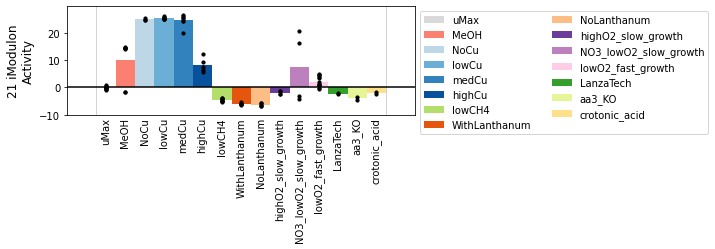

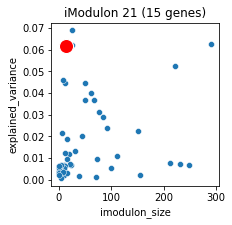

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
33        21     NaN  0.000047  0.015896        0.2  0.142857  0.166667  3.0   
25        21     NaN  0.000574  0.086839        0.2  0.062500  0.095238  3.0   
24        21     NaN  0.000686  0.086839        0.2  0.058824  0.090909  3.0   

    target_set_size  imodulon_size         source annotation  \
33             21.0           15.0   KEGG modules     M00331   
25             48.0           15.0  KEGG pathways   map05111   
24             51.0           15.0  KEGG pathways   map03070   

                           pathway_name module_name  
33                                  NaN         NaN  
25  Biofilm formation - Vibrio cholerae         NaN  
24           Bacterial secretion system         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00940     0.172611         NaN       193739     193970       1   
EQU24_RS07675     0.159194         NaN      1687716    1689852      -1   
EQU24_RS07680     0.172562         NaN      1690300    1691008      -1   
EQU24_RS19470     0.156530         NaN      4363642    4366327      -1   
EQU24_RS19475     0.176029         NaN      4366809    4368060      -1   
EQU24_RS19480     0.190035         NaN      4368064    4370446      -1   
EQU24_RS19485     0.207103         NaN      4371273    4371714      -1   
EQU24_RS19490     0.200073         NaN      4371734    4372952      -1   
EQU24_RS19495     0.206576         NaN      4373252    4375061      -1   
EQU24_RS19500     0.229408         NaN      4376070    4376724      -1   
EQU24_RS19505     0.229517         NaN      4376720    4378118      -1   
EQU24_RS19510     0.247681         NaN      4378491    4379061      -1   
EQU24_RS19515     0.254676         NaN      4379234    4379630      -1   
EQU24_RS19520     0.347010         NaN      4381327    4382239      -1   
EQU24_RS21000     0.153899         NaN      4728787    4731319       1   

                                                 product COG  \
EQU24_RS00940                       hypothetical protein   X   
EQU24_RS07675               conjugation transfer protein   C   
EQU24_RS07680                       hypothetical protein   X   
EQU24_RS19470                 S8 family serine peptidase   Q   
EQU24_RS19475                       hypothetical protein   X   
EQU24_RS19480                     DUF3438 family protein   N   
EQU24_RS19485                       hypothetical protein   X   
EQU24_RS19490  type II secretion system F family protein   U   
EQU24_RS19495                       hypothetical protein   N   
EQU24_RS19500                       hypothetical protein   X   
EQU24_RS19505                       hypothetical protein   X   
EQU24_RS19510          DUF2939 domain-containing protein   X   
EQU24_RS19515                       hypothetical protein   X   
EQU24_RS19520           type II secretion system protein   X   
EQU24_RS21000                       hypothetical protein   G   

                                                        cog_name  \
EQU24_RS00940                                  No COG annotation   
EQU24_RS07675                   Energy production and conversion   
EQU24_RS07680                                  No COG annotation   
EQU24_RS19470  Secondary metabolites biosynthesis, transport,...   
EQU24_RS19475                                  No COG annotation   
EQU24_RS19480                                      Cell motility   
EQU24_RS19485                                  No COG annotation   
EQU24_RS19490  Intracellular trafficking, secretion, and vesi...   
EQU24_RS19495                                      Cell motility   
EQU24_RS19500                                  No COG annotation   
EQU24_RS19505                                  No COG annotation   
EQU24_RS19510                                  No COG annotation   
EQU24_RS19515                                  No COG annotation   
EQU24_RS19520                                  No COG annotation   
EQU24_RS21000              Carbohydrate transport and metabolism   

                     uniprot  tu_id                         tu_name  \
EQU24_RS00940     A0A4P9UIM7   2704                   EQU24_RS00940   
EQU24_RS07675            NaN   1863                   EQU24_RS07675   
EQU24_RS07680     A0A4P9UR71   1862                   EQU24_RS07680   
EQU24_RS19470  UPI001586656B    363  EQU24_RS19470 // EQU24_RS19465   
EQU24_RS19475  UPI00110D1B61    362  EQU24_RS19480 // EQU24_RS19475   
EQU24_RS19480     A0A4P9UU80    362  EQU24_RS19480 // EQU24_RS19475   
EQU24_RS19485     A0A4P9URP9    361  EQU24_RS19490 // EQU24_RS19485   
EQU24_RS19490     A0A4V1IKA0    361  EQU24_RS19490 // EQU24_RS19485   
EQU24_RS19495     A0A4P9UWM5    360                   EQU24_RS19495   
EQU24_

In [69]:
imod_info(21)

In [72]:
ica_data.imodulon_table.loc[21,'category'] = 'functional'
ica_data.imodulon_table.loc[21,'function'] = 'cu-repression/alexey-gene-cluster_EW'


## iMod 22

iModulon 22


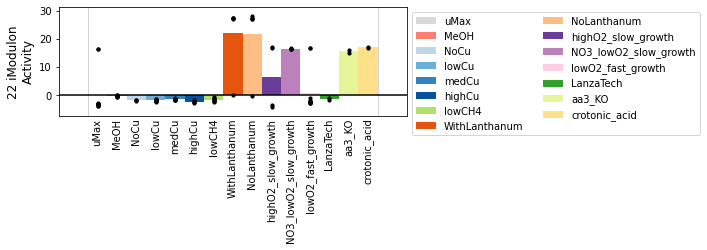

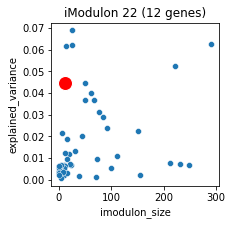

imodulon                      go_name        pvalue        qvalue  \
116        22         transposase activity  4.272795e-11  1.128696e-07   
117        22  transposition, DNA-mediated  5.501810e-11  1.128696e-07   
118        22                  DNA binding  1.513982e-08  2.070623e-05   

     precision    recall   f1score   TP  target_set_size  imodulon_size  \
116   0.583333  0.122807  0.202899  7.0             57.0           12.0   
117   0.583333  0.118644  0.197183  7.0             59.0           12.0   
118   0.750000  0.027778  0.053571  9.0            324.0           12.0   

    source annotation pathway_name module_name  
116     GO        NaN          NaN         NaN  
117     GO        NaN          NaN         NaN  
118     GO        NaN          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS04160     0.132124         NaN       874502     874683      -1   
EQU24_RS05675     0.170727         NaN      1225286    1226585       1   
EQU24_RS06200     0.249700         NaN      1352012    1352726      -1   
EQU24_RS06885     0.176220         NaN      1513567    1514488      -1   
EQU24_RS09050     0.126247         NaN      2000662    2002213       1   
EQU24_RS12805     0.123052         NaN      2872306    2873593       1   
EQU24_RS14960     0.285722         NaN      3336399    3337698      -1   
EQU24_RS16040     0.151802         NaN      3603377    3604664      -1   
EQU24_RS17670     0.261631         NaN      3940109    3941288       1   
EQU24_RS18390     0.199074         NaN      4104697    4105996       1   
EQU24_RS18395     0.260085         NaN      4106620    4107907      -1   
EQU24_RS20230     0.213987         NaN      4565617    4566796      -1   

                                                         product COG  \
EQU24_RS04160                                                NaN   X   
EQU24_RS05675                                        transposase   L   
EQU24_RS06200                                        transposase   L   
EQU24_RS06885  Rpn family recombination-promoting nuclease/pu...   S   
EQU24_RS09050                            IS66 family transposase   L   
EQU24_RS12805                             IS4 family transposase   L   
EQU24_RS14960                                        transposase   L   
EQU24_RS16040                           ISNCY family transposase   L   
EQU24_RS17670                         ISAzo13 family transposase   L   
EQU24_RS18390                                        transposase   L   
EQU24_RS18395                           ISNCY family transposase   L   
EQU24_RS20230                         ISAzo13 family transposase   L   

                                            cog_name        uniprot  tu_id  \
EQU24_RS04160                      No COG annotation            NaN   2308   
EQU24_RS05675  Replication, recombination and repair  UPI00110CA81F   2119   
EQU24_RS06200  Replication, recombination and repair            NaN   2051   
EQU24_RS06885                       Function unknown     A0A4P9UQW1   1956   
EQU24_RS09050  Replication, recombination and repair            NaN   1685   
EQU24_RS12805  Replication, recombination and repair            NaN   1225   
EQU24_RS14960  Replication, recombination and repair  UPI00110CA81F    942   
EQU24_RS16040  Replication, recombination and repair  UPI001AD9057B    798   
EQU24_RS17670  Replication, recombination and repair  UPI00110D0AC0    594   
EQU24_RS18390  Replication, recombination and repair  UPI00110CA81F    506   
EQU24_RS18395  Replication, recombination and repair  UPI001AD9057B    505   
EQU24_RS20230  Replication, recombination and repair  UPI00110D0AC0    262   

                                                         tu_name  \
EQU24_RS04160  EQU24_RS04170 // EQU24_RS04165 // ssrS // EQU2...   
EQU24_RS05675                                      EQU24_RS05675   
EQU24_RS06200                                      EQU24_RS06200   
EQU24_RS06885                                      EQU24_RS06885   
EQU24_RS09050                                      EQU24_RS09050   
EQU24_RS12805                                      EQU24_RS12805   
EQU24_RS14960                                      EQU24_RS14960   
EQU24_RS16040                                      EQU24_RS16040   
EQU24_RS17670                                      EQU24_RS17670   
EQU24_RS18390                                      EQU24_RS18390   
EQU24_RS18395                                      EQU24_RS18395   
EQU24_RS20230                                      EQU24_RS20230   

                 ncbi_protein gene_name_extra  \
EQU24_RS04160             NaN              ||   
EQU24_RS05675  WP_138767097.1          ||None   
EQU24_RS06200  WP_138767106.1          ||None   
EQU24_RS06885  WP_0

In [71]:
imod_info(22)

In [73]:
ica_data.imodulon_table.loc[22,'function'] = 'transposase_EW'


## iMod 23

iModulon 23


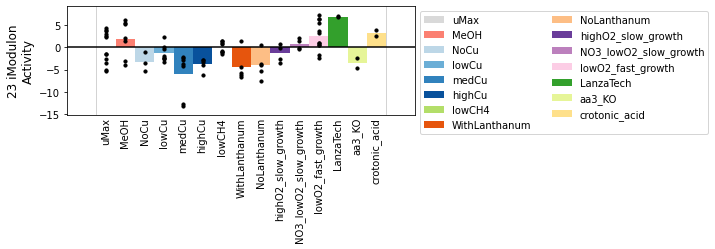

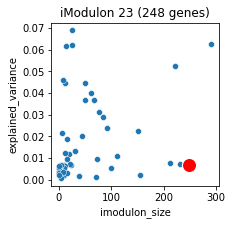

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00055     0.036736         NaN        13298      13604       1   
EQU24_RS00220    -0.031137         NaN        47518      47746       1   
EQU24_RS00345     0.063690         NaN        75073      75976       1   
EQU24_RS00385     0.043094         NaN        82311      82518      -1   
EQU24_RS00575     0.033146        guaA       118260     119850       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21670    -0.030516         NaN      4891050    4892307       1   
EQU24_RS21810    -0.048837         NaN      4919808    4920090       1   
EQU24_RS21820    -0.029377         NaN      4921568    4921862       1   
EQU24_RS21860    -0.041239         NaN      4931084    4931348       1   
EQU24_RS22110     0.028308         NaN      4992034    4992421       1   

                                                        product COG  \
EQU24_RS00055                 DUF3240 domain-containing protein   S   
EQU24_RS00220  type II toxin-antitoxin system HicA family toxin   N   
EQU24_RS00345                              hypothetical protein   S   
EQU24_RS00385                              hypothetical protein   X   
EQU24_RS00575                glutamine-hydrolyzing GMP synthase   F   
...                                                         ...  ..   
EQU24_RS21670              transcription termination factor Rho   K   
EQU24_RS21810              XRE family transcriptional regulator   K   
EQU24_RS21820                              hypothetical protein   X   
EQU24_RS21860  type II toxin-antitoxin system HicA family toxin   S   
EQU24_RS22110                              hypothetical protein   X   

                                          cog_name     uniprot  tu_id  \
EQU24_RS00055                     Function unknown  A0A4V1IJB5   2825   
EQU24_RS00220                        Cell motility         NaN   2801   
EQU24_RS00345                     Function unknown  A0A4P9UN22   2783   
EQU24_RS00385                    No COG annotation         NaN   2778   
EQU24_RS00575  Nucleotide transport and metabolism  A0A4P9UIG6   2753   
...                                            ...         ...    ...   
EQU24_RS21670                        Transcription  A0A4P9UUY0     60   
EQU24_RS21810                        Transcription  A0A4P9USY3     44   
EQU24_RS21820                    No COG annotation  A0A4P9USQ6     43   
EQU24_RS21860                     Function unknown  A0A4P9UXL9     39   
EQU24_RS22110                    No COG annotation  A0A4P9UV47      6   

                                                         tu_name  \
EQU24_RS00055  EQU24_RS00055 // EQU24_RS00050 // EQU24_RS0004...   
EQU24_RS00220                     EQU24_RS00220 // EQU24_RS00215   
EQU24_RS00345  EQU24_RS00345 // EQU24_RS00340 // EQU24_RS0033...   
EQU24_RS00385                                      EQU24_RS00385   
EQU24_RS00575                               tadA // guaA // guaB   
...                                                          ...   
EQU24_RS21670                                      EQU24_RS21670   
EQU24_RS21810                     EQU24_RS21810 // EQU24_RS21805   
EQU24_RS21820  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS21860    EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860   
EQU24_RS22110                                      EQU24_RS22110   

                 ncbi_protein gene_name_extra  \
EQU24_RS00055  WP_014146532.1          ||None   
EQU24_RS00220             NaN              ||   
EQU24_RS00345  WP_017841415.1          ||None   
EQU24_RS00385             NaN              ||   
EQU24_RS00575  WP_026130248.1      guaA||guaA   
...                       ...             ...   
EQU24_RS21670  WP_014150367.1           ||rho   
EQU24_RS21810  WP_017841540.1          ||None   
EQU24_RS21820  WP_017841538.1          ||None   
EQU24_RS21860  WP_017841530.1          ||None   
EQU24_RS22110  WP_017841480.1          |

In [74]:
imod_info(23)

In [75]:
ica_data.imodulon_table.loc[23,'function'] = 'large-unclear_EW'


## iMod 24

iModulon 24


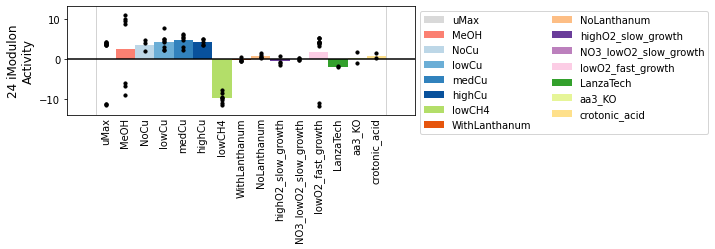

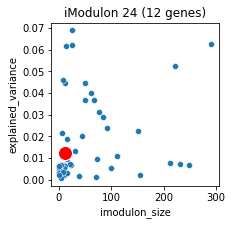

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS05090     0.108202         NaN      1086306    1086642      -1   
EQU24_RS05635     0.161858         NaN      1220732    1220808       1   
EQU24_RS07375     0.186629         NaN      1630411    1630488       1   
EQU24_RS07995     0.131993         NaN      1765410    1766609      -1   
EQU24_RS08855     0.189787         NaN      1962417    1963410       1   
EQU24_RS10780     0.149371         NaN      2397391    2397468      -1   
EQU24_RS12815     0.223422         NaN      2875910    2876903      -1   
EQU24_RS15125     0.110033         NaN      3379487    3379572      -1   
EQU24_RS17665     0.125445         NaN      3938733    3940029      -1   
EQU24_RS18555     0.112939         NaN      4143018    4143095      -1   
EQU24_RS18860     0.252169         NaN      4213623    4213699      -1   
EQU24_RS20610     0.411373         NaN      4646544    4647282      -1   

                                product COG  \
EQU24_RS05090      hypothetical protein   X   
EQU24_RS05635                       NaN   X   
EQU24_RS07375                       NaN   X   
EQU24_RS07995    IS3 family transposase   L   
EQU24_RS08855      hypothetical protein   S   
EQU24_RS10780                       NaN   X   
EQU24_RS12815         cytosolic protein   S   
EQU24_RS15125                       NaN   X   
EQU24_RS17665    IS4 family transposase   L   
EQU24_RS18555                       NaN   X   
EQU24_RS18860                       NaN   X   
EQU24_RS20610  ISAs1 family transposase   L   

                                            cog_name        uniprot  tu_id  \
EQU24_RS05090                      No COG annotation            NaN   2189   
EQU24_RS05635                      No COG annotation            NaN   2123   
EQU24_RS07375                      No COG annotation            NaN   1895   
EQU24_RS07995  Replication, recombination and repair  UPI00110CA4C7   1825   
EQU24_RS08855                       Function unknown     A0A4P9UM20   1709   
EQU24_RS10780                      No COG annotation            NaN   1474   
EQU24_RS12815                       Function unknown  UPI00110CE264   1223   
EQU24_RS15125                      No COG annotation            NaN    920   
EQU24_RS17665  Replication, recombination and repair  UPI00110CD44A    595   
EQU24_RS18555                      No COG annotation            NaN    489   
EQU24_RS18860                      No COG annotation            NaN    445   
EQU24_RS20610  Replication, recombination and repair            NaN    212   

                                                       tu_name  \
EQU24_RS05090                                    EQU24_RS05090   
EQU24_RS05635  EQU24_RS05645 // EQU24_RS05640 // EQU24_RS05635   
EQU24_RS07375                    infC // thrS // EQU24_RS07375   
EQU24_RS07995                                    EQU24_RS07995   
EQU24_RS08855                                    EQU24_RS08855   
EQU24_RS10780                                    EQU24_RS10780   
EQU24_RS12815                                    EQU24_RS12815   
EQU24_RS15125                                    EQU24_RS15125   
EQU24_RS17665                                    EQU24_RS17665   
EQU24_RS18555  EQU24_RS18555 // EQU24_RS18550 // EQU24_RS18545   
EQU24_RS18860                                    EQU24_RS18860   
EQU24_RS20610                   EQU24_RS20615 // EQU24_RS20610   

                 ncbi_protein gene_name_extra  \
EQU24_RS05090             NaN              ||   
EQU24_RS05635             NaN              ||   
EQU24_RS07375             NaN              ||   
EQU24_RS07995  WP_138767126.1          ||None   
EQU24_RS08855  WP_017839829.1          ||None   
EQU24_RS10780             NaN              ||   
EQU24_RS12815  WP_138767173.1          ||None   
EQU24_RS15125             NaN              ||   
EQU24_RS17665  WP_138767208.1          ||None   
EQU24_RS18555             NaN              ||   
EQU24_RS18860             N

In [76]:
imod_info(24)

In [77]:
ica_data.imodulon_table.loc[24,'function'] = 'low-in-CH4/some-split-conditions/some-transposase_EW'


## iMod 25

iModulon 25


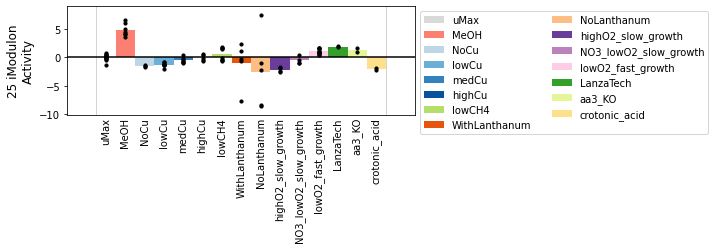

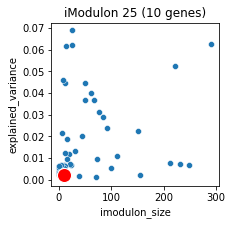

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
34        25     NaN  0.000015  0.005167        0.2  0.666667  0.307692  2.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
34              3.0           10.0  KEGG modules     M00701          NaN   

   module_name  
34         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00645     0.115183         NaN       134999     135115       1   
EQU24_RS01445     0.110299         NaN       300511     301249      -1   
EQU24_RS02055     0.252918         NaN       432512     434726       1   
EQU24_RS05785     0.106637         NaN      1251377    1252502      -1   
EQU24_RS08845    -0.131518         NaN      1961613    1962006      -1   
EQU24_RS12090     0.254498         NaN      2705890    2706091      -1   
EQU24_RS15150     0.235088         NaN      3384817    3385819       1   
EQU24_RS15155     0.235702         NaN      3386052    3387633       1   
EQU24_RS15160     0.175212         NaN      3387629    3389084       1   
EQU24_RS15165     0.117209         NaN      3389080    3390271       1   

                                                         product COG  \
EQU24_RS00645                                                NaN   X   
EQU24_RS01445                           ISAs1 family transposase   L   
EQU24_RS02055                            TonB-dependent receptor   P   
EQU24_RS05785                           ISAs1 family transposase   L   
EQU24_RS08845  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS12090                               hypothetical protein   X   
EQU24_RS15150                               hypothetical protein   X   
EQU24_RS15155  DHA2 family efflux MFS transporter permease su...   P   
EQU24_RS15160          efflux transporter outer membrane subunit   M   
EQU24_RS15165  HlyD family efflux transporter periplasmic ada...   V   

                                             cog_name     uniprot  tu_id  \
EQU24_RS00645                       No COG annotation         NaN    448   
EQU24_RS01445   Replication, recombination and repair         NaN   2631   
EQU24_RS02055  Inorganic ion transport and metabolism         NaN   2549   
EQU24_RS05785   Replication, recombination and repair  A0A4P9UJ90   2104   
EQU24_RS08845                        Function unknown  A0A4P9UME7   1710   
EQU24_RS12090                       No COG annotation         NaN   1313   
EQU24_RS15150                       No COG annotation  A0A4P9UPS4    916   
EQU24_RS15155  Inorganic ion transport and metabolism  A0A4P9USD2    915   
EQU24_RS15160  Cell wall/membrane/envelope biogenesis  A0A4P9USR8    915   
EQU24_RS15165                      Defense mechanisms  A0A4P9UPS3    915   

                                                       tu_name  \
EQU24_RS00645                                              rrf   
EQU24_RS01445                   EQU24_RS01450 // EQU24_RS01445   
EQU24_RS02055                                    EQU24_RS02055   
EQU24_RS05785                                    EQU24_RS05785   
EQU24_RS08845                   EQU24_RS08850 // EQU24_RS08845   
EQU24_RS12090                                    EQU24_RS12090   
EQU24_RS15150                                    EQU24_RS15150   
EQU24_RS15155  EQU24_RS15165 // EQU24_RS15160 // EQU24_RS15155   
EQU24_RS15160  EQU24_RS15165 // EQU24_RS15160 // EQU24_RS15155   
EQU24_RS15165  EQU24_RS15165 // EQU24_RS15160 // EQU24_RS15155   

                 ncbi_protein gene_name_extra  \
EQU24_RS00645             NaN              ||   
EQU24_RS01445             NaN              ||   
EQU24_RS02055  WP_235726409.1          ||None   
EQU24_RS05785  WP_017840837.1          ||None   
EQU24_RS08845  WP_017839127.1          ||None   
EQU24_RS12090  WP_235726384.1          ||None   
EQU24_RS15150  WP_017838693.1          ||None   
EQU24_RS15155  WP_017838692.1          ||None   
EQU24_RS15160  WP_017838691.1          ||None   
EQU24_RS15165  WP_017838690.1          ||None   

                                                  specific_gos_n  \
EQU24_RS00645                                                NaN   
EQU24_RS01445  DNA binding\ntransposase activity\ntranspositi...   
EQU24_RS02055  cell outer membrane\nintegral component of mem...   
EQU24_RS05785  DNA binding\ntra

In [78]:
imod_info(25)

In [79]:
ica_data.imodulon_table.loc[25,'function'] = 'up-in-MeOH/ton-B/some-transport_EW'


## iMod 26

iModulon 26


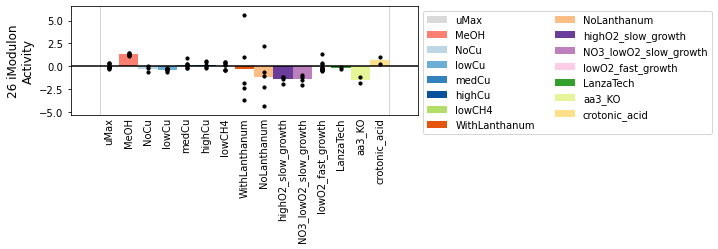

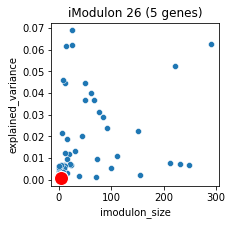

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00625    -0.227558         NaN       129668     131204       1   
EQU24_RS00645     0.343379         NaN       134999     135115       1   
EQU24_RS02055    -0.235391         NaN       432512     434726       1   
EQU24_RS12825     0.394495         NaN      2877647    2878040       1   
EQU24_RS21805     0.248792         NaN      4919710    4919809       1   

                                                         product COG  \
EQU24_RS00625                                                NaN   X   
EQU24_RS00645                                                NaN   X   
EQU24_RS02055                            TonB-dependent receptor   P   
EQU24_RS12825  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS21805                               hypothetical protein   X   

                                             cog_name     uniprot  tu_id  \
EQU24_RS00625                       No COG annotation         NaN   2744   
EQU24_RS00645                       No COG annotation         NaN    448   
EQU24_RS02055  Inorganic ion transport and metabolism         NaN   2549   
EQU24_RS12825                        Function unknown  A0A4P9UME7   1222   
EQU24_RS21805                       No COG annotation         NaN     44   

                                      tu_name    ncbi_protein gene_name_extra  \
EQU24_RS00625                   EQU24_RS00625             NaN              ||   
EQU24_RS00645                             rrf             NaN              ||   
EQU24_RS02055                   EQU24_RS02055  WP_235726409.1          ||None   
EQU24_RS12825  EQU24_RS12825 // EQU24_RS12820  WP_017839127.1          ||None   
EQU24_RS21805  EQU24_RS21810 // EQU24_RS21805             NaN              ||   

                                                  specific_gos_n  \
EQU24_RS00625                                                NaN   
EQU24_RS00645                                                NaN   
EQU24_RS02055  cell outer membrane\nintegral component of mem...   
EQU24_RS12825         regulation of transcription, DNA-templated   
EQU24_RS21805                                                NaN   

                                                    specific_gos  
EQU24_RS00625                                                 []  
EQU24_RS00645                                                 []  
EQU24_RS02055  ['cell outer membrane' 'integral component of ...  
EQU24_RS12825     ['regulation of transcription, DNA-templated']  
EQU24_RS21805                                                 []

In [80]:
imod_info(26)

In [81]:
ica_data.imodulon_table.loc[26,'function'] = 'small-unclear_EW'


## iMod 27

iModulon 27


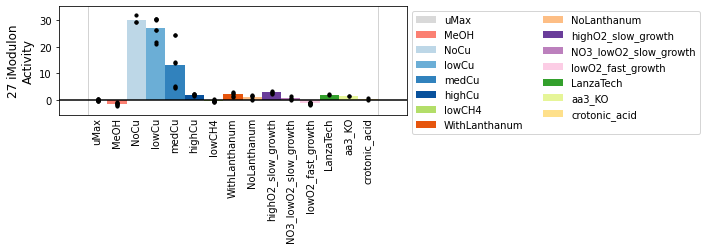

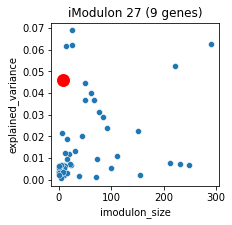

imodulon                                            go_name  \
119        27                          methane metabolic process   
120        27                     methane monooxygenase activity   
121        27                      methane monooxygenase complex   
35         27                                                NaN   
122        27                  cellular alkane metabolic process   
123        27  oxidoreductase activity, acting on paired dono...   
124        27                             monooxygenase activity   
26         27                                                NaN   
125        27  oxidoreductase activity, acting on paired dono...   
36         27                                                NaN   
30         27                                                NaN   
27         27                                                NaN   
126        27                                  catalytic complex   
28         27                                                NaN   
128        27                            oxidoreductase activity   
127        27                         protein-containing complex   
29         27                                                NaN   
31         27                                                NaN   

           pvalue        qvalue  precision    recall   f1score   TP  \
119  2.273876e-15  4.664857e-12   0.666667  0.600000  0.631579  6.0   
120  2.273876e-15  4.664857e-12   0.666667  0.600000  0.631579  6.0   
121  2.394179e-13  3.274439e-10   0.555556  0.714286  0.625000  5.0   
35   3.243692e-14  1.102855e-11   0.666667  0.428571  0.521739  6.0   
122  5.250514e-12  4.308571e-09   0.555556  0.454545  0.500000  5.0   
123  5.250514e-12  4.308571e-09   0.555556  0.454545  0.500000  5.0   
124  8.993743e-12  6.150221e-09   0.555556  0.416667  0.476190  5.0   
26   2.000284e-13  5.060719e-11   0.666667  0.333333  0.444444  6.0   
125  3.402018e-11  1.994069e-08   0.555556  0.333333  0.416667  5.0   
36   1.215885e-05  2.067004e-03   0.222222  0.666667  0.333333  2.0   
30   4.043970e-05  2.046249e-03   0.222222  0.400000  0.285714  2.0   
27   2.463470e-09  3.116289e-07   0.666667  0.077922  0.139535  6.0   
126  1.514586e-07  7.767932e-05   0.555556  0.069444  0.123457  5.0   
28   1.064813e-07  8.979925e-06   0.666667  0.041958  0.078947  6.0   
128  1.359675e-05  5.578746e-03   0.555556  0.028249  0.053763  5.0   
127  1.218129e-06  5.553317e-04   0.666667  0.027907  0.053571  6.0   
29   6.698783e-06  4.236980e-04   0.666667  0.020906  0.040541  6.0   
31   1.376693e-03  5.805056e-02   0.666667  0.008230  0.016260  6.0   

     target_set_size  imodulon_size         source annotation  \
119             10.0            9.0             GO        NaN   
120             10.0            9.0             GO        NaN   
121              7.0            9.0             GO        NaN   
35              14.0            9.0   KEGG modules     M00174   
122             11.0            9.0             GO        NaN   
123             11.0            9.0             GO        NaN   
124             12.0            9.0             GO        NaN   
26              18.0            9.0  KEGG pathways   map01220   
125             15.0            9.0             GO        NaN   
36               3.0            9.0   KEGG modules     M00538   
30               5.0            9.0  KEGG pathways   map00623   
27              77.0            9.0  KEGG pathways   map00680   
126             72.0            9.0             GO        NaN   
28             143.0            9.0  KEGG pathways   map01200   
128            177.0            9.0             GO        NaN   
127            215.0            9.0             GO        NaN   
29             287.0            9.0  KEGG pathways   map01120   
31             729.0            9.0  KEGG pathways   map01100   

                                     pathway_name  \
119                                           NaN   
120                 

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS05885     0.292492        mmoX      1283573    1285151       1   
EQU24_RS05890     0.279119        mmoY      1285264    1286443       1   
EQU24_RS05895     0.280801        mmoB      1286453    1286879       1   
EQU24_RS05900     0.274999        mmoZ      1286888    1287392       1   
EQU24_RS05905     0.254309        mmoD      1287718    1287934       1   
EQU24_RS05910     0.247364        mmoC      1287957    1288995       1   
EQU24_RS05915     0.221199         NaN      1289471    1289897       1   
EQU24_RS05920     0.237892         NaN      1290051    1290351       1   
EQU24_RS05925     0.238048        mmoG      1290558    1292238       1   

                                                         product COG  \
EQU24_RS05885                              methane monooxygenase   H   
EQU24_RS05890                              methane monooxygenase   H   
EQU24_RS05895                              methane monooxygenase   C   
EQU24_RS05900                               hypothetical protein   H   
EQU24_RS05905  soluble methane monooxygenase-binding protein ...   X   
EQU24_RS05910  2Fe-2S iron-sulfur cluster binding domain-cont...   C   
EQU24_RS05915                     BLUF domain-containing protein   S   
EQU24_RS05920                               hypothetical protein   X   
EQU24_RS05925                          likely chaperone for smmo   O   

                                                        cog_name  \
EQU24_RS05885                  Coenzyme transport and metabolism   
EQU24_RS05890                  Coenzyme transport and metabolism   
EQU24_RS05895                   Energy production and conversion   
EQU24_RS05900                  Coenzyme transport and metabolism   
EQU24_RS05905                                  No COG annotation   
EQU24_RS05910                   Energy production and conversion   
EQU24_RS05915                                   Function unknown   
EQU24_RS05920                                  No COG annotation   
EQU24_RS05925  Post-translational modification, protein turno...   

                     uniprot  tu_id  \
EQU24_RS05885     A0A4P9UNN3   2088   
EQU24_RS05890     A0A4P9UKQ6   2087   
EQU24_RS05895     A0A4P9UMZ7   2087   
EQU24_RS05900     A0A4P9UKU7   2087   
EQU24_RS05905  UPI0003479E2D   2086   
EQU24_RS05910     A0A4V1IJL6   2086   
EQU24_RS05915            NaN   2085   
EQU24_RS05920     A0A4P9UL60   2084   
EQU24_RS05925     A0A4P9UKZ6   2083   

                                                       tu_name  \
EQU24_RS05885                                    EQU24_RS05885   
EQU24_RS05890  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05895  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05900  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05905                            EQU24_RS05910 // mmoD   
EQU24_RS05910                            EQU24_RS05910 // mmoD   
EQU24_RS05915                                    EQU24_RS05915   
EQU24_RS05920                                    EQU24_RS05920   
EQU24_RS05925                                    EQU24_RS05925   

                 ncbi_protein gene_name_extra  \
EQU24_RS05885  WP_017840379.1          ||None   
EQU24_RS05890  WP_017840378.1          ||None   
EQU24_RS05895  WP_017840377.1          ||None   
EQU24_RS05900  WP_017840376.1          ||None   
EQU24_RS05905  WP_201764852.1      mmoD||mmoD   
EQU24_RS05910  WP_017840374.1          ||None   
EQU24_RS05915  WP_235726398.1          ||None   
EQU24_RS05920  WP_017840372.1          ||None   
EQU24_RS05925  WP_017840371.1         ||groEL   

                                                  specific_gos_n  \
EQU24_RS05885  methane monooxygenase activity\nmethane metabo...   
EQU24_RS05890  methane monooxygenase activity\nmethane monoox...   
EQU24_RS05895  methane monooxygenase activity\nmethane monoox...   
EQU24_RS05900  methane monooxygenase activity\nmethane me

In [82]:
imod_info(27)

In [156]:
ica_data.view_imodulon(27)[['gene_weight','gene_symbol','product','cog_name']]

gene_weight gene_symbol  \
EQU24_RS05885     0.292492        mmoX   
EQU24_RS05890     0.279119        mmoY   
EQU24_RS05895     0.280801        mmoB   
EQU24_RS05900     0.274999        mmoZ   
EQU24_RS05905     0.254309        mmoD   
EQU24_RS05910     0.247364        mmoC   
EQU24_RS05915     0.221199               
EQU24_RS05920     0.237892               
EQU24_RS05925     0.238048        mmoG   

                                                         product  \
EQU24_RS05885                              methane monooxygenase   
EQU24_RS05890                              methane monooxygenase   
EQU24_RS05895                              methane monooxygenase   
EQU24_RS05900                               hypothetical protein   
EQU24_RS05905  soluble methane monooxygenase-binding protein ...   
EQU24_RS05910  2Fe-2S iron-sulfur cluster binding domain-cont...   
EQU24_RS05915                     BLUF domain-containing protein   
EQU24_RS05920                               hypothetical protein   
EQU24_RS05925                          likely chaperone for smmo   

                                                        cog_name  
EQU24_RS05885                  Coenzyme transport and metabolism  
EQU24_RS05890                  Coenzyme transport and metabolism  
EQU24_RS05895                   Energy production and conversion  
EQU24_RS05900                  Coenzyme transport and metabolism  
EQU24_RS05905                                  No COG annotation  
EQU24_RS05910                   Energy production and conversion  
EQU24_RS05915                                   Function unknown  
EQU24_RS05920                                  No COG annotation  
EQU24_RS05925  Post-translational modification, protein turno...

In [83]:
ica_data.imodulon_table.loc[27,'function'] = 'smmo-cluster_EW'
ica_data.imodulon_table.loc[27,'category'] = 'functional'


## iMod 28

iModulon 28


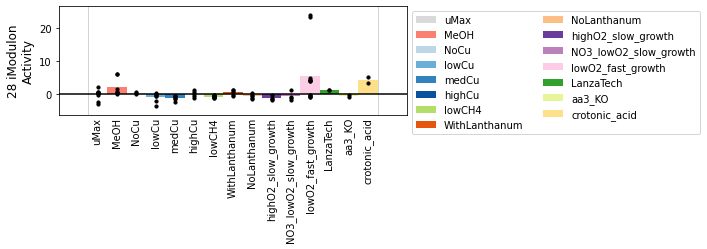

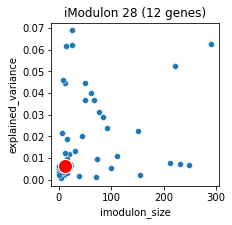

imodulon go_name        pvalue   qvalue  precision  recall   f1score   TP  \
37        28     NaN  1.760820e-07  0.00006       0.25     0.6  0.352941  3.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
37              5.0           12.0  KEGG modules     M00240          NaN   

   module_name  
37         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS19155     0.154038         NaN      4282467    4283163       1   
EQU24_RS19160     0.171308         NaN      4283255    4285490      -1   
EQU24_RS20545     0.172808         NaN      4632179    4633250      -1   
EQU24_RS20550     0.224846         NaN      4633246    4634119      -1   
EQU24_RS20555     0.249716         NaN      4634454    4635003      -1   
EQU24_RS20560     0.248301         NaN      4635443    4636508      -1   
EQU24_RS20565     0.238904         NaN      4636447    4636726      -1   
EQU24_RS20570     0.176141         NaN      4636915    4637191       1   
EQU24_RS20575     0.264525         NaN      4637283    4639062      -1   
EQU24_RS20580     0.146934         NaN      4639230    4639488      -1   
EQU24_RS20585     0.237340         NaN      4639491    4641747      -1   
EQU24_RS20590     0.230694         NaN      4641915    4642194      -1   

                                                         product COG  \
EQU24_RS19155                  DUF2182 domain-containing protein   S   
EQU24_RS19160                            TonB-dependent receptor   P   
EQU24_RS20545  iron chelate uptake ABC transporter family per...   P   
EQU24_RS20550    hemin ABC transporter substrate-binding protein   P   
EQU24_RS20555                  pyridoxamine 5'-phosphate oxidase   P   
EQU24_RS20560                               hypothetical protein   P   
EQU24_RS20565                               hypothetical protein   X   
EQU24_RS20570                               hypothetical protein   X   
EQU24_RS20575                               hypothetical protein   G   
EQU24_RS20580                               hypothetical protein   X   
EQU24_RS20585  TonB-dependent hemoglobin/transferrin/lactofer...   P   
EQU24_RS20590                               hypothetical protein   X   

                                             cog_name        uniprot  tu_id  \
EQU24_RS19155                        Function unknown  UPI000A2F3717    407   
EQU24_RS19160  Inorganic ion transport and metabolism            NaN    406   
EQU24_RS20545  Inorganic ion transport and metabolism  UPI0003474247    222   
EQU24_RS20550  Inorganic ion transport and metabolism     A0A4P9US51    222   
EQU24_RS20555  Inorganic ion transport and metabolism     A0A4P9UUR5    221   
EQU24_RS20560  Inorganic ion transport and metabolism  UPI0003470AB8    220   
EQU24_RS20565                       No COG annotation     A0A4V1IKB8    220   
EQU24_RS20570                       No COG annotation            NaN    219   
EQU24_RS20575   Carbohydrate transport and metabolism     A0A4P9USE5    218   
EQU24_RS20580                       No COG annotation  UPI00191C2B5C    217   
EQU24_RS20585  Inorganic ion transport and metabolism            NaN    217   
EQU24_RS20590                       No COG annotation     A0A4P9US62    216   

                                                       tu_name  \
EQU24_RS19155                                    EQU24_RS19155   
EQU24_RS19160                                    EQU24_RS19160   
EQU24_RS20545  EQU24_RS20550 // EQU24_RS20545 // EQU24_RS20540   
EQU24_RS20550  EQU24_RS20550 // EQU24_RS20545 // EQU24_RS20540   
EQU24_RS20555                                    EQU24_RS20555   
EQU24_RS20560                   EQU24_RS20565 // EQU24_RS20560   
EQU24_RS20565                   EQU24_RS20565 // EQU24_RS20560   
EQU24_RS20570                                    EQU24_RS20570   
EQU24_RS20575                                    EQU24_RS20575   
EQU24_RS20580                   EQU24_RS20585 // EQU24_RS20580   
EQU24_RS20585                   EQU24_RS20585 // EQU24_RS20580   
EQU24_RS20590                                    EQU24_RS20590   

                 ncbi_protein gene_name_extra  \
EQU24_RS19155  WP_085986406.1          ||None   
EQU24_RS19160  WP_017842024.1          ||None   
EQU24_RS20545  WP_138767248.1          ||None   
EQU24_RS20550  WP_017841761.1   

In [84]:
imod_info(28)

In [86]:
ica_data.imodulon_table.loc[28,'function'] = 'ion-transport/outlier-repsonse-FM11_EW'


## iMod 29

iModulon 29


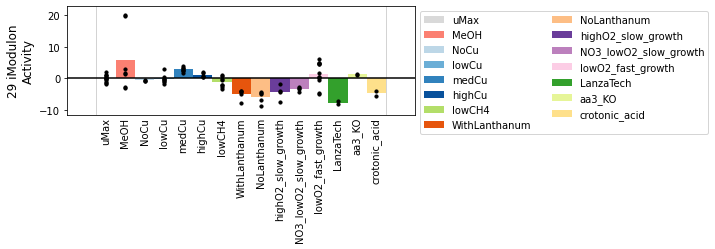

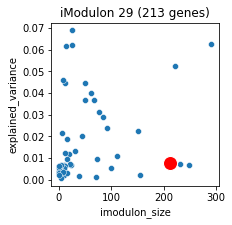

imodulon                                go_name    pvalue    qvalue  \
129        29        sulfate transmembrane transport  0.000003  0.011323   
130        29  ABC-type sulfate transporter activity  0.000006  0.013048   
38         29                                    NaN  0.000006  0.002162   

     precision  recall   f1score   TP  target_set_size  imodulon_size  \
129   0.028169     0.6  0.053812  6.0             10.0          213.0   
130   0.018779     1.0  0.036866  4.0              4.0          213.0   
38    0.018779     1.0  0.036866  4.0              4.0          213.0   

           source annotation pathway_name module_name  
129            GO        NaN          NaN         NaN  
130            GO        NaN          NaN         NaN  
38   KEGG modules     M00185          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00105    -0.031130         crp        24340      24994      -1   
EQU24_RS00145    -0.035153         NaN        34142      34445      -1   
EQU24_RS00190     0.038314         NaN        42656      42884      -1   
EQU24_RS00195     0.033967         NaN        42874      43876      -1   
EQU24_RS00205     0.049202         NaN        44526      46077      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21750    -0.057395         NaN      4904690    4905464      -1   
EQU24_RS21760    -0.037305         NaN      4906513    4907704       1   
EQU24_RS21865     0.032338         NaN      4931344    4931812       1   
EQU24_RS21910    -0.033401         NaN      4942188    4943358      -1   
EQU24_RS21965    -0.032871        hflB      4955491    4957390       1   

                                                         product COG  \
EQU24_RS00105  cAMP-activated global transcriptional regulato...   K   
EQU24_RS00145                               hypothetical protein   J   
EQU24_RS00190                               hypothetical protein   X   
EQU24_RS00195                  DUF4338 domain-containing protein   L   
EQU24_RS00205                            IS66 family transposase   L   
...                                                          ...  ..   
EQU24_RS21750                  DUF3450 domain-containing protein   D   
EQU24_RS21760                                     amidohydrolase   S   
EQU24_RS21865  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS21910       MotA/TolQ/ExbB proton channel family protein   U   
EQU24_RS21965            ATP-dependent zinc metalloprotease FtsH   O   

                                                        cog_name  \
EQU24_RS00105                                      Transcription   
EQU24_RS00145    Translation, ribosomal structure and biogenesis   
EQU24_RS00190                                  No COG annotation   
EQU24_RS00195              Replication, recombination and repair   
EQU24_RS00205              Replication, recombination and repair   
...                                                          ...   
EQU24_RS21750  Cell cycle control, cell division, chromosome ...   
EQU24_RS21760                                   Function unknown   
EQU24_RS21865                                   Function unknown   
EQU24_RS21910  Intracellular trafficking, secretion, and vesi...   
EQU24_RS21965  Post-translational modification, protein turno...   

                     uniprot  tu_id  \
EQU24_RS00105     A0A4P9UID5   2818   
EQU24_RS00145     A0A4P9UL47   2812   
EQU24_RS00190  UPI00110D139D   2805   
EQU24_RS00195            NaN   2805   
EQU24_RS00205            NaN   2803   
...                      ...    ...   
EQU24_RS21750     A0A4P9UXK0     50   
EQU24_RS21760     A0A4P9USQ2     48   
EQU24_RS21865     A0A4P9USZ2     39   
EQU24_RS21910            NaN     33   
EQU24_RS21965     A0A4P9UXN7     25   

                                                         tu_name  \
EQU24_RS00105                               crp // EQU24_RS00100   
EQU24_RS00145    EQU24_RS00155 // EQU24_RS00150 // EQU24_RS00145   
EQU24_RS00190                     EQU24_RS00195 // EQU24_RS00190   
EQU24_RS00195                     EQU24_RS00195 // EQU24_RS00190   
EQU24_RS00205                                      EQU24_RS00205   
...                                                          ...   
EQU24_RS21750  EQU24_RS21750 // EQU24_RS21745 // EQU24_RS2174...   
EQU24_RS21760                                      EQU24_RS21760   
EQU24_RS21865    EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860   
EQU24_RS21910    EQU24_RS21915 // EQU24_RS21910 // EQU24_RS21905   
EQU24_RS21965                               hflB // hflC // hflK   

                 ncbi_protein gene_name_extra  \
EQU24_RS00105  WP_014146545.1        crp||crp   
EQU24_RS00145  WP_014146553.1          ||None   
EQU24_RS001

In [87]:
imod_info(29)

In [88]:
ica_data.imodulon_table.loc[29,'function'] = 'sulfate-transport/messy-threshold_EW'


## iMod 30

iModulon 30


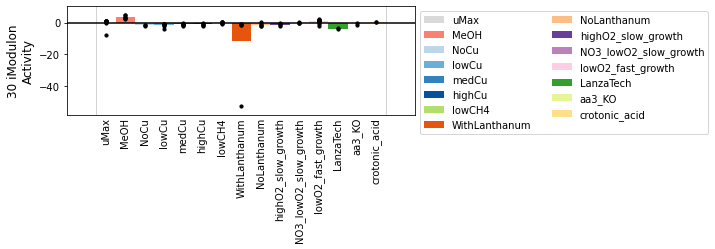

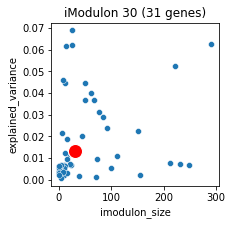

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00195     0.131209         NaN        42874      43876      -1   
EQU24_RS01125     0.153444         NaN       229960     230614       1   
EQU24_RS01155     0.174360         NaN       234648     234873       1   
EQU24_RS01170     0.124928         NaN       235812     237102      -1   
EQU24_RS01175     0.098641        umuD       237101     237485      -1   
EQU24_RS01260     0.163973         NaN       254824     255316       1   
EQU24_RS01555     0.100169         NaN       328948     329197       1   
EQU24_RS01765    -0.094462         NaN       371879     372134      -1   
EQU24_RS05305     0.145654         NaN      1129473    1129971      -1   
EQU24_RS05435     0.128836         NaN      1166485    1167229       1   
EQU24_RS06145     0.161783         NaN      1339211    1339394      -1   
EQU24_RS06210     0.150400         NaN      1353125    1353620      -1   
EQU24_RS06295     0.168287         NaN      1377360    1377993       1   
EQU24_RS08460     0.103104        urtC      1867805    1869074       1   
EQU24_RS10700     0.187673         NaN      2380001    2380250      -1   
EQU24_RS10730     0.164085         NaN      2384250    2384430      -1   
EQU24_RS10945     0.130420         NaN      2443373    2443643      -1   
EQU24_RS11985     0.126076         NaN      2680417    2680867      -1   
EQU24_RS11990     0.103691         NaN      2680903    2681857      -1   
EQU24_RS12110     0.192468         NaN      2710670    2710937      -1   
EQU24_RS12125     0.140319        cas2      2711887    2712196      -1   
EQU24_RS12130     0.118575         NaN      2712195    2712942      -1   
EQU24_RS14755    -0.082999         NaN      3300040    3300526      -1   
EQU24_RS16540     0.141771         NaN      3711352    3712267      -1   
EQU24_RS16545     0.133509         NaN      3712414    3713431      -1   
EQU24_RS16555     0.142746         NaN      3714628    3714988      -1   
EQU24_RS17215     0.152180         NaN      3862286    3863567      -1   
EQU24_RS17310     0.126024         NaN      3881819    3882266      -1   
EQU24_RS18145     0.142872        mxaB      4045188    4045845       1   
EQU24_RS20235     0.161964         NaN      4566875    4567184       1   
EQU24_RS20510     0.095094         NaN      4626446    4626638      -1   

                                                         product COG  \
EQU24_RS00195                  DUF4338 domain-containing protein   L   
EQU24_RS01125                               hypothetical protein   X   
EQU24_RS01155                               hypothetical protein   X   
EQU24_RS01170                            Y-family DNA polymerase   L   
EQU24_RS01175  translesion error-prone DNA polymerase V autop...   K   
EQU24_RS01260                               hypothetical protein   X   
EQU24_RS01555                               hypothetical protein   X   
EQU24_RS01765                   DUF504 domain-containing protein   A   
EQU24_RS05305  bifunctional adenosylcobinamide kinase/adenosy...   H   
EQU24_RS05435                               hypothetical protein   D   
EQU24_RS06145                               hypothetical protein   X   
EQU24_RS06210                               hypothetical protein   L   
EQU24_RS06295                      HTH domain-containing protein   K   
EQU24_RS08460         urea ABC transporter permease subunit UrtC   E   
EQU24_RS10700                               hypothetical protein   X   
EQU24_RS10730                               hypothetical protein   S   
EQU24_RS10945                                   membrane protein   T   
EQU24_RS11985                               hypothetical protein   Q   
EQU24_RS11990                          IS1595 family transposase   L   
EQU24_RS12110                    GIY-YIG nuclease family protein   L   
EQU24_RS12125                CRISPR-associated endonuclease Cas2   L   
EQU24_RS12130                               hypothetical prote

In [89]:
imod_info(30)

In [90]:
ica_data.imodulon_table.loc[30,'function'] = 'unclear/outlier-response-wLa-vial_EW'


## iMod 31

iModulon 31


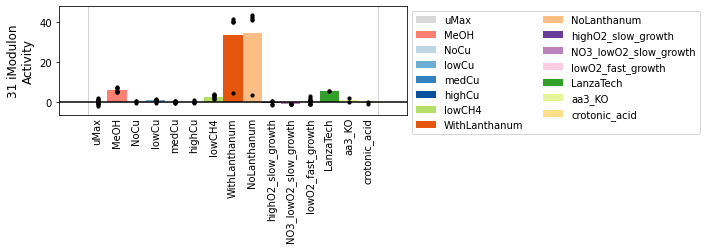

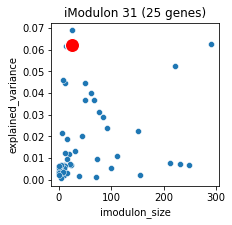

imodulon                      go_name        pvalue    qvalue  precision  \
131        31         transposase activity  6.809840e-07  0.001721       0.24   
132        31  transposition, DNA-mediated  8.389711e-07  0.001721       0.24   

       recall   f1score   TP  target_set_size  imodulon_size source  \
131  0.105263  0.146341  6.0             57.0           25.0     GO   
132  0.101695  0.142857  6.0             59.0           25.0     GO   

    annotation pathway_name module_name  
131        NaN          NaN         NaN  
132        NaN          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01450     0.204594         NaN       301239     302325      -1   
EQU24_RS03465     0.101896         NaN       736966     738091       1   
EQU24_RS03770    -0.083572         NaN       808572     808647       1   
EQU24_RS03790    -0.098541         NaN       810562     810636       1   
EQU24_RS03795    -0.094116         NaN       810653     810729       1   
EQU24_RS04130     0.099535        ltrA       867295     868546       1   
EQU24_RS04160    -0.101848         NaN       874502     874683      -1   
EQU24_RS05635    -0.108667         NaN      1220732    1220808       1   
EQU24_RS06860     0.113260         NaN      1509221    1510547      -1   
EQU24_RS07485     0.123577         NaN      1650361    1651912      -1   
EQU24_RS08850     0.174809         NaN      1962015    1962198      -1   
EQU24_RS09830    -0.107268         NaN      2185247    2185322       1   
EQU24_RS11115     0.229038         NaN      2482070    2483246      -1   
EQU24_RS11380     0.105568         NaN      2544803    2546354       1   
EQU24_RS12805     0.114362         NaN      2872306    2873593       1   
EQU24_RS12820     0.185661         NaN      2877455    2877638       1   
EQU24_RS15090    -0.148612         NaN      3372700    3372777      -1   
EQU24_RS15095    -0.164265         NaN      3372785    3372861      -1   
EQU24_RS16985     0.139769         NaN      3813547    3814873      -1   
EQU24_RS17700     0.145043         NaN      3952860    3954411      -1   
EQU24_RS17885     0.130592         NaN      4000101    4001427       1   
EQU24_RS18550    -0.102504         NaN      4142937    4143014      -1   
EQU24_RS18555    -0.098145         NaN      4143018    4143095      -1   
EQU24_RS19045     0.134044         NaN      4262040    4263239      -1   
EQU24_RS20615     0.082081         NaN      4647272    4648358      -1   

                                                        product COG  \
EQU24_RS01450                 DUF4338 domain-containing protein   L   
EQU24_RS03465                          ISAs1 family transposase   L   
EQU24_RS03770                                               NaN   X   
EQU24_RS03790                                               NaN   X   
EQU24_RS03795                                               NaN   X   
EQU24_RS04130    group II intron reverse transcriptase/maturase   L   
EQU24_RS04160                                               NaN   X   
EQU24_RS05635                                               NaN   X   
EQU24_RS06860                          IS110 family transposase   L   
EQU24_RS07485                           IS66 family transposase   L   
EQU24_RS08850  type II toxin-antitoxin system HicA family toxin   N   
EQU24_RS09830                                               NaN   X   
EQU24_RS11115                                       transposase   L   
EQU24_RS11380                           IS66 family transposase   L   
EQU24_RS12805                            IS4 family transposase   L   
EQU24_RS12820  type II toxin-antitoxin system HicA family toxin   N   
EQU24_RS15090                                               NaN   X   
EQU24_RS15095                                               NaN   X   
EQU24_RS16985                          IS110 family transposase   L   
EQU24_RS17700                           IS66 family transposase   L   
EQU24_RS17885                          IS110 family transposase   L   
EQU24_RS18550                                               NaN   X   
EQU24_RS18555                                               NaN   X   
EQU24_RS19045                            IS3 family transposase   L   
EQU24_RS20615                 DUF4338 domain-containing protein   L   

                                            cog_name        uniprot  tu_id  \
EQU24_RS01450  Replication, recombination and repair            NaN   2631   
EQU24_RS03465  Replication, recombination and repair     A0A4P9UJ90   2373   
EQU24_RS0

In [91]:
imod_info(31)

In [92]:
ica_data.imodulon_table.loc[31,'function'] = 'transposase/toxin-anti-toxin_EW'


## iMod 32

iModulon 32


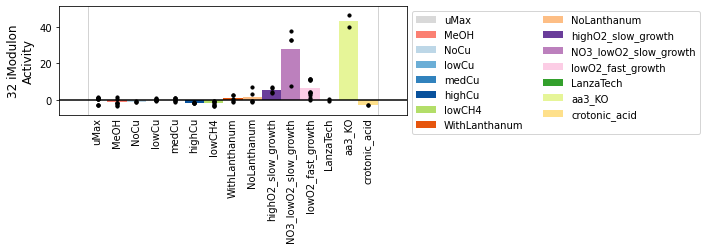

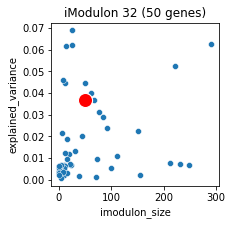

imodulon                                go_name        pvalue  \
133        32                      nitrogen fixation  1.681522e-24   
134        32               electron transport chain  8.672537e-11   
135        32                   nitrogenase activity  1.920158e-10   
137        32             electron transfer activity  4.902316e-08   
136        32  carbonyl sulfide nitrogenase activity  1.756944e-08   
138        32            iron-sulfur cluster binding  2.829416e-06   
39         32                                    NaN  1.573774e-06   
32         32                                    NaN  8.450568e-05   
139        32    molybdenum-iron nitrogenase complex  1.380658e-04   

           qvalue  precision    recall   f1score    TP  target_set_size  \
133  6.899287e-21       0.28  0.736842  0.405797  14.0             19.0   
134  1.779171e-07       0.24  0.146341  0.181818  12.0             82.0   
135  2.626136e-07       0.10  1.000000  0.181818   5.0              5.0   
137  4.022841e-05       0.18  0.136364  0.155172   9.0             66.0   
136  1.802186e-05       0.08  1.000000  0.148148   4.0              4.0   
138  1.934849e-03       0.14  0.127273  0.133333   7.0             55.0   
39   5.350830e-04       0.06  1.000000  0.113208   3.0              3.0   
32   2.137994e-02       0.06  0.375000  0.103448   3.0              8.0   
139  8.092631e-02       0.04  1.000000  0.076923   2.0              2.0   

     imodulon_size         source annotation  \
133           50.0             GO        NaN   
134           50.0             GO        NaN   
135           50.0             GO        NaN   
137           50.0             GO        NaN   
136           50.0             GO        NaN   
138           50.0             GO        NaN   
39            50.0   KEGG modules     M00175   
32            50.0  KEGG pathways   map00625   
139           50.0             GO        NaN   

                                  pathway_name  \
133                                        NaN   
134                                        NaN   
135                                        NaN   
137                                        NaN   
136                                        NaN   
138                                        NaN   
39                                         NaN   
32   Chloroalkane and chloroalkene degradation   
139                                        NaN   

                                module_name  
133                                     NaN  
134                                     NaN  
135                                     NaN  
137                                     NaN  
136                                     NaN  
138                                     NaN  
39   Nitrogen fixation, nitrogen => ammonia  
32                                      NaN  
139                                     NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS17060     0.103206         NaN      3835643    3836495      -1   
EQU24_RS17065     0.176078        nifH      3837050    3837932       1   
EQU24_RS17070     0.177886        nifD      3838069    3839548       1   
EQU24_RS17075     0.171482        nifK      3839690    3841262       1   
EQU24_RS17080     0.157375        nifT      3841334    3841547       1   
EQU24_RS17085     0.170006         NaN      3841557    3841758       1   
EQU24_RS17090     0.149730         NaN      3841761    3842028       1   
EQU24_RS17095     0.126834         NaN      3842037    3842802       1   
EQU24_RS17100     0.106151         NaN      3842794    3843757       1   
EQU24_RS17115     0.105644         NaN      3846258    3846792      -1   
EQU24_RS17120     0.107814        grxD      3846802    3847423      -1   
EQU24_RS17125     0.097072        clpX      3847727    3849020      -1   
EQU24_RS17130     0.123547        nifM      3849413    3850268      -1   
EQU24_RS17135     0.124806         NaN      3850269    3850749      -1   
EQU24_RS17140     0.125305         NaN      3850745    3851060      -1   
EQU24_RS17145     0.140778        fdxB      3851204    3851522      -1   
EQU24_RS17150     0.135062         NaN      3851530    3851746      -1   
EQU24_RS17155     0.139222         NaN      3851756    3852230      -1   
EQU24_RS17160     0.141940         NaN      3852329    3852761      -1   
EQU24_RS17165     0.109952        nifN      3852817    3854203      -1   
EQU24_RS17170     0.112044        nifE      3854208    3855657      -1   
EQU24_RS17200     0.148392         NaN      3860895    3861501      -1   
EQU24_RS17205     0.157391         NaN      3861500    3861851      -1   
EQU24_RS17210     0.143486         NaN      3861870    3862158      -1   
EQU24_RS17215     0.144719         NaN      3862286    3863567      -1   
EQU24_RS17220     0.134749         NaN      3863563    3863989      -1   
EQU24_RS17225     0.139391         NaN      3864054    3864333      -1   
EQU24_RS17230     0.158208        nifB      3864394    3865885      -1   
EQU24_RS17235     0.094671         NaN      3866164    3866425      -1   
EQU24_RS17240     0.107685         NaN      3866435    3867125      -1   
EQU24_RS17245     0.093008        rsxG      3867302    3867923      -1   
EQU24_RS17250     0.137429         NaN      3868174    3869257      -1   
EQU24_RS17255     0.142749        rsxC      3869607    3871083      -1   
EQU24_RS17260     0.136323         NaN      3871079    3871631      -1   
EQU24_RS17265     0.137120        rsxA      3871650    3872223      -1   
EQU24_RS17270     0.091198        nifL      3872605    3874195       1   
EQU24_RS17275     0.080001        nifA      3874198    3875725       1   
EQU24_RS17285     0.110021        draG      3877222    3878107       1   
EQU24_RS17290     0.132886         NaN      3878149    3878857      -1   
EQU24_RS17295     0.135723         NaN      3878869    3879187      -1   
EQU24_RS17300     0.139518         NaN      3879188    3879758      -1   
EQU24_RS17315     0.100768         NaN      3882262    3883237      -1   
EQU24_RS17325     0.143509         NaN      3883622    3884123      -1   
EQU24_RS17335     0.136853         NaN      3884556    3885057      -1   
EQU24_RS17340     0.147340        cysE      3885056    3885806      -1   
EQU24_RS17345     0.132125        nifV      3885966    3887091      -1   
EQU24_RS17405     0.098503        nifS      3895063    3896272      -1   
EQU24_RS17410     0.134176        nifU      3896274    3897171      -1   
EQU24_RS17415     0.130798         NaN      3897189    3897546      -1   
EQU24_RS17420     0.092173         NaN      3897740    3897995       1   

                                                         product COG  \
EQU24_RS17060                               hypothetical protein   S   
EQU24_RS17065                           nitrogenase iron protein   P   
EQU24_RS17070    nitroge

In [93]:
imod_info(32)

In [94]:
ica_data.imodulon_table.loc[32,'category'] = 'functional'
ica_data.imodulon_table.loc[32,'function'] = 'nif/electron-transport_EW'


## iMod 33

iModulon 33


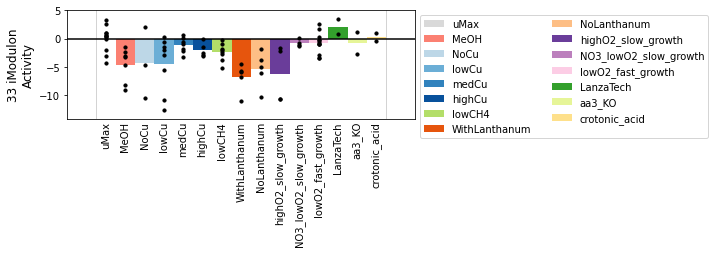

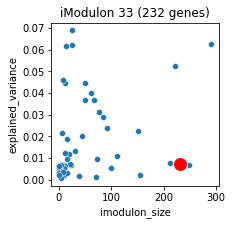

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00030    -0.032406         NaN         7098       7257       1   
EQU24_RS00085     0.071302         NaN        21633      22416       1   
EQU24_RS00190     0.031371         NaN        42656      42884      -1   
EQU24_RS00330    -0.037960         NaN        71976      73314       1   
EQU24_RS00335    -0.075980         NaN        73303      74293       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20990     0.037386         NaN      4725051    4725498       1   
EQU24_RS21805    -0.065179         NaN      4919710    4919809       1   
EQU24_RS21830    -0.036989         NaN      4922554    4924318       1   
EQU24_RS22130     0.036103         NaN      4994558    4994648      -1   
EQU24_RS22145    -0.032235        yidD      4997998    4998220      -1   

                                                         product COG  \
EQU24_RS00030                  DUF2283 domain-containing protein   S   
EQU24_RS00085          prolipoprotein diacylglyceryl transferase   M   
EQU24_RS00190                               hypothetical protein   X   
EQU24_RS00330                                           flippase   S   
EQU24_RS00335                               hypothetical protein   X   
...                                                          ...  ..   
EQU24_RS20990                  Rsd/AlgQ family anti-sigma factor   K   
EQU24_RS21805                               hypothetical protein   X   
EQU24_RS21830                   DUF262 domain-containing protein   S   
EQU24_RS22130                                                NaN   X   
EQU24_RS22145  membrane protein insertion efficiency factor YidD   S   

                                             cog_name        uniprot  tu_id  \
EQU24_RS00030                        Function unknown            NaN   2827   
EQU24_RS00085  Cell wall/membrane/envelope biogenesis     A0A4P9UK00   2820   
EQU24_RS00190                       No COG annotation  UPI00110D139D   2805   
EQU24_RS00330                        Function unknown  UPI001AD8D761   2783   
EQU24_RS00335                       No COG annotation     A0A4P9UIH1   2783   
...                                               ...            ...    ...   
EQU24_RS20990                           Transcription  UPI000347E4E3    153   
EQU24_RS21805                       No COG annotation            NaN     44   
EQU24_RS21830                        Function unknown     A0A4P9UVU1     43   
EQU24_RS22130                       No COG annotation            NaN      2   
EQU24_RS22145                        Function unknown  UPI000A004C04      1   

                                                         tu_name  \
EQU24_RS00030                     EQU24_RS00030 // EQU24_RS00025   
EQU24_RS00085                              thyA // EQU24_RS00085   
EQU24_RS00190                     EQU24_RS00195 // EQU24_RS00190   
EQU24_RS00330  EQU24_RS00345 // EQU24_RS00340 // EQU24_RS0033...   
EQU24_RS00335  EQU24_RS00345 // EQU24_RS00340 // EQU24_RS0033...   
...                                                          ...   
EQU24_RS20990                                      EQU24_RS20990   
EQU24_RS21805                     EQU24_RS21810 // EQU24_RS21805   
EQU24_RS21830  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS22130                                      EQU24_RS22130   
EQU24_RS22145               rpmH // rnpA // yidD // yidC // mnmE   

                 ncbi_protein gene_name_extra  \
EQU24_RS00030             NaN              ||   
EQU24_RS00085  WP_017841459.1           ||lgt   
EQU24_RS00190  WP_138767047.1          ||None   
EQU24_RS00330  WP_209005075.1          ||None   
EQU24_RS00335  WP_017841417.1          ||None   
...                       ...             ...   
EQU24_RS20990  WP_026130281.1          ||None   
EQU24_RS21805             NaN              ||   
EQU24_RS21830  WP_017841536.1          ||None   
EQU24

In [95]:
imod_info(33)

In [96]:
ica_data.imodulon_table.loc[33,'function'] = 'large-unclear_EW'


## iMod 34

iModulon SG_3


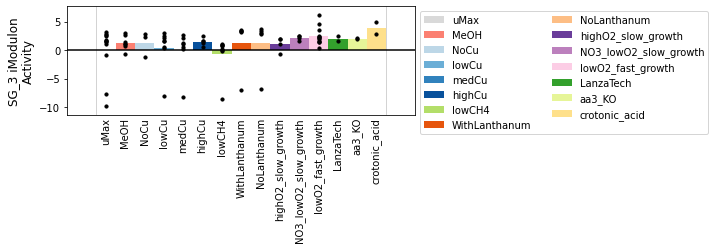

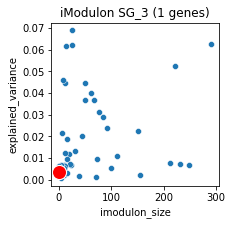

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS20580     0.709511         NaN      4639230    4639488      -1   

                            product COG           cog_name        uniprot  \
EQU24_RS20580  hypothetical protein   X  No COG annotation  UPI00191C2B5C   

               tu_id                         tu_name    ncbi_protein  \
EQU24_RS20580    217  EQU24_RS20585 // EQU24_RS20580  WP_201764870.1   

              gene_name_extra specific_gos_n specific_gos  
EQU24_RS20580          ||None            NaN           []

In [98]:
imod_info("SG_3")

In [99]:
ica_data.imodulon_table.loc["SG_3",'function'] = 'SG-hypothetical_EW'


## iMod 35

iModulon 35


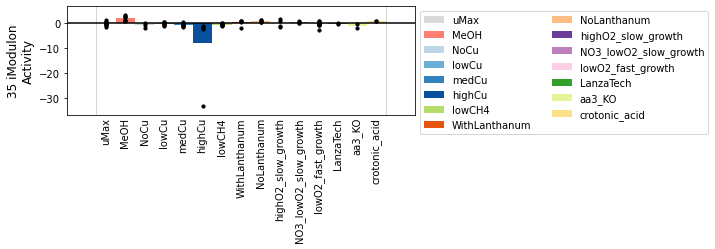

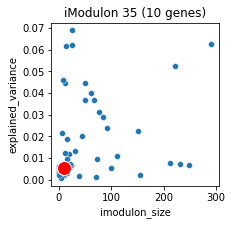

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS03455     0.173204         NaN       734828     735008      -1   
EQU24_RS05420     0.290447         NaN      1163549    1163954       1   
EQU24_RS09095     0.238490         NaN      2011099    2011279      -1   
EQU24_RS10680     0.149084         NaN      2374756    2375617      -1   
EQU24_RS14480     0.306346         NaN      3237002    3237146      -1   
EQU24_RS14930     0.129914         NaN      3328929    3329181      -1   
EQU24_RS16375     0.253470         NaN      3677719    3678100      -1   
EQU24_RS20320     0.288351         NaN      4585274    4585535      -1   
EQU24_RS20610     0.161263         NaN      4646544    4647282      -1   
EQU24_RS21260     0.214838         NaN      4791094    4791280       1   

                                         product COG  \
EQU24_RS03455               hypothetical protein   X   
EQU24_RS05420        biopolymer transporter ExbD   U   
EQU24_RS09095               hypothetical protein   X   
EQU24_RS10680             IS4 family transposase   L   
EQU24_RS14480  DUF3096 domain-containing protein   S   
EQU24_RS14930               hypothetical protein   X   
EQU24_RS16375               hypothetical protein   X   
EQU24_RS20320  DUF2442 domain-containing protein   S   
EQU24_RS20610           ISAs1 family transposase   L   
EQU24_RS21260               hypothetical protein   X   

                                                        cog_name  \
EQU24_RS03455                                  No COG annotation   
EQU24_RS05420  Intracellular trafficking, secretion, and vesi...   
EQU24_RS09095                                  No COG annotation   
EQU24_RS10680              Replication, recombination and repair   
EQU24_RS14480                                   Function unknown   
EQU24_RS14930                                  No COG annotation   
EQU24_RS16375                                  No COG annotation   
EQU24_RS20320                                   Function unknown   
EQU24_RS20610              Replication, recombination and repair   
EQU24_RS21260                                  No COG annotation   

                     uniprot  tu_id  \
EQU24_RS03455            NaN   2375   
EQU24_RS05420     A0A4P9UMI9   2154   
EQU24_RS09095            NaN   1680   
EQU24_RS10680  UPI0015862106   1488   
EQU24_RS14480  UPI00022CF931   1014   
EQU24_RS14930            NaN    947   
EQU24_RS16375  UPI00110CDF10    754   
EQU24_RS20320     A0A4P9UV61    252   
EQU24_RS20610            NaN    212   
EQU24_RS21260            NaN    120   

                                                       tu_name  \
EQU24_RS03455                                    EQU24_RS03455   
EQU24_RS05420  EQU24_RS05430 // EQU24_RS05425 // EQU24_RS05420   
EQU24_RS09095  EQU24_RS09095 // EQU24_RS09090 // EQU24_RS09085   
EQU24_RS10680                   EQU24_RS10685 // EQU24_RS10680   
EQU24_RS14480                                    EQU24_RS14480   
EQU24_RS14930                                    EQU24_RS14930   
EQU24_RS16375                                    EQU24_RS16375   
EQU24_RS20320                                    EQU24_RS20320   
EQU24_RS20610                   EQU24_RS20615 // EQU24_RS20610   
EQU24_RS21260                                    EQU24_RS21260   

                 ncbi_protein gene_name_extra  \
EQU24_RS03455             NaN              ||   
EQU24_RS05420  WP_014149416.1          ||None   
EQU24_RS09095             NaN              ||   
EQU24_RS10680  WP_175421679.1          ||None   
EQU24_RS14480  WP_014148969.1          ||None   
EQU24_RS14930             NaN              ||   
EQU24_RS16375  WP_138767202.1          ||None   
EQU24_RS20320  WP_017841802.1          ||None   
EQU24_RS20610             NaN              ||   
EQU24_RS21260             NaN              ||   

                                                  specific_gos_n  \
EQU24_RS03455                                                NaN   
E

In [100]:
imod_info(35)

In [105]:
ica_data.imodulon_table.loc[35,'function'] = 'some-membrane/outlier-response-highCu_T6_EW'


## iMod 36

iModulon 36


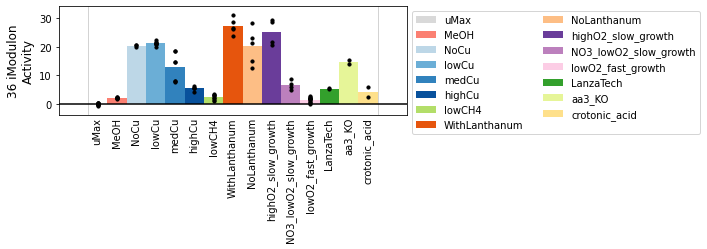

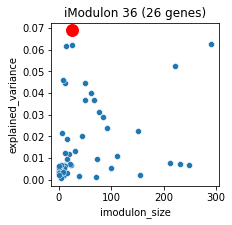

imodulon                                    go_name        pvalue  \
33         36                                        NaN  2.551553e-21   
140        36                                 chemotaxis  7.935131e-14   
40         36                                        NaN  1.730701e-10   
143        36  transmembrane signaling receptor activity  5.730614e-05   
141        36                        signal transduction  3.103179e-09   
34         36                                        NaN  4.454696e-15   
142        36    phosphorelay signal transduction system  2.487547e-07   

           qvalue  precision    recall   f1score    TP  target_set_size  \
33   6.455428e-19   0.615385  0.175824  0.273504  16.0             91.0   
140  3.255784e-10   0.384615  0.204082  0.266667  10.0             49.0   
40   5.884382e-08   0.307692  0.170213  0.219178   8.0             47.0   
143  5.878178e-02   0.115385  0.230769  0.153846   3.0             13.0   
141  6.366171e-06   0.346154  0.091837  0.145161   9.0            102.0   
34   5.635190e-13   0.615385  0.074074  0.132231  16.0            216.0   
142  3.402135e-04   0.346154  0.055901  0.096257   9.0            161.0   

     imodulon_size         source annotation          pathway_name module_name  
33            26.0  KEGG pathways   map02030  Bacterial chemotaxis         NaN  
140           26.0             GO        NaN                   NaN         NaN  
40            26.0   KEGG modules     M00506                   NaN         NaN  
143           26.0             GO        NaN                   NaN         NaN  
141           26.0             GO        NaN                   NaN         NaN  
34            26.0  KEGG pathways   map02020  Two-component system         NaN  
142           26.0             GO        NaN                   NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS10515     0.134049         NaN      2336585    2336855      -1   
EQU24_RS10520     0.157371         NaN      2336917    2337478      -1   
EQU24_RS10525     0.139085         NaN      2337487    2340502      -1   
EQU24_RS10530     0.193176         NaN      2340582    2342751      -1   
EQU24_RS10535     0.199150         NaN      2342747    2343071      -1   
EQU24_RS10540     0.176073         NaN      2343082    2343451      -1   
EQU24_RS10545     0.173408         NaN      2343463    2344675      -1   
EQU24_RS10550     0.139188         NaN      2345682    2347200       1   
EQU24_RS10565     0.092290         NaN      2351540    2352749      -1   
EQU24_RS10575     0.096598         NaN      2355155    2356262      -1   
EQU24_RS10580     0.121634         NaN      2356465    2357308      -1   
EQU24_RS10605     0.101795         NaN      2359954    2360374      -1   
EQU24_RS10610     0.094357         NaN      2360377    2360764      -1   
EQU24_RS10615     0.094995         NaN      2360760    2361636      -1   
EQU24_RS10620     0.105663         NaN      2361767    2362991      -1   
EQU24_RS10625     0.107209         NaN      2363007    2363382      -1   
EQU24_RS10630     0.127642         NaN      2363383    2363632      -1   
EQU24_RS10635     0.110909         NaN      2363631    2366004      -1   
EQU24_RS10640     0.121851         NaN      2366000    2366372      -1   
EQU24_RS10645     0.133420         NaN      2366368    2367211      -1   
EQU24_RS10650     0.135621         NaN      2367223    2367859      -1   
EQU24_RS10655     0.160257        cheB      2368179    2369232      -1   
EQU24_RS10660     0.177824         NaN      2369285    2370884      -1   
EQU24_RS10665     0.193471         NaN      2370914    2372834      -1   
EQU24_RS12805    -0.143534         NaN      2872306    2873593       1   
EQU24_RS16040    -0.093340         NaN      3603377    3604664      -1   

                                                         product COG  \
EQU24_RS10515                               hypothetical protein   X   
EQU24_RS10520                            chemotaxis protein CheW   N   
EQU24_RS10525                methyl-accepting chemotaxis protein   T   
EQU24_RS10530                            chemotaxis protein CheA   N   
EQU24_RS10535                     STAS domain-containing protein   T   
EQU24_RS10540                                 response regulator   T   
EQU24_RS10545                               hypothetical protein   N   
EQU24_RS10550                           PAS domain S-box protein   X   
EQU24_RS10565                                 response regulator   T   
EQU24_RS10575  chemotaxis response regulator protein-glutamat...   N   
EQU24_RS10580         protein-glutamate O-methyltransferase CheR   H   
EQU24_RS10605                       anti-sigma regulatory factor   T   
EQU24_RS10610                     STAS domain-containing protein   T   
EQU24_RS10615                     STAS domain-containing protein   T   
EQU24_RS10620                               hypothetical protein   N   
EQU24_RS10625                                 response regulator   T   
EQU24_RS10630                               hypothetical protein   X   
EQU24_RS10635                            chemotaxis protein CheA   T   
EQU24_RS10640                                 response regulator   K   
EQU24_RS10645         protein-glutamate O-methyltransferase CheR   H   
EQU24_RS10650              HEAT repeat domain-containing protein   C   
EQU24_RS10655  chemotaxis-specific protein-glutamate methyltr...   N   
EQU24_RS10660                            chemotaxis protein CheW   N   
EQU24_RS10665                                 chemotaxis protein   N   
EQU24_RS12805                             IS4 family transposase   L   
EQU24_RS16040                           ISNCY family transposase   L   

                                            cog_name        uniprot  tu

In [102]:
imod_info(36)

In [104]:
ica_data.imodulon_table.loc[36,'category'] = 'functional'
ica_data.imodulon_table.loc[36,'function'] = 'chemotaxis/signal-transduction/highest-exp-var_EW'

## iMod 37

iModulon SG_4


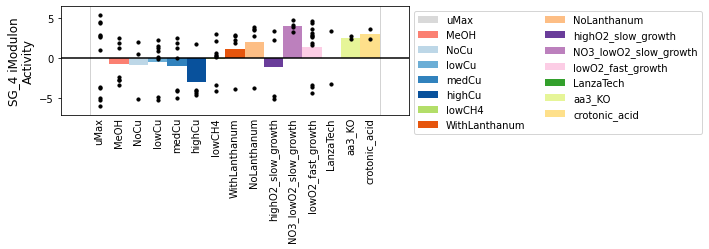

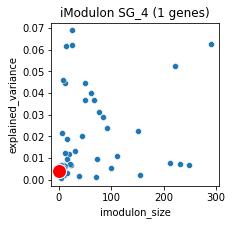

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS11910     0.789798         NaN      2663997    2664351       1   

                            product COG           cog_name uniprot  tu_id  \
EQU24_RS11910  hypothetical protein   X  No COG annotation     NaN   1330   

                     tu_name ncbi_protein gene_name_extra specific_gos_n  \
EQU24_RS11910  EQU24_RS11910          NaN              ||            NaN   

              specific_gos  
EQU24_RS11910           []

In [107]:
imod_info("SG_4")

In [108]:
ica_data.imodulon_table.loc["SG_4",'function'] = 'hypothetical-prot_EW'

## iMod 38

iModulon SG_5


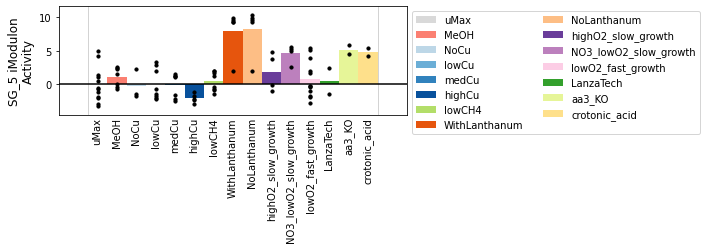

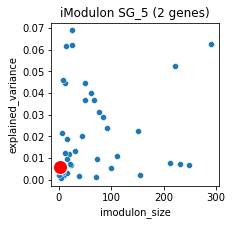

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS16560     0.617031         NaN      3715697    3717248      -1   
EQU24_RS20950     0.292919         NaN      4717305    4718589      -1   

                                 product COG  \
EQU24_RS16560    IS66 family transposase   L   
EQU24_RS20950  ISKra4 family transposase   L   

                                            cog_name     uniprot  tu_id  \
EQU24_RS16560  Replication, recombination and repair         NaN    727   
EQU24_RS20950  Replication, recombination and repair  A0A4V1IKC4    161   

                     tu_name    ncbi_protein gene_name_extra specific_gos_n  \
EQU24_RS16560  EQU24_RS16560  WP_040575330.1          ||None            NaN   
EQU24_RS20950  EQU24_RS20950  WP_017841684.1          ||None            NaN   

              specific_gos  
EQU24_RS16560           []  
EQU24_RS20950           []

In [110]:
imod_info("SG_5")

In [111]:
ica_data.imodulon_table.loc["SG_5",'function'] = 'transposase_EW'

## iMod 39

iModulon 39


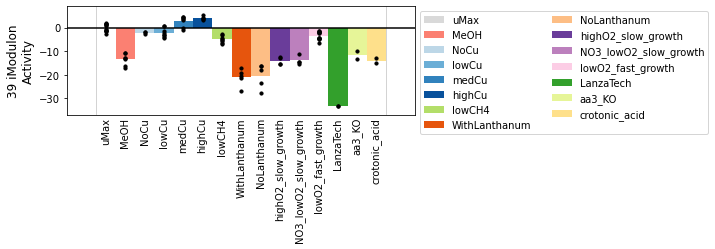

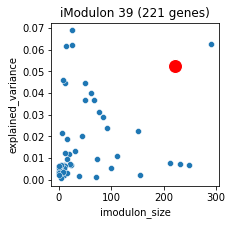

imodulon                                            go_name  \
151        39    cellular nitrogen compound biosynthetic process   
158        39       organonitrogen compound biosynthetic process   
148        39                         amide biosynthetic process   
165        39             organic substance biosynthetic process   
164        39                               biosynthetic process   
163        39                      cellular biosynthetic process   
169        39                                            cytosol   
154        39                   cellular amide metabolic process   
144        39                       peptide biosynthetic process   
172        39                                          cytoplasm   
150        39                                        translation   
149        39                          peptide metabolic process   
173        39                 intracellular anatomical structure   
175        39          organonitrogen compound metabolic process   
166        39                                    gene expression   
170        39                         protein-containing complex   
184        39       cellular nitrogen compound metabolic process   
186        39                                 molecular_function   
189        39                          primary metabolic process   
171        39                 cellular protein metabolic process   
147        39                 structural constituent of ribosome   
157        39                     non-membrane-bounded organelle   
146        39                                 cytosolic ribosome   
145        39                                  ribosomal subunit   
161        39                                          organelle   
174        39                          protein metabolic process   
35         39                                                NaN   
41         39                                                NaN   
155        39       intracellular non-membrane-bounded organelle   
152        39                                           ribosome   
153        39                          ribonucleoprotein complex   
176        39        cellular macromolecule biosynthetic process   
177        39                 macromolecule biosynthetic process   
156        39                       structural molecule activity   
162        39                            intracellular organelle   
178        39                                        RNA binding   
159        39                                       rRNA binding   
180        39          DNA-binding transcription factor activity   
168        39                            small ribosomal subunit   
167        39                  cytosolic small ribosomal subunit   
182        39                            large ribosomal subunit   
183        39                  cytosolic large ribosomal subunit   
187        39  negative regulation of cellular macromolecule ...   
188        39  negative regulation of macromolecule biosynthe...   
190        39  negative regulation of cellular biosynthetic p...   
191        39        negative regulation of biosynthetic process   
181        39                                       mRNA binding   
160        39                                mRNA 5'-UTR binding   
179        39           bacterial-type flagellum basal body, rod   
185        39                       ectoine biosynthetic process   

           pvalue    qvalue  precision    recall   f1score    TP  \
151  8.683386e-08  0.000045   0.167421  0.131673  0.147410  37.0   
158  5.445130e-07  0.000149   0.176471  0.119266  0.142336  39.0   
148  2.236416e-08  0.000018   0.108597  0.188976  0.137931  24.0   
165  3.525025e-06  0.000743   0.212670  0.101732  0.137628  47.0   
164  3.696737e-06  0.000743   0.217195  0.100629  0.137536  48.0   
163  3.984428e-06  0.000743   0.212670  0.101293  0.137226  47.0   
169  1.204061e-05  0.001972   0.221719  0.095703  0.133697  

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00075     0.046559        tatB        19487      19799       1   
EQU24_RS00105     0.058910         crp        24340      24994      -1   
EQU24_RS00110     0.067191         NaN        25137      25554       1   
EQU24_RS00505     0.050959        rpsU       104077     104311       1   
EQU24_RS00510     0.045898         NaN       104333     104783       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21645    -0.053832         NaN      4886529    4886943      -1   
EQU24_RS21950    -0.048036         NaN      4951896    4953342       1   
EQU24_RS21955    -0.035232        hflK      4953432    4954593       1   
EQU24_RS22045    -0.036226         NaN      4978984    4979710       1   
EQU24_RS22085     0.030015         NaN      4987320    4988301      -1   

                                                         product COG  \
EQU24_RS00075             twin-arginine translocase subunit TatB   U   
EQU24_RS00105  cAMP-activated global transcriptional regulato...   K   
EQU24_RS00110                                OsmC family protein   O   
EQU24_RS00505                          30S ribosomal protein S21   J   
EQU24_RS00510                GatB/YqeY domain-containing protein   S   
...                                                          ...  ..   
EQU24_RS21645                               hypothetical protein   X   
EQU24_RS21950        sigma-70 family RNA polymerase sigma factor   K   
EQU24_RS21955              FtsH protease activity modulator HflK   O   
EQU24_RS22045  cyclic nucleotide-binding domain-containing pr...   K   
EQU24_RS22085                                 MoxR family ATPase   S   

                                                        cog_name  \
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00105                                      Transcription   
EQU24_RS00110  Post-translational modification, protein turno...   
EQU24_RS00505    Translation, ribosomal structure and biogenesis   
EQU24_RS00510                                   Function unknown   
...                                                          ...   
EQU24_RS21645                                  No COG annotation   
EQU24_RS21950                                      Transcription   
EQU24_RS21955  Post-translational modification, protein turno...   
EQU24_RS22045                                      Transcription   
EQU24_RS22085                                   Function unknown   

                     uniprot  tu_id  \
EQU24_RS00075     A0A4P9UII1   2822   
EQU24_RS00105     A0A4P9UID5   2818   
EQU24_RS00110     A0A4V1IJB6   2817   
EQU24_RS00505     A0A4P9UIV9   2762   
EQU24_RS00510     A0A4P9UIP9   2762   
...                      ...    ...   
EQU24_RS21645  UPI00034CBEF0     65   
EQU24_RS21950  UPI00034C420F     26   
EQU24_RS21955     A0A4P9USU2     25   
EQU24_RS22045            NaN     13   
EQU24_RS22085     A0A4P9UXQ5      9   

                                                         tu_name  \
EQU24_RS00075                                       tatB // tatA   
EQU24_RS00105                               crp // EQU24_RS00100   
EQU24_RS00110                              speD // EQU24_RS00110   
EQU24_RS00505                              EQU24_RS00510 // rpsU   
EQU24_RS00510                              EQU24_RS00510 // rpsU   
...                                                          ...   
EQU24_RS21645                                      EQU24_RS21645   
EQU24_RS21950                                      EQU24_RS21950   
EQU24_RS21955                               hflB // hflC // hflK   
EQU24_RS22045                                      EQU24_RS22045   
EQU24_RS22085  EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...   

                 ncbi_protein gene_name_extra  \
EQU24_RS00075  WP_017841462.1      tatB||tatB   
EQU24_RS00105  WP_014146545.1        crp||crp   
EQU24_RS001

In [112]:
imod_info(39)

In [114]:
ica_data.imodulon_table.loc[39,'category'] = 'functional'
ica_data.imodulon_table.loc[39,'function'] = 'translation/ribosomal/biosynthesis_EW'

## iMod 40

iModulon SG_6


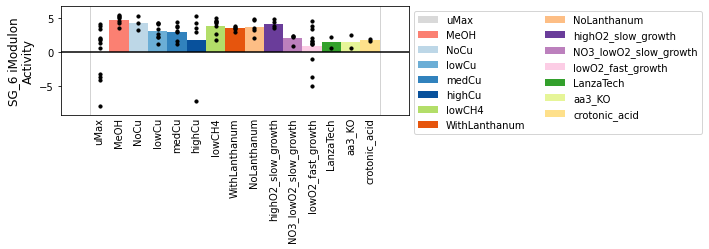

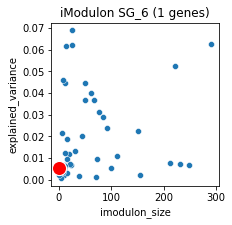

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS08710     0.608356         NaN      1931194    1931374       1   

                            product COG           cog_name uniprot  tu_id  \
EQU24_RS08710  hypothetical protein   X  No COG annotation     NaN   1728   

                                                       tu_name ncbi_protein  \
EQU24_RS08710  EQU24_RS08720 // EQU24_RS08715 // EQU24_RS08710          NaN   

              gene_name_extra specific_gos_n specific_gos  
EQU24_RS08710              ||            NaN           []

In [116]:
imod_info('SG_6')

In [117]:
ica_data.imodulon_table.loc["SG_6",'function'] = 'hypothetical-prot_EW'

## iMod 41

iModulon 41


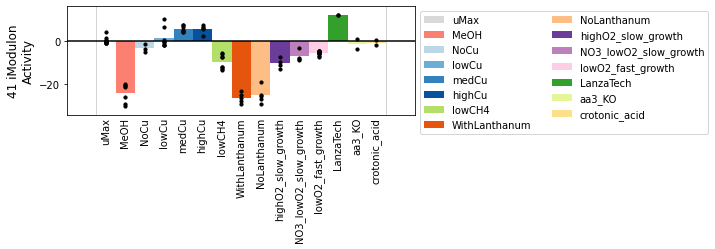

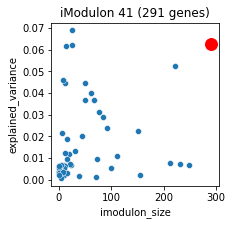

imodulon                                          go_name        pvalue  \
192        41                                      translation  3.596113e-34   
204        41  cellular nitrogen compound biosynthetic process  1.456725e-26   
199        41                       amide biosynthetic process  8.841671e-29   
196        41                     peptide biosynthetic process  2.924840e-31   
202        41                 cellular amide metabolic process  1.666308e-27   
..        ...                                              ...           ...   
425        41                                         polysome  4.755664e-03   
424        41                               polysomal ribosome  4.755664e-03   
423        41              DNA-directed RNA polymerase complex  4.755664e-03   
419        41           S-adenosylmethionine metabolic process  4.755664e-03   
420        41           3-isopropylmalate dehydratase activity  4.755664e-03   

           qvalue  precision    recall   f1score    TP  target_set_size  \
192  1.475485e-30   0.178694  0.500000  0.263291  52.0            104.0   
204  4.597649e-24   0.254296  0.263345  0.258741  74.0            281.0   
199  4.149410e-26   0.178694  0.409449  0.248804  52.0            127.0   
196  2.400124e-28   0.164948  0.494845  0.247423  48.0             97.0   
202  6.215330e-25   0.182131  0.381295  0.246512  53.0            139.0   
..            ...        ...       ...       ...   ...              ...   
425  8.130204e-02   0.006873  1.000000  0.013652   2.0              2.0   
424  8.130204e-02   0.006873  1.000000  0.013652   2.0              2.0   
423  8.130204e-02   0.006873  1.000000  0.013652   2.0              2.0   
419  8.130204e-02   0.006873  1.000000  0.013652   2.0              2.0   
420  8.130204e-02   0.006873  1.000000  0.013652   2.0              2.0   

     imodulon_size source annotation pathway_name module_name  
192          291.0     GO        NaN          NaN         NaN  
204          291.0     GO        NaN          NaN         NaN  
199          291.0     GO        NaN          NaN         NaN  
196          291.0     GO        NaN          NaN         NaN  
202          291.0     GO        NaN          NaN         NaN  
..             ...    ...        ...          ...         ...  
425          291.0     GO        NaN          NaN         NaN  
424          291.0     GO        NaN          NaN         NaN  
423          291.0     GO        NaN          NaN         NaN  
419          291.0     GO        NaN          NaN         NaN  
420          291.0     GO        NaN          NaN         NaN  

[261 rows x 14 columns]

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00020     0.027063        gyrB         4185       6600       1   
EQU24_RS00045     0.028321         NaN         9071      10241       1   
EQU24_RS00175     0.029686         NaN        39992      40271      -1   
EQU24_RS00205     0.031454         NaN        44526      46077      -1   
EQU24_RS00240    -0.035278         NaN        49350      49572       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21815     0.032004         NaN      4920552    4921551       1   
EQU24_RS21820     0.047353         NaN      4921568    4921862       1   
EQU24_RS21825     0.035101         NaN      4921876    4922530       1   
EQU24_RS21970     0.030547         NaN      4957466    4957907       1   
EQU24_RS22140     0.033583        yidC      4996295    4997993      -1   

                                                         product COG  \
EQU24_RS00020      DNA topoisomerase (ATP-hydrolyzing) subunit B   L   
EQU24_RS00045  efflux RND transporter periplasmic adaptor sub...   M   
EQU24_RS00175                               hypothetical protein   L   
EQU24_RS00205                            IS66 family transposase   L   
EQU24_RS00240                               hypothetical protein   X   
...                                                          ...  ..   
EQU24_RS21815                               hypothetical protein   X   
EQU24_RS21820                               hypothetical protein   X   
EQU24_RS21825                                   HNH endonuclease   V   
EQU24_RS21970                               hypothetical protein   X   
EQU24_RS22140                    membrane protein insertase YidC   U   

                                                        cog_name     uniprot  \
EQU24_RS00020              Replication, recombination and repair  A0A4P9UI83   
EQU24_RS00045             Cell wall/membrane/envelope biogenesis  A0A4P9UKH1   
EQU24_RS00175              Replication, recombination and repair  A0A4P9UIR2   
EQU24_RS00205              Replication, recombination and repair         NaN   
EQU24_RS00240                                  No COG annotation         NaN   
...                                                          ...         ...   
EQU24_RS21815                                  No COG annotation  A0A4P9USR1   
EQU24_RS21820                                  No COG annotation  A0A4P9USQ6   
EQU24_RS21825                                 Defense mechanisms  A0A4P9UV06   
EQU24_RS21970                                  No COG annotation  A0A4P9UT06   
EQU24_RS22140  Intracellular trafficking, secretion, and vesi...  A0A4V1IKE6   

               tu_id                                            tu_name  \
EQU24_RS00020   2828                                               gyrB   
EQU24_RS00045   2825  EQU24_RS00055 // EQU24_RS00050 // EQU24_RS0004...   
EQU24_RS00175   2808                                      EQU24_RS00175   
EQU24_RS00205   2803                                      EQU24_RS00205   
EQU24_RS00240   2798                                      EQU24_RS00240   
...              ...                                                ...   
EQU24_RS21815     43  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS21820     43  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS21825     43  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS21970     24                                      EQU24_RS21970   
EQU24_RS22140      1               rpmH // rnpA // yidD // yidC // mnmE   

                 ncbi_protein gene_name_extra  \
EQU24_RS00020  WP_017841469.1      gyrB||gyrB   
EQU24_RS00045  WP_017841466.1          ||None   
EQU24_RS00175  WP_017841442.1          ||None   
EQU24_RS00205  WP_244310896.1          ||None   
EQU24_RS00240             NaN              ||   
...                       ...             ...   
EQU24_RS21815  WP_017841539.1          ||None   
EQU24_R

In [118]:
imod_info(41)

In [119]:
ica_data.imodulon_table.loc[41,'function'] = 'translation/ribosomal/biosynthesis_EW'

## iMod 42

iModulon 42


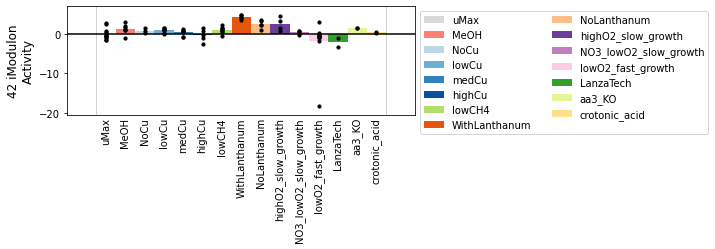

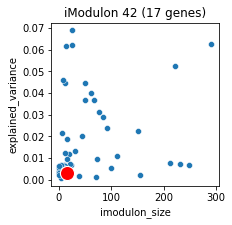

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00175    -0.112651         NaN        39992      40271      -1   
EQU24_RS01385     0.148525        lexA       287898     288525       1   
EQU24_RS01760     0.132330        cydX       371326     371470       1   
EQU24_RS07995    -0.133022         NaN      1765410    1766609      -1   
EQU24_RS08710     0.081821         NaN      1931194    1931374       1   
EQU24_RS10630     0.093460         NaN      2363383    2363632      -1   
EQU24_RS10960     0.346635         NaN      2446125    2446314      -1   
EQU24_RS12140     0.135788        cas2      2713901    2714186      -1   
EQU24_RS14750    -0.101577         NaN      3299644    3299875      -1   
EQU24_RS14765     0.331464         NaN      3301430    3301946       1   
EQU24_RS16555    -0.082442         NaN      3714628    3714988      -1   
EQU24_RS17665     0.105859         NaN      3938733    3940029      -1   
EQU24_RS18430     0.142202         NaN      4111371    4112844       1   
EQU24_RS19095     0.136808         NaN      4273547    4273898       1   
EQU24_RS19915     0.083452         NaN      4474858    4475002       1   
EQU24_RS20320     0.100544         NaN      4585274    4585535      -1   
EQU24_RS20610    -0.092792         NaN      4646544    4647282      -1   

                                            product COG  \
EQU24_RS00175                  hypothetical protein   L   
EQU24_RS01385        transcriptional repressor LexA   K   
EQU24_RS01760  cytochrome bd-I oxidase subunit CydX   S   
EQU24_RS07995                IS3 family transposase   L   
EQU24_RS08710                  hypothetical protein   X   
EQU24_RS10630                  hypothetical protein   X   
EQU24_RS10960                  hypothetical protein   X   
EQU24_RS12140   CRISPR-associated endonuclease Cas2   L   
EQU24_RS14750                 DUF883 family protein   S   
EQU24_RS14765                  hypothetical protein   S   
EQU24_RS16555                  hypothetical protein   X   
EQU24_RS17665                IS4 family transposase   L   
EQU24_RS18430                IS4 family transposase   L   
EQU24_RS19095                  hypothetical protein   X   
EQU24_RS19915                  hypothetical protein   X   
EQU24_RS20320     DUF2442 domain-containing protein   S   
EQU24_RS20610              ISAs1 family transposase   L   

                                            cog_name        uniprot  tu_id  \
EQU24_RS00175  Replication, recombination and repair     A0A4P9UIR2   2808   
EQU24_RS01385                          Transcription     A0A4P9UIS2    309   
EQU24_RS01760                       Function unknown  UPI0003472C68   2591   
EQU24_RS07995  Replication, recombination and repair  UPI00110CA4C7   1825   
EQU24_RS08710                      No COG annotation            NaN   1728   
EQU24_RS10630                      No COG annotation     A0A4P9UQ17   1492   
EQU24_RS10960                      No COG annotation     A0A4P9UNA8   1458   
EQU24_RS12140  Replication, recombination and repair     A0A4P9UNK1   1307   
EQU24_RS14750                       Function unknown     A0A4P9USK1    967   
EQU24_RS14765                       Function unknown     A0A4P9UPN4    965   
EQU24_RS16555                      No COG annotation     A0A4P9UQG2    728   
EQU24_RS17665  Replication, recombination and repair  UPI00110CD44A    595   
EQU24_RS18430  Replication, recombination and repair  UPI0015860BBF    501   
EQU24_RS19095                      No COG annotation            NaN    415   
EQU24_RS19915                      No COG annotation            NaN    304   
EQU24_RS20320                       Function unknown     A0A4P9UV61    252   
EQU24_RS20610  Replication, recombination and repair            NaN    212   

                                                         tu_name  \
EQU24_RS00175                                      EQU24_RS00175   
EQU24_RS01385                                               lexA   
EQU24_RS01

In [120]:
imod_info(42)

In [121]:
ica_data.imodulon_table.loc[42,'function'] = 'unclear/outlier-response-FM19_TR3_QC_EW'

## iMod 43

iModulon 43


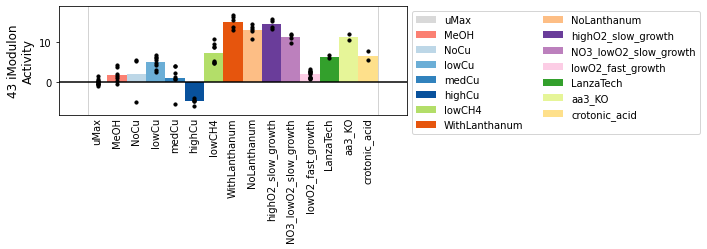

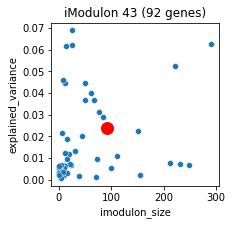

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00190     0.056613         NaN        42656      42884      -1   
EQU24_RS00250    -0.068549         NaN        50778      51069       1   
EQU24_RS00525    -0.040331         NaN       108456     108533       1   
EQU24_RS01135     0.051399         NaN       231558     231840       1   
EQU24_RS01150    -0.058193         NaN       234038     234461       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20590    -0.046333         NaN      4641915    4642194      -1   
EQU24_RS20770    -0.041359         NaN      4678204    4678414      -1   
EQU24_RS20950     0.142494         NaN      4717305    4718589      -1   
EQU24_RS21260    -0.055496         NaN      4791094    4791280       1   
EQU24_RS21645     0.058308         NaN      4886529    4886943      -1   

                                 product COG  \
EQU24_RS00190       hypothetical protein   X   
EQU24_RS00250       hypothetical protein   X   
EQU24_RS00525                        NaN   X   
EQU24_RS01135       hypothetical protein   X   
EQU24_RS01150       hypothetical protein   X   
...                                  ...  ..   
EQU24_RS20590       hypothetical protein   X   
EQU24_RS20770       hypothetical protein   X   
EQU24_RS20950  ISKra4 family transposase   L   
EQU24_RS21260       hypothetical protein   X   
EQU24_RS21645       hypothetical protein   X   

                                            cog_name        uniprot  tu_id  \
EQU24_RS00190                      No COG annotation  UPI00110D139D   2805   
EQU24_RS00250                      No COG annotation     A0A4P9UIB5   2796   
EQU24_RS00525                      No COG annotation            NaN   2760   
EQU24_RS01135                      No COG annotation     A0A4P9ULJ3   2673   
EQU24_RS01150                      No COG annotation     A0A4P9UIU6   2671   
...                                              ...            ...    ...   
EQU24_RS20590                      No COG annotation     A0A4P9US62    216   
EQU24_RS20770                      No COG annotation            NaN    190   
EQU24_RS20950  Replication, recombination and repair     A0A4V1IKC4    161   
EQU24_RS21260                      No COG annotation            NaN    120   
EQU24_RS21645                      No COG annotation  UPI00034CBEF0     65   

                                                         tu_name  \
EQU24_RS00190                     EQU24_RS00195 // EQU24_RS00190   
EQU24_RS00250                                      EQU24_RS00250   
EQU24_RS00525                              EQU24_RS00525 // rpoD   
EQU24_RS01135  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01150                                      EQU24_RS01150   
...                                                          ...   
EQU24_RS20590                                      EQU24_RS20590   
EQU24_RS20770                     EQU24_RS20775 // EQU24_RS20770   
EQU24_RS20950                                      EQU24_RS20950   
EQU24_RS21260                                      EQU24_RS21260   
EQU24_RS21645                                      EQU24_RS21645   

                 ncbi_protein gene_name_extra  \
EQU24_RS00190  WP_138767047.1          ||None   
EQU24_RS00250  WP_017841431.1          ||None   
EQU24_RS00525             NaN              ||   
EQU24_RS01135  WP_017841271.1          ||None   
EQU24_RS01150  WP_017841268.1          ||None   
...                       ...             ...   
EQU24_RS20590  WP_014150183.1          ||None   
EQU24_RS20770  WP_017841721.1          ||None   
EQU24_RS20950  WP_017841684.1          ||None   
EQU24_RS21260             NaN              ||   
EQU24_RS21645  WP_138767255.1          ||None   

                                                  specific_gos_n  \
EQU24_RS00190  DNA binding\ntransposase activity\ntranspositi...   
EQU24_RS00250                     integral component of membrane   
EQ

In [122]:
imod_info(43)

In [123]:
ica_data.imodulon_table.loc[43,'function'] = 'transposase_EW'

## iMod 44

iModulon SG_7


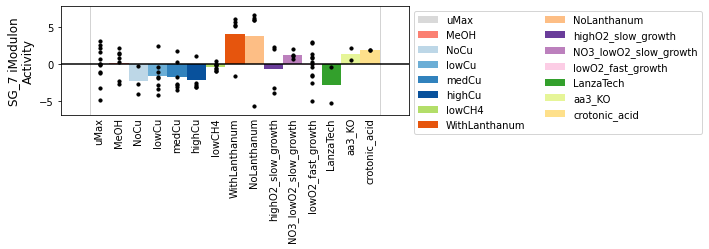

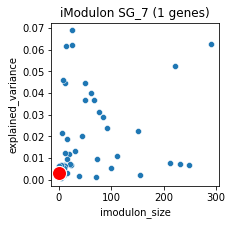

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01305     0.559227         NaN       265994     267545       1   

                               product COG  \
EQU24_RS01305  IS66 family transposase   L   

                                            cog_name uniprot  tu_id  \
EQU24_RS01305  Replication, recombination and repair     NaN   2653   

                     tu_name    ncbi_protein gene_name_extra specific_gos_n  \
EQU24_RS01305  EQU24_RS01305  WP_244310896.1          ||None            NaN   

              specific_gos  
EQU24_RS01305           []

In [125]:
imod_info("SG_7")

In [126]:
ica_data.imodulon_table.loc["SG_7",'function'] = 'transposase_EW'

## iMod 45

iModulon 45


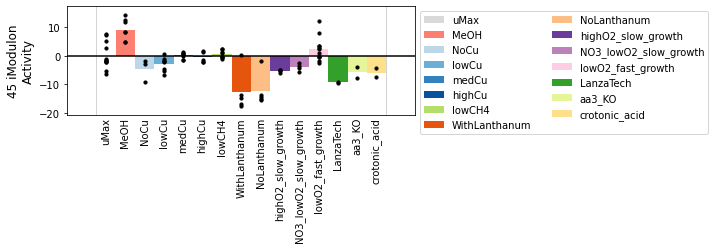

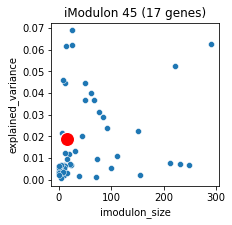

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00780     0.087065         NaN       161810     161999       1   
EQU24_RS02780     0.136971         NaN       598789     598877      -1   
EQU24_RS02970     0.135469        pqqA       634777     634852      -1   
EQU24_RS04160     0.220901         NaN       874502     874683      -1   
EQU24_RS05640     0.082970         NaN      1220826    1220902       1   
EQU24_RS05645     0.153492         NaN      1220955    1221031       1   
EQU24_RS07965     0.161390         NaN      1758864    1758940       1   
EQU24_RS09235     0.101818         NaN      2044551    2044648       1   
EQU24_RS09830     0.078386         NaN      2185247    2185322       1   
EQU24_RS09835     0.116223         NaN      2185369    2185443       1   
EQU24_RS11170     0.167772         NaN      2491877    2492099       1   
EQU24_RS15090     0.131003         NaN      3372700    3372777      -1   
EQU24_RS15095     0.087869         NaN      3372785    3372861      -1   
EQU24_RS16575     0.079422         NaN      3719991    3720067      -1   
EQU24_RS17665    -0.092885         NaN      3938733    3940029      -1   
EQU24_RS19665     0.078297         NaN      4420900    4421098       1   
EQU24_RS20650     0.200435         NaN      4658178    4658265       1   

                                                       product COG  \
EQU24_RS00780                             hypothetical protein   X   
EQU24_RS02780                                              NaN   X   
EQU24_RS02970  pyrroloquinoline quinone precursor peptide PqqA   X   
EQU24_RS04160                                              NaN   X   
EQU24_RS05640                                              NaN   X   
EQU24_RS05645                                              NaN   X   
EQU24_RS07965                                              NaN   X   
EQU24_RS09235                                              NaN   X   
EQU24_RS09830                                              NaN   X   
EQU24_RS09835                                              NaN   X   
EQU24_RS11170                             hypothetical protein   X   
EQU24_RS15090                                              NaN   X   
EQU24_RS15095                                              NaN   X   
EQU24_RS16575                                              NaN   X   
EQU24_RS17665                           IS4 family transposase   L   
EQU24_RS19665                             hypothetical protein   X   
EQU24_RS20650                                              NaN   X   

                                            cog_name        uniprot  tu_id  \
EQU24_RS00780                      No COG annotation            NaN   2724   
EQU24_RS02780                      No COG annotation            NaN   2450   
EQU24_RS02970                      No COG annotation  UPI000223C236   2429   
EQU24_RS04160                      No COG annotation            NaN   2308   
EQU24_RS05640                      No COG annotation            NaN   2123   
EQU24_RS05645                      No COG annotation            NaN   2123   
EQU24_RS07965                      No COG annotation            NaN   1830   
EQU24_RS09235                      No COG annotation            NaN   1662   
EQU24_RS09830                      No COG annotation            NaN   1582   
EQU24_RS09835                      No COG annotation            NaN   1582   
EQU24_RS11170                      No COG annotation            NaN   1430   
EQU24_RS15090                      No COG annotation            NaN    924   
EQU24_RS15095                      No COG annotation            NaN    924   
EQU24_RS16575                      No COG annotation            NaN    724   
EQU24_RS17665  Replication, recombination and repair  UPI00110CD44A    595   
EQU24_RS19665                      No COG annotation            NaN    334   
EQU24_RS20650                      No COG annotation            NaN    207   

                

In [127]:
imod_info(45)

In [128]:
ica_data.imodulon_table.loc[45,'function'] = 'pqqa-unclear?_EW'

## iMod 46

iModulon 46


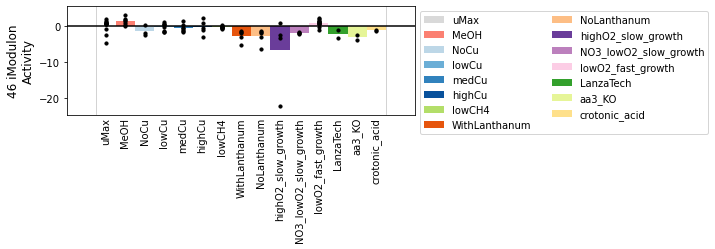

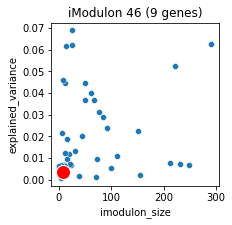

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01150     0.276803         NaN       234038     234461       1   
EQU24_RS01175     0.120823        umuD       237101     237485      -1   
EQU24_RS01555    -0.169976         NaN       328948     329197       1   
EQU24_RS02995     0.130412         NaN       638646     638847      -1   
EQU24_RS03455     0.253932         NaN       734828     735008      -1   
EQU24_RS06205     0.274035         NaN      1352804    1353026      -1   
EQU24_RS10680     0.231463         NaN      2374756    2375617      -1   
EQU24_RS19655    -0.220265         NaN      4416746    4418297      -1   
EQU24_RS20770     0.122951         NaN      4678204    4678414      -1   

                                                         product COG  \
EQU24_RS01150                               hypothetical protein   X   
EQU24_RS01175  translesion error-prone DNA polymerase V autop...   K   
EQU24_RS01555                               hypothetical protein   X   
EQU24_RS02995                               hypothetical protein   X   
EQU24_RS03455                               hypothetical protein   X   
EQU24_RS06205                               hypothetical protein   X   
EQU24_RS10680                             IS4 family transposase   L   
EQU24_RS19655                            IS66 family transposase   L   
EQU24_RS20770                               hypothetical protein   X   

                                            cog_name        uniprot  tu_id  \
EQU24_RS01150                      No COG annotation     A0A4P9UIU6   2671   
EQU24_RS01175                          Transcription  UPI00191C1247   2668   
EQU24_RS01555                      No COG annotation            NaN   2616   
EQU24_RS02995                      No COG annotation     A0A4P9UJG7   2424   
EQU24_RS03455                      No COG annotation            NaN   2375   
EQU24_RS06205                      No COG annotation            NaN   2050   
EQU24_RS10680  Replication, recombination and repair  UPI0015862106   1488   
EQU24_RS19655  Replication, recombination and repair            NaN    336   
EQU24_RS20770                      No COG annotation            NaN    190   

                                      tu_name    ncbi_protein gene_name_extra  \
EQU24_RS01150                   EQU24_RS01150  WP_017841268.1          ||None   
EQU24_RS01175           umuD // EQU24_RS01170  WP_201764864.1      umuD||umuD   
EQU24_RS01555                   EQU24_RS01555             NaN              ||   
EQU24_RS02995                   EQU24_RS02995  WP_017840923.1          ||None   
EQU24_RS03455                   EQU24_RS03455             NaN              ||   
EQU24_RS06205                   EQU24_RS06205             NaN              ||   
EQU24_RS10680  EQU24_RS10685 // EQU24_RS10680  WP_175421679.1          ||None   
EQU24_RS19655                   EQU24_RS19655  WP_040575330.1          ||None   
EQU24_RS20770  EQU24_RS20775 // EQU24_RS20770  WP_017841721.1          ||None   

                                                  specific_gos_n  \
EQU24_RS01150                                                NaN   
EQU24_RS01175  regulation of transcription, DNA-templated\nDN...   
EQU24_RS01555                     integral component of membrane   
EQU24_RS02995                                                NaN   
EQU24_RS03455                                                NaN   
EQU24_RS06205  phosphorelay signal transduction system\ninteg...   
EQU24_RS10680  DNA binding\ntransposase activity\ntranspositi...   
EQU24_RS19655                                                NaN   
EQU24_RS20770                     integral component of membrane   

                                                    specific_gos  
EQU24_RS01150                                                 []  
EQU24_RS01175  ['regulation of transcription, DNA-templated' ...  
EQU24_RS01555                 ['integral component of membrane']  
EQU24_RS0299

In [129]:
imod_info(46)

In [130]:
ica_data.imodulon_table.loc[46,'function'] = 'small-unclear/outlier-response-highO2_slow_FM69_t3_TR1_UW_EW'

## iMod 47

iModulon SG_8


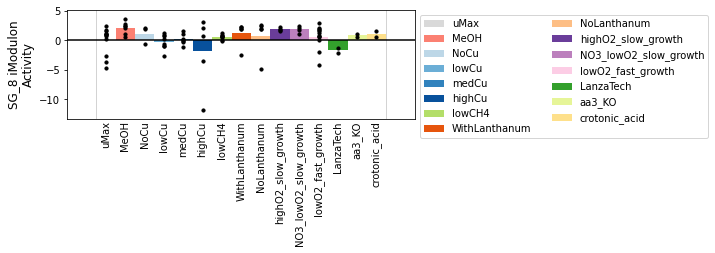

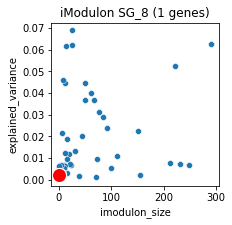

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00175     0.511797         NaN        39992      40271      -1   

                            product COG  \
EQU24_RS00175  hypothetical protein   L   

                                            cog_name     uniprot  tu_id  \
EQU24_RS00175  Replication, recombination and repair  A0A4P9UIR2   2808   

                     tu_name    ncbi_protein gene_name_extra  \
EQU24_RS00175  EQU24_RS00175  WP_017841442.1          ||None   

                                                  specific_gos_n  \
EQU24_RS00175  DNA binding\ntransposase activity\ntranspositi...   

                                                    specific_gos  
EQU24_RS00175  ['DNA binding' 'transposase activity' 'transpo...

In [132]:
imod_info('SG_8')

In [133]:
ica_data.imodulon_table.loc["SG_8",'function'] = 'hypothetical-prot_EW'

## iMod 48


iModulon 48


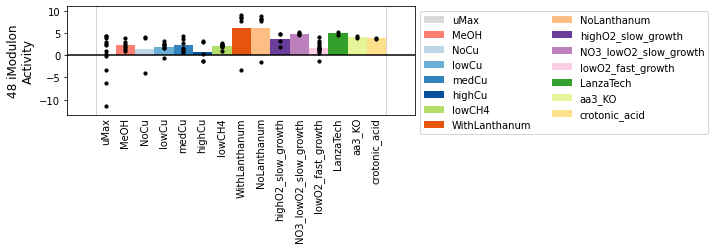

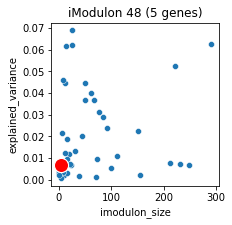

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS01215     0.218936         NaN       244910     246461      -1   
EQU24_RS14755     0.400336         NaN      3300040    3300526      -1   
EQU24_RS14930     0.389236         NaN      3328929    3329181      -1   
EQU24_RS20905     0.182978         NaN      4709465    4710749       1   
EQU24_RS20950     0.167260         NaN      4717305    4718589      -1   

                                             product COG  \
EQU24_RS01215                IS66 family transposase   L   
EQU24_RS14755  hemerythrin domain-containing protein   S   
EQU24_RS14930                   hypothetical protein   X   
EQU24_RS20905              ISKra4 family transposase   L   
EQU24_RS20950              ISKra4 family transposase   L   

                                            cog_name     uniprot  tu_id  \
EQU24_RS01215  Replication, recombination and repair         NaN   2664   
EQU24_RS14755                       Function unknown  A0A4P9UPL3    966   
EQU24_RS14930                      No COG annotation         NaN    947   
EQU24_RS20905  Replication, recombination and repair  A0A4V1IKC4    166   
EQU24_RS20950  Replication, recombination and repair  A0A4V1IKC4    161   

                     tu_name    ncbi_protein gene_name_extra  \
EQU24_RS01215  EQU24_RS01215  WP_040575330.1          ||None   
EQU24_RS14755  EQU24_RS14755  WP_017838763.1          ||None   
EQU24_RS14930  EQU24_RS14930             NaN              ||   
EQU24_RS20905  EQU24_RS20905  WP_017841684.1          ||None   
EQU24_RS20950  EQU24_RS20950  WP_017841684.1          ||None   

                               specific_gos_n  \
EQU24_RS01215                             NaN   
EQU24_RS14755                             NaN   
EQU24_RS14930  integral component of membrane   
EQU24_RS20905                             NaN   
EQU24_RS20950                             NaN   

                                     specific_gos  
EQU24_RS01215                                  []  
EQU24_RS14755                                  []  
EQU24_RS14930  ['integral component of membrane']  
EQU24_RS20905                                  []  
EQU24_RS20950                                  []

In [134]:
imod_info(48)

In [135]:
ica_data.imodulon_table.loc[48,'function'] = 'transposase_EW'

## iMod 49

iModulon 49


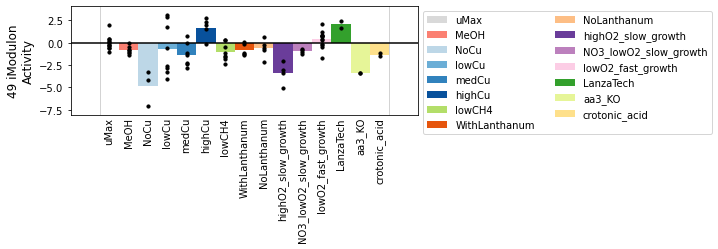

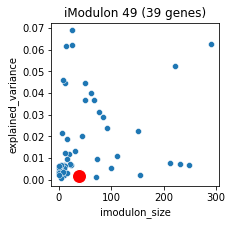

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
48        49     NaN  0.000249  0.056128   0.051282  0.666667  0.095238  2.0   
49        49     NaN  0.000495  0.056128   0.051282  0.500000  0.093023  2.0   
50        49     NaN  0.000495  0.056128   0.051282  0.500000  0.093023  2.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
48              3.0           39.0  KEGG modules     M00153          NaN   
49              4.0           39.0  KEGG modules     M00528          NaN   
50              4.0           39.0  KEGG modules     M00804          NaN   

                                          module_name  
48                    Cytochrome bd ubiquinol oxidase  
49                  Nitrification, ammonia => nitrite  
50  Complete nitrification, comammox, ammonia => n...

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00205    -0.208690         NaN        44526      46077      -1   
EQU24_RS00670    -0.165998         NaN       139733     140330       1   
EQU24_RS00675    -0.105439         NaN       140348     142232      -1   
EQU24_RS01555     0.104908         NaN       328948     329197       1   
EQU24_RS01570     0.062718         NaN       331924     332122       1   
EQU24_RS02320    -0.059684         NaN       494906     495476       1   
EQU24_RS02325    -0.093485         NaN       495663     496377      -1   
EQU24_RS02345    -0.094140         NaN       503066     503249      -1   
EQU24_RS04225    -0.077439         NaN       886915     888157      -1   
EQU24_RS05315    -0.069398        cobC      1131367    1131931      -1   
EQU24_RS05870    -0.123398         NaN      1279697    1281167       1   
EQU24_RS05875    -0.093071         NaN      1281163    1282471       1   
EQU24_RS05880    -0.080069         NaN      1282606    1282858       1   
EQU24_RS05930    -0.063266        mmoR      1292469    1294242       1   
EQU24_RS07015     0.062648         NaN      1539191    1540196       1   
EQU24_RS08455     0.077167        urtB      1866865    1867792       1   
EQU24_RS10680     0.083373         NaN      2374756    2375617      -1   
EQU24_RS10685    -0.057185         NaN      2375624    2376014      -1   
EQU24_RS10960    -0.105457         NaN      2446125    2446314      -1   
EQU24_RS11970     0.058560         NaN      2677956    2678349      -1   
EQU24_RS11990    -0.054027         NaN      2680903    2681857      -1   
EQU24_RS12085     0.058609         NaN      2704565    2705807      -1   
EQU24_RS13045     0.232813         NaN      2918882    2920169       1   
EQU24_RS14125     0.065354        ctaD      3155695    3157312      -1   
EQU24_RS14760     0.059415         NaN      3300999    3301413       1   
EQU24_RS14930     0.122485         NaN      3328929    3329181      -1   
EQU24_RS14935     0.054108        urtA      3329410    3330709      -1   
EQU24_RS16195     0.057698         NaN      3638287    3638482       1   
EQU24_RS16555    -0.082716         NaN      3714628    3714988      -1   
EQU24_RS17380    -0.058230         NaN      3891715    3891988       1   
EQU24_RS17445    -0.070896         NaN      3900849    3901119      -1   
EQU24_RS19095     0.057208         NaN      4273547    4273898       1   
EQU24_RS19155    -0.055011         NaN      4282467    4283163       1   
EQU24_RS19305     0.061902        pmoB      4322154    4323399      -1   
EQU24_RS19310     0.079654        pmoA      4323492    4324236      -1   
EQU24_RS19665     0.055423         NaN      4420900    4421098       1   
EQU24_RS19880     0.059453         NaN      4469767    4470070      -1   
EQU24_RS20610    -0.068506         NaN      4646544    4647282      -1   
EQU24_RS21260     0.104863         NaN      4791094    4791280       1   

                                                         product COG  \
EQU24_RS00205                            IS66 family transposase   L   
EQU24_RS00670                               hypothetical protein   X   
EQU24_RS00675                                  c-type cytochrome   C   
EQU24_RS01555                               hypothetical protein   X   
EQU24_RS01570                               hypothetical protein   X   
EQU24_RS02320                  DUF2452 domain-containing protein   S   
EQU24_RS02325                               hypothetical protein   X   
EQU24_RS02345                               hypothetical protein   X   
EQU24_RS04225                               hypothetical protein   X   
EQU24_RS05315                         alpha-ribazole phosphatase   G   
EQU24_RS05870                               hypothetical protein   C   
EQU24_RS05875                                       cytochrome c   C   
EQU24_RS05880                               hypothetical protein   X   
EQU24_RS05930  sigma-54-dependent Fis family t

In [136]:
imod_info(49)

In [137]:
ica_data.imodulon_table.loc[49,'function'] = 'pmoAB/low-in-NoCU/some-transposase/some-membrane_EW'

## iMod 50

iModulon SG_9


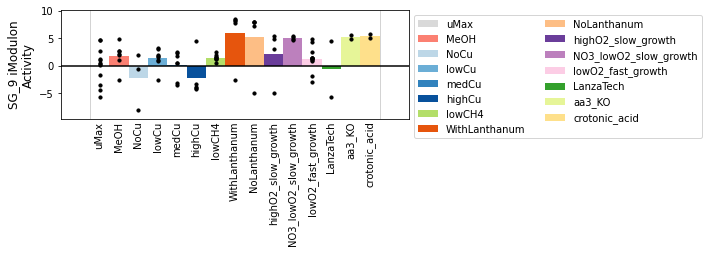

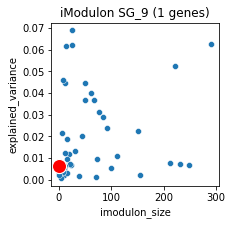

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS11915     0.593938         NaN      2664641    2665580       1   

                               product COG  \
EQU24_RS11915  IS66 family transposase   L   

                                            cog_name uniprot  tu_id  \
EQU24_RS11915  Replication, recombination and repair     NaN   1329   

                     tu_name ncbi_protein gene_name_extra specific_gos_n  \
EQU24_RS11915  EQU24_RS11915          NaN              ||            NaN   

              specific_gos  
EQU24_RS11915           []

In [139]:
imod_info('SG_9')

In [140]:
ica_data.imodulon_table.loc['SG_9','function'] = 'transposase_EW'

## iMod 51

iModulon 51


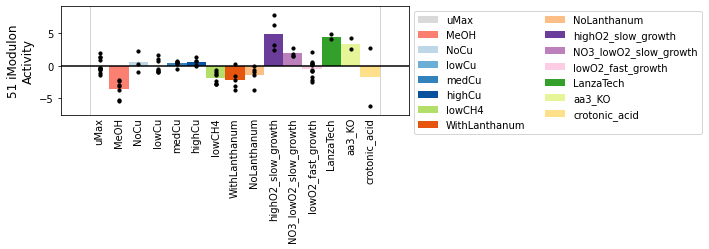

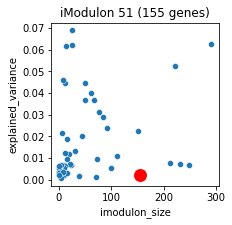

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
51        51     NaN  0.000024  0.008301   0.032258  0.454545  0.060241  5.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
51             11.0          155.0  KEGG modules     M00323          NaN   

   module_name  
51         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00145     0.039882         NaN        34142      34445      -1   
EQU24_RS00155     0.040967         NaN        36035      36347      -1   
EQU24_RS00175     0.086448         NaN        39992      40271      -1   
EQU24_RS00240    -0.037402         NaN        49350      49572       1   
EQU24_RS00295     0.036869         NaN        62264      62591      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21810    -0.042377         NaN      4919808    4920090       1   
EQU24_RS21890     0.040682         NaN      4939707    4939902      -1   
EQU24_RS21900     0.040796         NaN      4941039    4941474      -1   
EQU24_RS21905     0.037863         NaN      4941641    4942169      -1   
EQU24_RS21910     0.053725         NaN      4942188    4943358      -1   

                                                    product COG  \
EQU24_RS00145                          hypothetical protein   J   
EQU24_RS00155                          hypothetical protein   X   
EQU24_RS00175                          hypothetical protein   L   
EQU24_RS00240                          hypothetical protein   X   
EQU24_RS00295                          hypothetical protein   X   
...                                                     ...  ..   
EQU24_RS21810          XRE family transcriptional regulator   K   
EQU24_RS21890                          hypothetical protein   X   
EQU24_RS21900                   biopolymer transporter ExbD   U   
EQU24_RS21905  MotA/TolQ/ExbB proton channel family protein   U   
EQU24_RS21910  MotA/TolQ/ExbB proton channel family protein   U   

                                                        cog_name     uniprot  \
EQU24_RS00145    Translation, ribosomal structure and biogenesis  A0A4P9UL47   
EQU24_RS00155                                  No COG annotation  A0A4P9UKJ0   
EQU24_RS00175              Replication, recombination and repair  A0A4P9UIR2   
EQU24_RS00240                                  No COG annotation         NaN   
EQU24_RS00295                                  No COG annotation         NaN   
...                                                          ...         ...   
EQU24_RS21810                                      Transcription  A0A4P9USY3   
EQU24_RS21890                                  No COG annotation  A0A4P9USR3   
EQU24_RS21900  Intracellular trafficking, secretion, and vesi...  A0A4P9UST2   
EQU24_RS21905  Intracellular trafficking, secretion, and vesi...  A0A4V1IKE2   
EQU24_RS21910  Intracellular trafficking, secretion, and vesi...         NaN   

               tu_id                                          tu_name  \
EQU24_RS00145   2812  EQU24_RS00155 // EQU24_RS00150 // EQU24_RS00145   
EQU24_RS00155   2812  EQU24_RS00155 // EQU24_RS00150 // EQU24_RS00145   
EQU24_RS00175   2808                                    EQU24_RS00175   
EQU24_RS00240   2798                                    EQU24_RS00240   
EQU24_RS00295   2788                                    EQU24_RS00295   
...              ...                                              ...   
EQU24_RS21810     44                   EQU24_RS21810 // EQU24_RS21805   
EQU24_RS21890     35                                    EQU24_RS21890   
EQU24_RS21900     34                   EQU24_RS21900 // EQU24_RS21895   
EQU24_RS21905     33  EQU24_RS21915 // EQU24_RS21910 // EQU24_RS21905   
EQU24_RS21910     33  EQU24_RS21915 // EQU24_RS21910 // EQU24_RS21905   

                 ncbi_protein gene_name_extra  \
EQU24_RS00145  WP_014146553.1          ||None   
EQU24_RS00155  WP_017841446.1          ||None   
EQU24_RS00175  WP_017841442.1          ||None   
EQU24_RS00240             NaN              ||   
EQU24_RS00295             NaN              ||   
...                       ...             ...   
EQU24_RS21810  WP_017841540.1          ||None   
EQU24_RS21890  WP_017841524.1          ||None   
EQU24_RS21900  WP_040575763.1          ||N

In [141]:
imod_info(51)

In [142]:
ica_data.imodulon_table.loc[51,'function'] = 'some-transposase/some-membrane/up-in-highO2_slow_growth_EW'

## iMod 52

iModulon 52


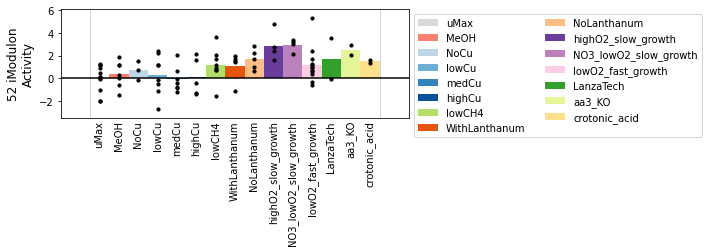

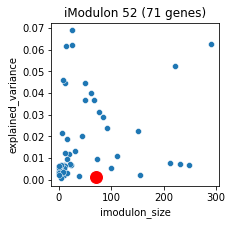

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00075    -0.046125        tatB        19487      19799       1   
EQU24_RS00250    -0.083779         NaN        50778      51069       1   
EQU24_RS01030    -0.045907         NaN       214040     214394      -1   
EQU24_RS01055     0.059053         NaN       217427     217802       1   
EQU24_RS01155    -0.064257         NaN       234648     234873       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20595    -0.057779         NaN      4643142    4644009       1   
EQU24_RS20610     0.197353         NaN      4646544    4647282      -1   
EQU24_RS20765     0.052683         NaN      4677500    4678028      -1   
EQU24_RS20900     0.053318         NaN      4708570    4708813      -1   
EQU24_RS21145    -0.068502         NaN      4763063    4763612       1   

                                                 product COG  \
EQU24_RS00075     twin-arginine translocase subunit TatB   U   
EQU24_RS00250                       hypothetical protein   X   
EQU24_RS01030                       hypothetical protein   X   
EQU24_RS01055                     Tn3 family transposase   L   
EQU24_RS01155                       hypothetical protein   X   
...                                                  ...  ..   
EQU24_RS20595                       hypothetical protein   G   
EQU24_RS20610                   ISAs1 family transposase   L   
EQU24_RS20765            phosphatase PAP2 family protein   I   
EQU24_RS20900                       hypothetical protein   X   
EQU24_RS21145  nuclear transport factor 2 family protein   S   

                                                        cog_name  \
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00250                                  No COG annotation   
EQU24_RS01030                                  No COG annotation   
EQU24_RS01055              Replication, recombination and repair   
EQU24_RS01155                                  No COG annotation   
...                                                          ...   
EQU24_RS20595              Carbohydrate transport and metabolism   
EQU24_RS20610              Replication, recombination and repair   
EQU24_RS20765                     Lipid transport and metabolism   
EQU24_RS20900                                  No COG annotation   
EQU24_RS21145                                   Function unknown   

                     uniprot  tu_id                         tu_name  \
EQU24_RS00075     A0A4P9UII1   2822                    tatB // tatA   
EQU24_RS00250     A0A4P9UIB5   2796                   EQU24_RS00250   
EQU24_RS01030     A0A4P9UNE4   2687                   EQU24_RS01030   
EQU24_RS01055  UPI0003469BE6   2683  EQU24_RS01055 // EQU24_RS01050   
EQU24_RS01155  UPI0009FE04B7   2670                   EQU24_RS01155   
...                      ...    ...                             ...   
EQU24_RS20595  UPI00110CC19A    215                   EQU24_RS20595   
EQU24_RS20610            NaN    212  EQU24_RS20615 // EQU24_RS20610   
EQU24_RS20765     A0A4P9US91    191  EQU24_RS20765 // EQU24_RS20760   
EQU24_RS20900     A0A4P9USB7    167  EQU24_RS20900 // EQU24_RS20895   
EQU24_RS21145     A0A4P9USF4    138                   EQU24_RS21145   

                 ncbi_protein gene_name_extra  \
EQU24_RS00075  WP_017841462.1      tatB||tatB   
EQU24_RS00250  WP_017841431.1          ||None   
EQU24_RS01030  WP_017841293.1          ||None   
EQU24_RS01055  WP_017841280.1          ||None   
EQU24_RS01155  WP_083877732.1          ||None   
...                       ...             ...   
EQU24_RS20595  WP_138767249.1          ||None   
EQU24_RS20610             NaN              ||   
EQU24_RS20765  WP_017841722.1          ||None   
EQU24_RS20900  WP_017841694.1          ||None   
EQU24_RS21145  WP_017841649.1          ||None   

                                                  specific_gos_n  \
EQU24_RS00075  peptide transpo

In [143]:
imod_info(52)

In [144]:
ica_data.imodulon_table.loc[52,'function'] = 'some-transposase/some-membrane/some-iron-sulfur/up-in-slow_growth_EW'

## Manually curate functions

In [147]:
ica_data.imodulon_table.function.value_counts()

transposase_EW                                                          6
hypothetical-prot_EW                                                    3
unclear_EW                                                              2
translation/ribosomal/biosynthesis_EW                                   2
large-unclear_EW                                                        2
TonB-receptor/up-in-both-La-vials_EW                                    1
small-unclear_EW                                                        1
ion-transport/outlier-repsonse-FM11_EW                                  1
sulfate-transport/messy-threshold_EW                                    1
unclear/outlier-response-wLa-vial_EW                                    1
transposase/toxin-anti-toxin_EW                                         1
nif/electron-transport_EW                                               1
SG-hypothetical_EW                                                      1
some-membrane/outlier-response-highCu_

# Save final ICA data object

In [148]:
data_dir

'../data/5g_processed_data'

In [154]:
save_to_json(ica_data, path.join(data_dir, '5g_curated.json.gz'))

In [155]:
ica_data.imodulon_table.to_csv(path.join(data_dir, '5g_imodulon_table.csv'))

In [153]:
ica_data.imodulon_table

single_gene  imodulon_size  explained_variance         category  \
0                           111            0.010961  uncharacterized   
1                            23            0.006986  uncharacterized   
2                            44            0.020010       functional   
SG_1        True              1            0.003638      single_gene   
4                             3            0.004384  uncharacterized   
5                            62            0.040222  uncharacterized   
6                            20            0.011649  uncharacterized   
7                             5            0.004450  uncharacterized   
8                             6            0.021518       functional   
9                            16            0.009330       functional   
10                           85            0.028817  uncharacterized   
11                           21            0.007132  uncharacterized   
SG_2        True              1            0.006521      single_gene   
13                           10            0.004934  uncharacterized   
14                           50            0.044466       functional   
15                           99            0.005426  uncharacterized   
16                           77            0.031248  uncharacterized   
17                           68            0.036859  uncharacterized   
18                           74            0.009664  uncharacterized   
19                          151            0.022518  uncharacterized   
20                           11            0.006886  uncharacterized   
21                           15            0.061652       functional   
22                           12            0.044637  uncharacterized   
23                          248            0.006660  uncharacterized   
24                           12            0.012456  uncharacterized   
25                           10            0.002377  uncharacterized   
26                            5            0.000565  uncharacterized   
27                            9            0.046064       functional   
28                           12            0.006138  uncharacterized   
29                          213            0.007783  uncharacterized   
30                           31            0.013435  uncharacterized   
31                           25            0.061955  uncharacterized   
32                           50            0.036584       functional   
33                          232            0.007360  uncharacterized   
SG_3        True              1            0.003764      single_gene   
35                           10            0.005344       functional   
36                           26            0.069003       functional   
SG_4        True              1            0.004080      single_gene   
SG_5        True              2            0.005794      single_gene   
39                          221            0.052555       functional   
SG_6        True              1            0.005358      single_gene   
41                          291            0.062863  uncharacterized   
42                           17            0.002914  uncharacterized   
43                           92            0.023813  uncharacterized   
SG_7        True              1            0.003211      single_gene   
45                           17            0.018736  uncharacterized   
46                            9            0.003774  uncharacterized   
SG_8        True              1            0.002187      single_gene   
48                            5            0.006577  uncharacterized   
49                           39            0.001538  uncharacterized   
SG_9        True              1            0.006470      single_gene   
51                          155            0.002219  uncharacterized   
52                           71            0.001277  uncharacterized   

                                               function  
0                                            unclear_EW  
